# Download The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/955311357.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("recruitmentdataset-2022-1.3.csv")
data.head(5)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True


# Quick Look at the Data Structure

In [3]:
data.shape

(4000, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     4000 non-null   object
 1   gender                 4000 non-null   object
 2   age                    4000 non-null   int64 
 3   nationality            4000 non-null   object
 4   sport                  4000 non-null   object
 5   ind-university_grade   4000 non-null   int64 
 6   ind-debateclub         4000 non-null   bool  
 7   ind-programming_exp    4000 non-null   bool  
 8   ind-international_exp  4000 non-null   bool  
 9   ind-entrepeneur_exp    4000 non-null   bool  
 10  ind-languages          4000 non-null   int64 
 11  ind-exact_study        4000 non-null   bool  
 12  ind-degree             4000 non-null   object
 13  company                4000 non-null   object
 14  decision               4000 non-null   bool  
dtypes: bool(6), int64(3),

In [5]:
data.describe()

,age,ind-university_grade,ind-languages
count,4000.000000,4000.000000,4000.000000
mean,26.179000,62.380000,1.336250
std,2.807477,5.916194,0.854031
min,21.000000,45.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,67.000000,2.000000
max,32.000000,78.000000,3.000000


In [6]:
data.describe(include = 'object')

,Id,gender,nationality,sport,ind-degree,company
count,4000,4000,4000,4000,4000,4000
unique,4000,3,3,8,3,4
top,x8011e,male,Dutch,Football,bachelor,A
freq,1,2127,3167,889,1984,1000


In [7]:
data.isnull().sum()

Id                       0
gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64

In [8]:
data.dtypes

Id                       object
gender                   object
age                       int64
nationality              object
sport                    object
ind-university_grade      int64
ind-debateclub             bool
ind-programming_exp        bool
ind-international_exp      bool
ind-entrepeneur_exp        bool
ind-languages             int64
ind-exact_study            bool
ind-degree               object
company                  object
decision                   bool
dtype: object

In [9]:
data.nunique()

Id                       4000
gender                      3
age                        12
nationality                 3
sport                       8
ind-university_grade       33
ind-debateclub              2
ind-programming_exp         2
ind-international_exp       2
ind-entrepeneur_exp         2
ind-languages               4
ind-exact_study             2
ind-degree                  3
company                     4
decision                    2
dtype: int64

In [10]:
data.decision.value_counts()/len(data)*100

decision
False    68.325
True     31.675
Name: count, dtype: float64

Noteable points about dataset :

There are 4000 observations and 15 features.
Dataset contains three types of data: object , bool and integer.
There is no missing data
Here, decision is the dependent or target variable and others are independent variable.
The dataset is imbalanced, with approximately 68% of cases representing individuals not being hired, while 32% of cases represent individuals being hired.

In [11]:
data['decision'] = data['decision'].astype(int)

In [12]:
data=data.drop(['Id'],axis=1)

In [13]:
data.head(5)

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,1
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,0
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,0
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,1
4,female,26,German,Golf,59,False,False,False,False,1,False,master,A,1


# EDA and VISUALIZATION

In [14]:
df_A = data[data['company'] == 'A'].copy()

In [15]:
df_B = data[data['company'] == 'B'].copy()

In [16]:
df_C = data[data['company'] == 'C'].copy()

In [17]:
df_D = data[data['company'] == 'D'].copy()

In [18]:
df1 = data.copy()


In [19]:
hire_counts = data['decision'].value_counts()
labels = ['Hired', 'Not Hired']
sizes = hire_counts.values

In [20]:
pal_2 = sns.color_palette("Paired")

## COMPANY A

### NUMERIC

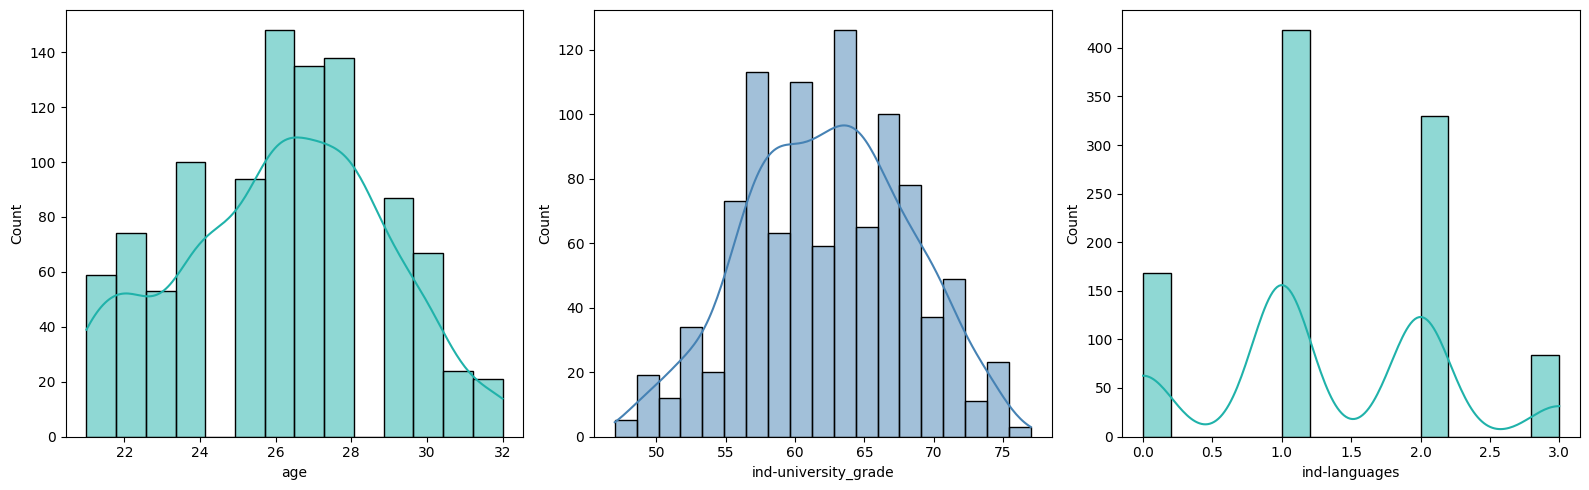

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.histplot(x=df_A['age'], kde=True, color='lightseagreen', ax=axes[0])
sns.histplot(x=df_A['ind-university_grade'], kde=True, color='steelblue', ax=axes[1])
sns.histplot(x=df_A['ind-languages'], kde=True, color='lightseagreen', ax=axes[2])

plt.tight_layout()
plt.show()


### CATEGORIC

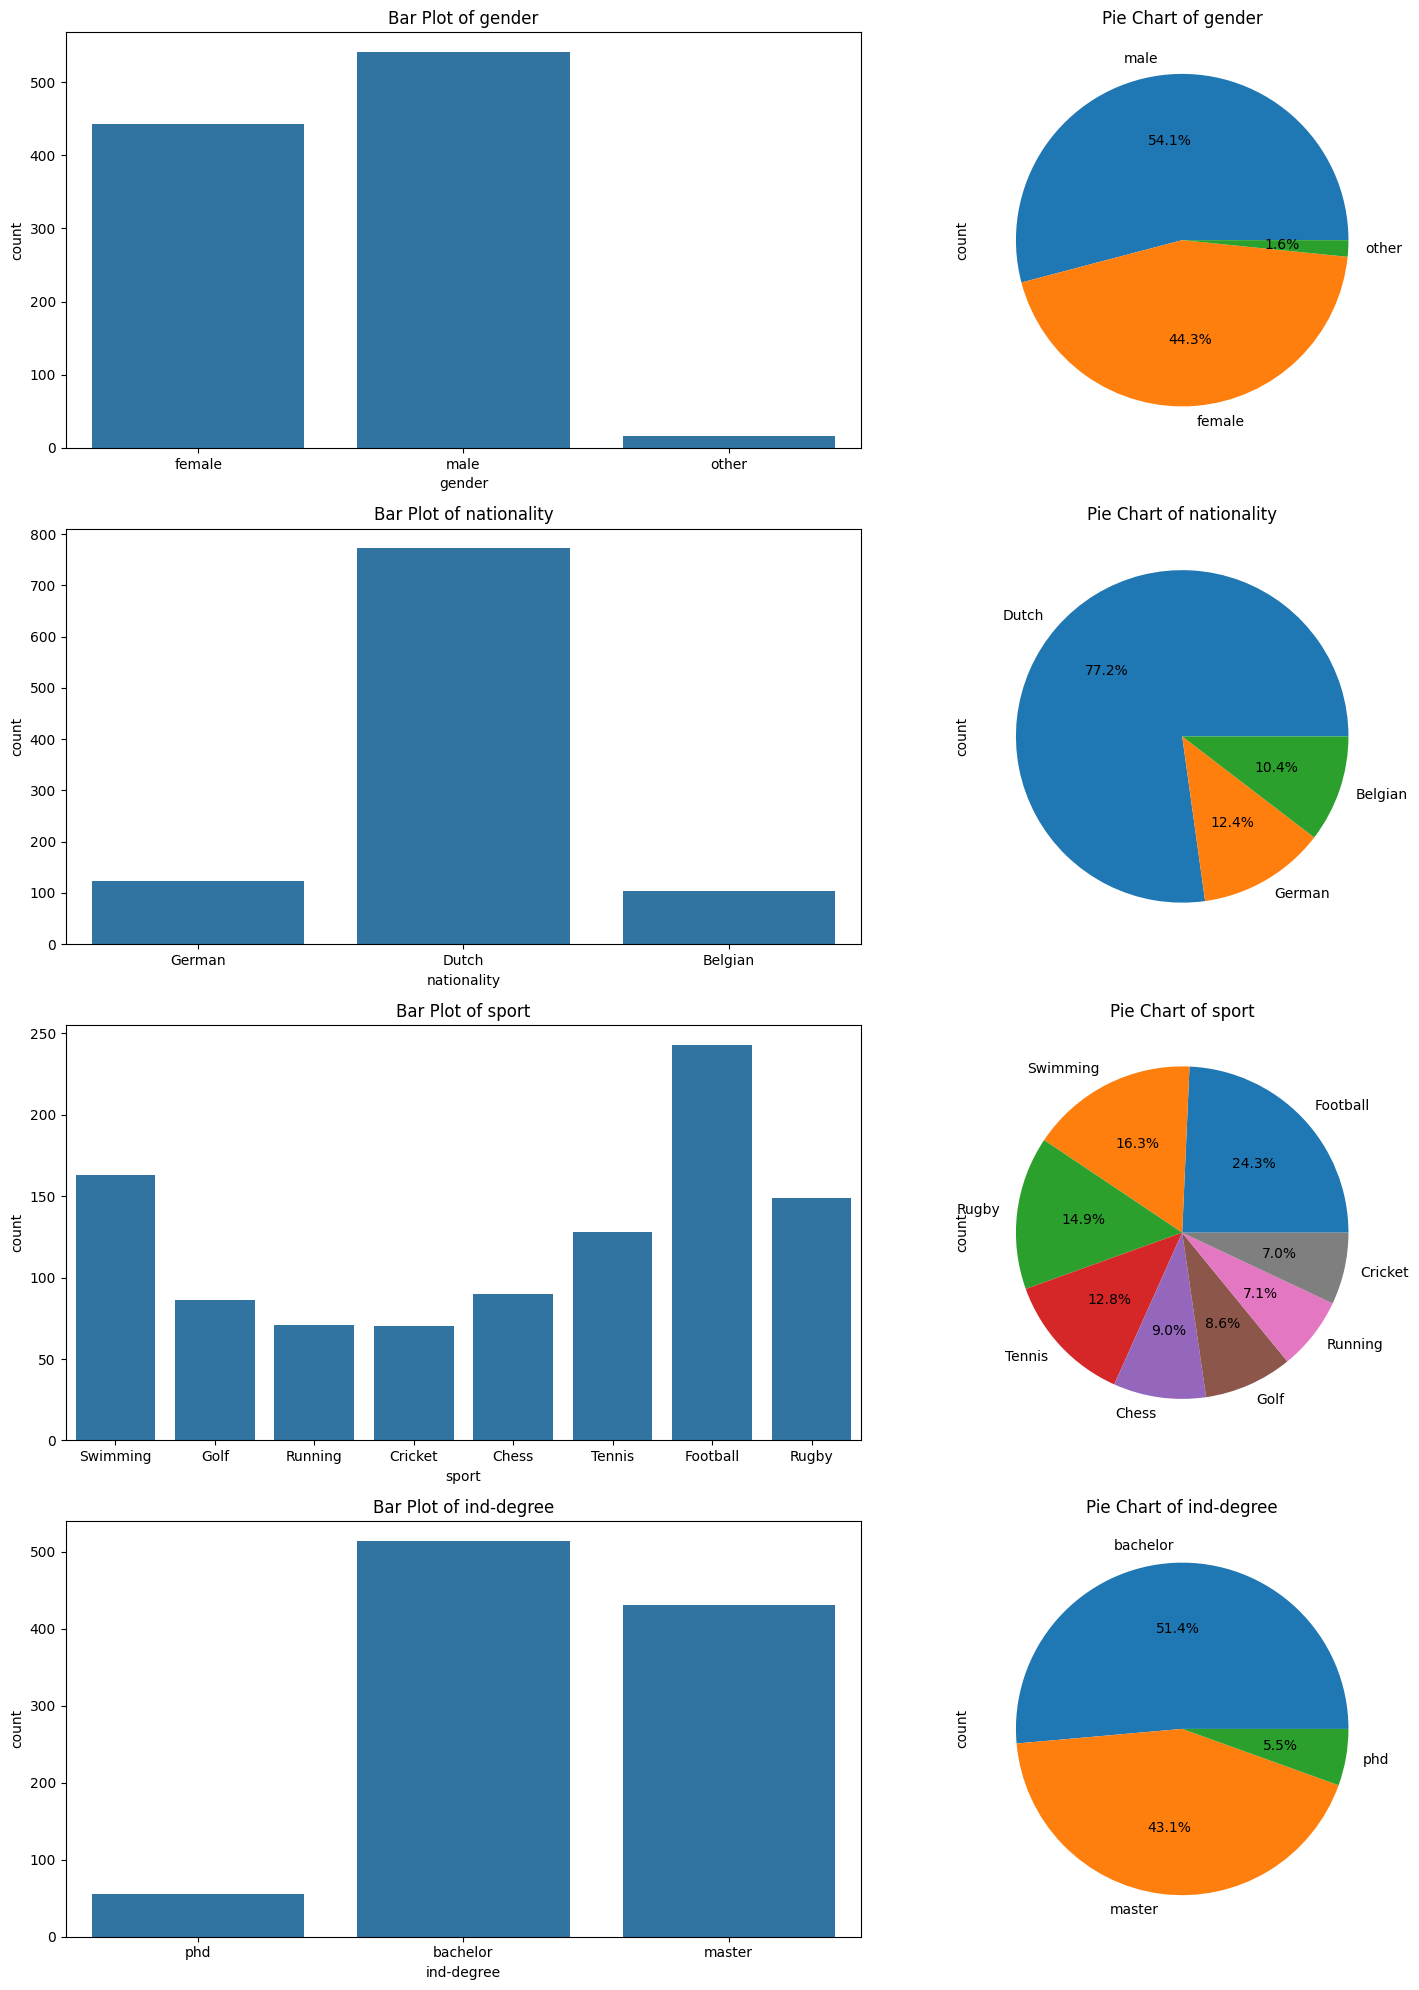

In [22]:
columns = ['gender', 'nationality', 'sport', 'ind-degree']

fig, axes = plt.subplots(len(columns), 2, figsize=(16, 5*len(columns)))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_A, ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar Plot of {col}')
    
    df_A[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 1])
    axes[i, 1].set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)


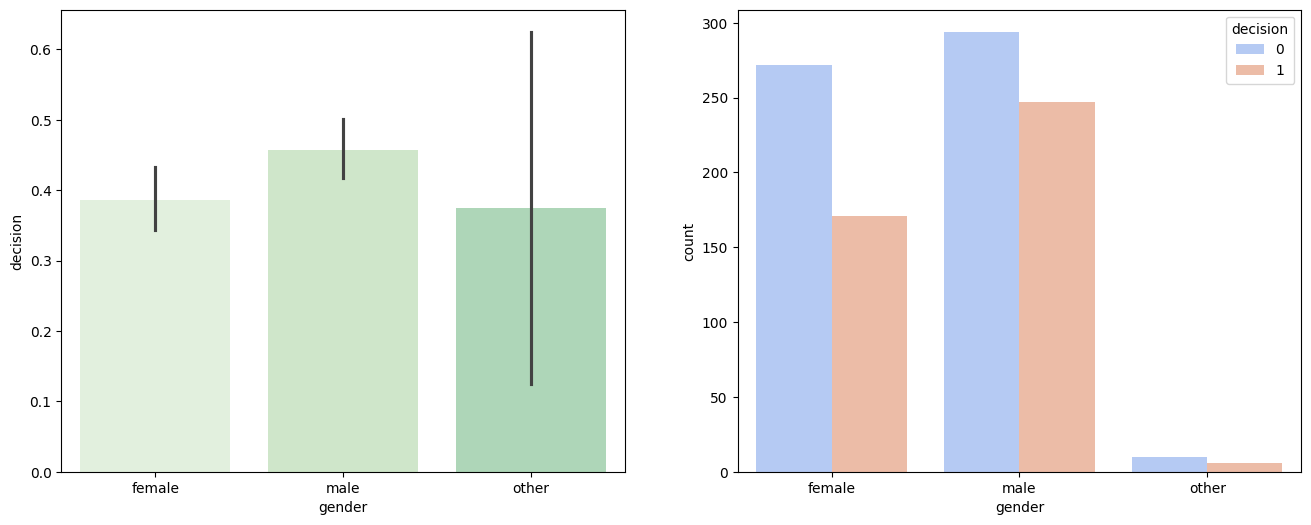

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)


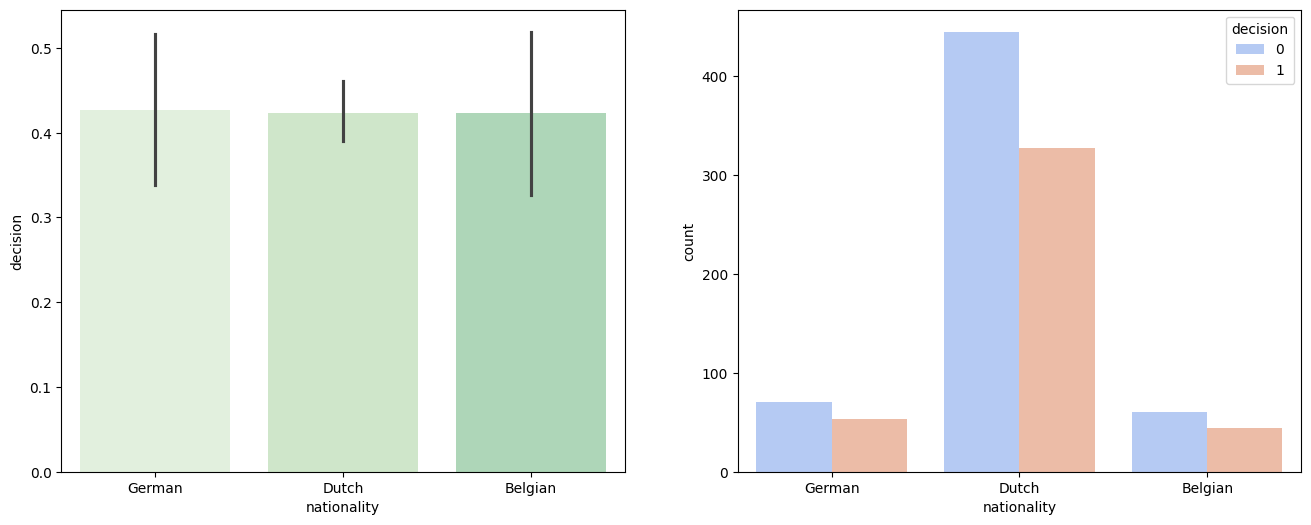

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)


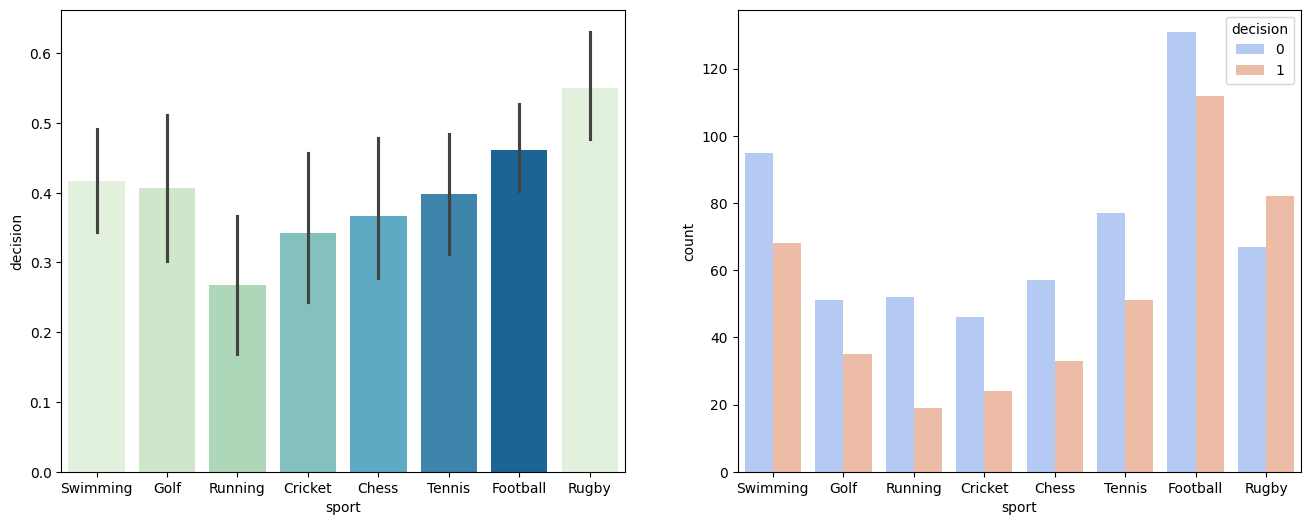

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/651398222.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)


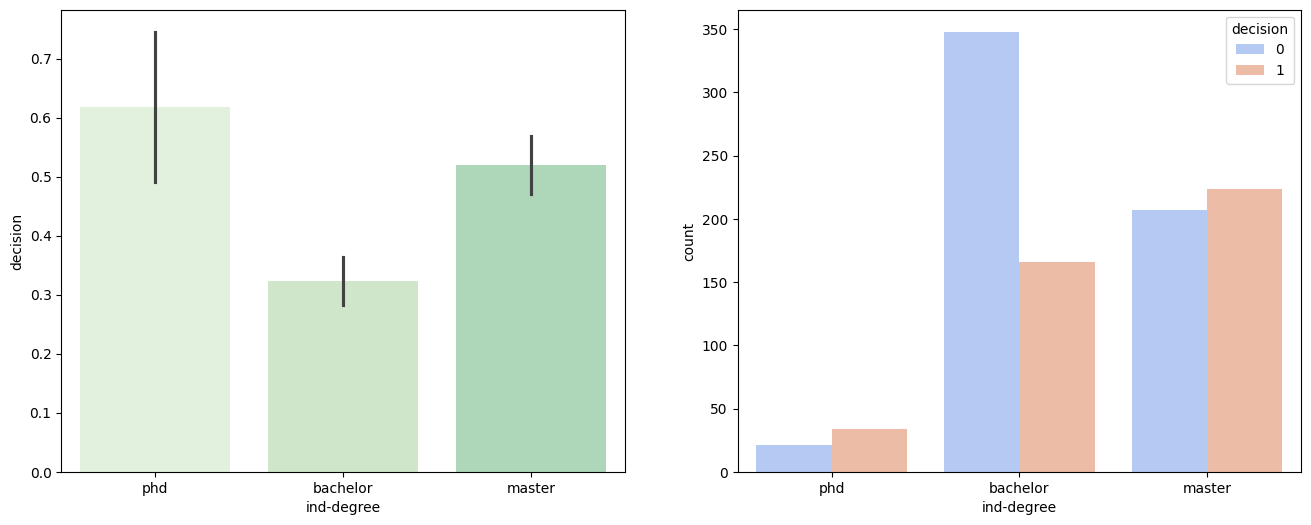

In [23]:
pal_7 = sns.color_palette("GnBu", n_colors=7)

categorical_features = ['gender', 'nationality', 'sport', 'ind-degree']

for col in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x=col, y='decision', data=df_A, ax=axes[0], palette=pal_7)
    st = "No of Hiring in " + col
    sns.countplot(x=col, data=df_A, ax=axes[1], hue='decision', palette='coolwarm')
    plt.show()

In [24]:
def calculate_decision_ratio(df_A, group_column):
    decision_ratios = df_A.groupby(group_column)['decision'].mean()
    return decision_ratios

gender_decision_ratios = calculate_decision_ratio(df_A, 'gender')
print("Decision ratios by gender:\n", gender_decision_ratios)

nationality_decision_ratios = calculate_decision_ratio(df_A, 'nationality')
print("\nDecision ratios by nationality:\n", nationality_decision_ratios)

sport_decision_ratios = calculate_decision_ratio(df_A, 'sport')
print("\nDecision ratios by sport:\n", sport_decision_ratios)

degree_decision_ratios = calculate_decision_ratio(df_A, 'ind-degree')
print("\nDecision ratios by degree:\n", degree_decision_ratios)


Decision ratios by gender:
 gender
female    0.386005
male      0.456562
other     0.375000
Name: decision, dtype: float64

Decision ratios by nationality:
 nationality
Belgian    0.423077
Dutch      0.423575
German     0.427419
Name: decision, dtype: float64

Decision ratios by sport:
 sport
Chess       0.366667
Cricket     0.342857
Football    0.460905
Golf        0.406977
Rugby       0.550336
Running     0.267606
Swimming    0.417178
Tennis      0.398438
Name: decision, dtype: float64

Decision ratios by degree:
 ind-degree
bachelor    0.322957
master      0.519722
phd         0.618182
Name: decision, dtype: float64


Based on the given data:

- **Gender:** The decision ratios for males (45.66%) are higher compared to females (38.60%) and individuals with other genders (37.50%). This suggests that males are more likely to be hired than females or individuals with other gender identities.

- **Nationality:** The decision ratios for Belgian (42.31%), Dutch (42.36%), and German (42.74%) nationals are quite similar. This indicates that nationality does not seem to play a significant role in the hiring decision.

- **Sport:** Rugby players (55.03%) have the highest decision ratio among all sports, followed by football players (46.09%). This suggests that participation in certain sports, particularly rugby, may positively influence the likelihood of being hired.

- **Degree:** The decision ratios increase with the level of education, with individuals holding a Ph.D. (61.82%) having the highest ratio, followed by those with a master's degree (51.97%) and bachelor's degree (32.30%). This indicates that higher levels of education correlate with higher chances of being hired.

Overall, the data reveals that gender, type of sport, and educational level have discernible effects on hiring decisions, while nationality seems to have less impact. Higher education levels and participation in certain sports, such as rugby, appear to be associated with higher rates of employment.

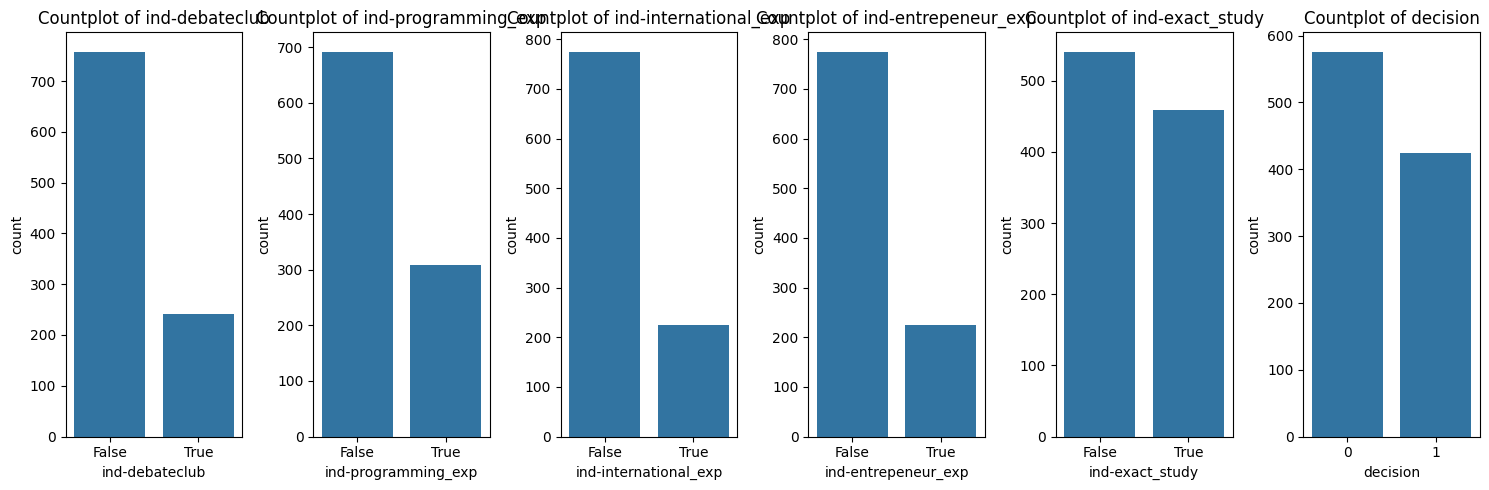

In [25]:
columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study', 'decision']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_A, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

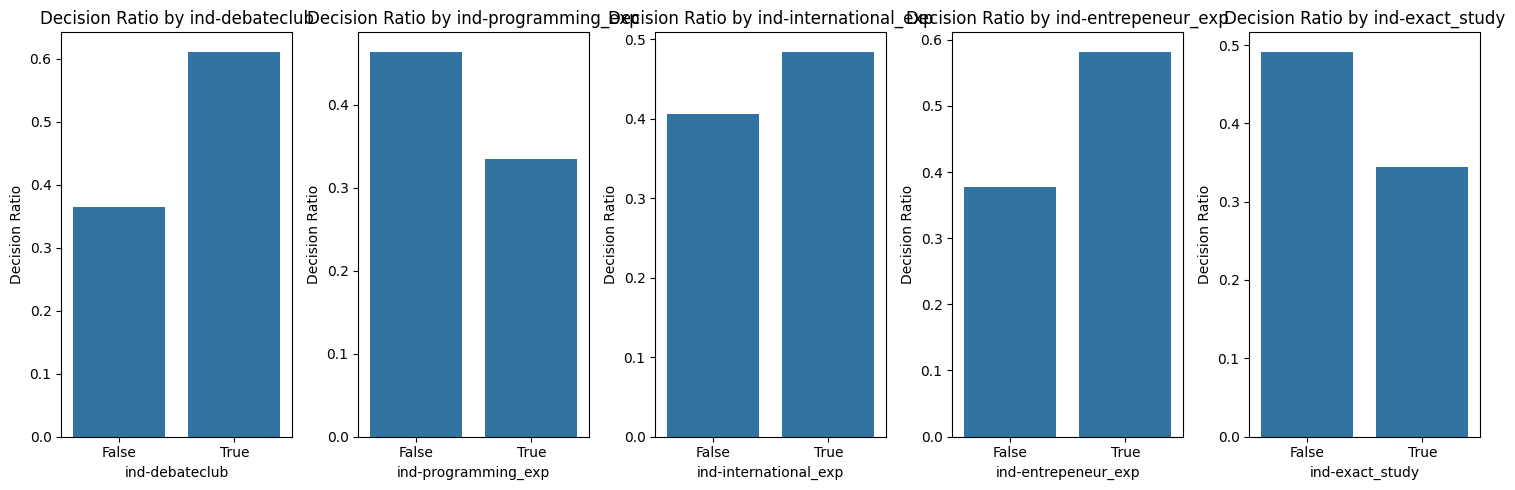

In [26]:
def calculate_decision_ratio(df_A, group_column):
    decision_ratios = df_A.groupby(group_column)['decision'].mean()
    return decision_ratios

columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    decision_ratios = calculate_decision_ratio(df_A, col)
    
    sns.barplot(x=decision_ratios.index, y=decision_ratios.values, ax=axes[i])
    axes[i].set_title(f'Decision Ratio by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Decision Ratio')

plt.tight_layout()
plt.show()


In [27]:
def calculate_decision_ratio(df_A, group_column):
    decision_ratios = df_A.groupby(group_column)['decision'].mean()
    return decision_ratios

ind_debateclub_decision_ratio = calculate_decision_ratio(df_A, 'ind-debateclub')
print("Decision ratio by ind-debateclub:")
print(ind_debateclub_decision_ratio)

ind_programming_exp_decision_ratio = calculate_decision_ratio(df_A, 'ind-programming_exp')
print("\nDecision ratio by ind-programming_exp:")
print(ind_programming_exp_decision_ratio)

ind_international_exp_decision_ratio = calculate_decision_ratio(df_A, 'ind-international_exp')
print("\nDecision ratio by ind-international_exp:")
print(ind_international_exp_decision_ratio)

ind_entrepeneur_exp_decision_ratio = calculate_decision_ratio(df_A, 'ind-entrepeneur_exp')
print("\nDecision ratio by ind-entrepeneur_exp:")
print(ind_entrepeneur_exp_decision_ratio)

ind_exact_study_decision_ratio = calculate_decision_ratio(df_A, 'ind-exact_study')
print("\nDecision ratio by ind-exact_study:")
print(ind_exact_study_decision_ratio)

Decision ratio by ind-debateclub:
ind-debateclub
False    0.364116
True     0.611570
Name: decision, dtype: float64

Decision ratio by ind-programming_exp:
ind-programming_exp
False    0.463873
True     0.334416
Name: decision, dtype: float64

Decision ratio by ind-international_exp:
ind-international_exp
False    0.406452
True     0.484444
Name: decision, dtype: float64

Decision ratio by ind-entrepeneur_exp:
ind-entrepeneur_exp
False    0.378065
True     0.582222
Name: decision, dtype: float64

Decision ratio by ind-exact_study:
ind-exact_study
False    0.491682
True     0.344227
Name: decision, dtype: float64


Based on the provided data:

- **Debate Club Participation:** Individuals who participate in the debate club (61.16%) have a notably higher decision ratio compared to those who do not (36.42%). This suggests that involvement in the debate club positively influences the likelihood of being hired.

- **Programming Experience:** Surprisingly, individuals without programming experience (46.39%) have a higher decision ratio compared to those with programming experience (33.44%). This indicates that programming experience may not be a significant factor in the hiring decision process.

- **International Experience:** Individuals with international experience (48.44%) have a slightly higher decision ratio compared to those without (40.65%). This suggests that international experience may have a modest positive impact on the likelihood of being hired.

- **Entrepreneurial Experience:** Individuals with entrepreneurial experience (58.22%) have a substantially higher decision ratio compared to those without (37.81%). This indicates that entrepreneurial experience is highly valued by employers and significantly increases the likelihood of being hired.

- **Exact Study Background:** Individuals without an exact study background (49.17%) have a higher decision ratio compared to those with an exact study background (34.42%). This suggests that having a background in a field unrelated to the job may be advantageous in the hiring process.

Overall, participation in extracurricular activities like debate clubs and possessing entrepreneurial experience appear to be strong factors positively influencing hiring decisions. On the other hand, programming experience does not seem to have a significant impact, and having a non-exact study background may even be advantageous in some cases.

### MULTIVARIABLE

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/1960578123.py:2: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(x="gender", y="age", data=df_A,hue='decision',palette=pal_2)


<Axes: xlabel='gender', ylabel='age'>

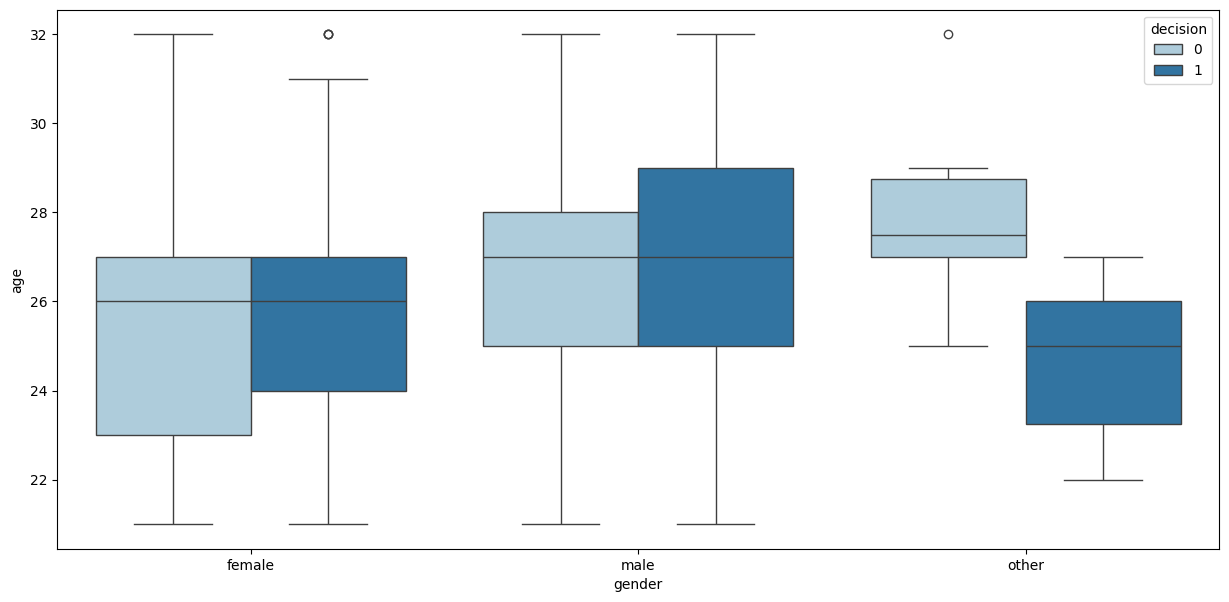

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x="gender", y="age", data=df_A,hue='decision',palette=pal_2)

In [29]:
df_A.groupby('gender')['decision'].mean().to_frame()

,decision
gender,
female,0.386005
male,0.456562
other,0.375000


In [30]:
df_A.groupby(['gender','decision'])['age'].mean().to_frame()

age
gender decision           
female 0         25.433824
       1         25.619883
male   0         26.452381
       1         26.882591
other  0         27.800000
       1         24.666667

In [31]:
df_A.groupby(['gender','decision'])['age'].median().to_frame()

age
gender decision      
female 0         26.0
       1         26.0
male   0         27.0
       1         27.0
other  0         27.5
       1         25.0

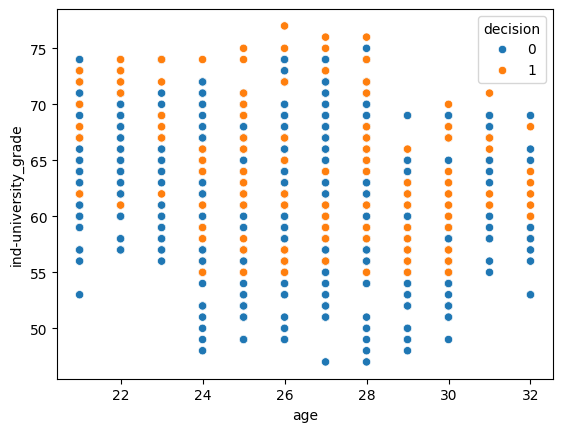

In [32]:
sns.scatterplot(x='age', y='ind-university_grade', data=df_A, hue='decision')
plt.show()


While the graduation score can be considered a decisive factor in the employment decision, having a score of 55 or higher does not notably increase or decrease the likelihood of employment. In this case, it appears that other factors, such as experience, skills, or personal qualities, may be more influential in the employment decision.

In [33]:
df_A.groupby(['age'])['decision'].mean().to_frame()

,decision
age,
21,0.305085
22,0.351351
23,0.301887
24,0.520000
25,0.414894
26,0.466216
27,0.385185
28,0.420290
29,0.482759


24-29-20-32

In [34]:
df_A.groupby(['decision'])['age'].mean().to_frame()

,age
decision,
0,25.994792
1,26.341981


## COMPANY B

### NUMERIC

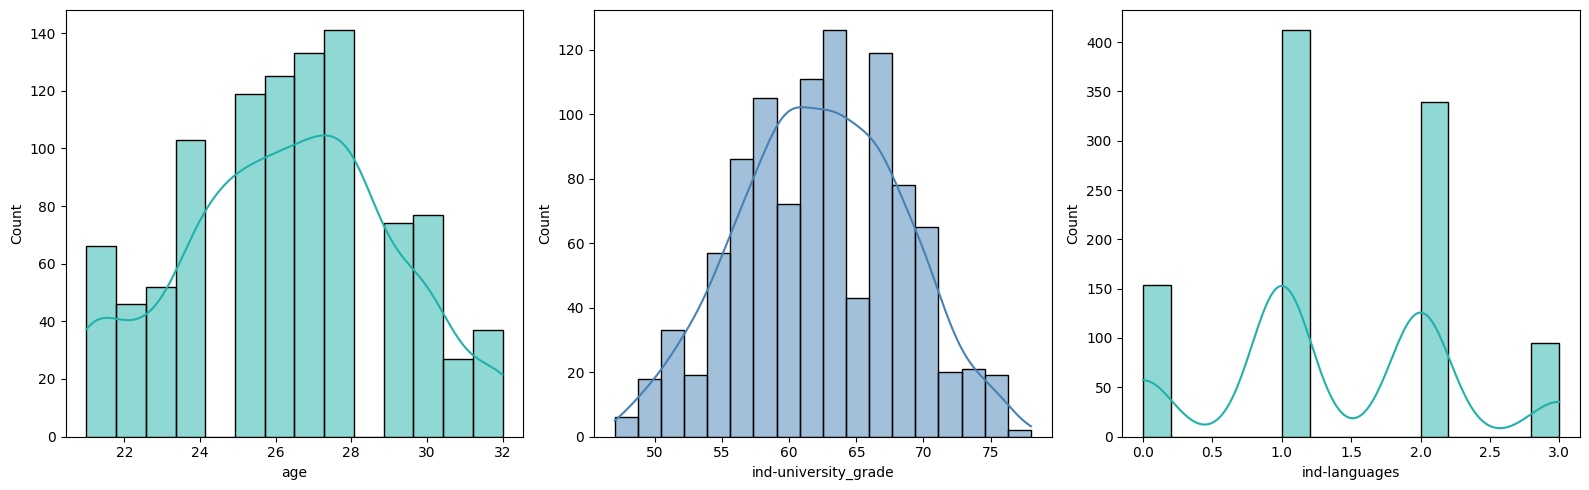

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.histplot(x=df_B['age'], kde=True, color='lightseagreen', ax=axes[0])
sns.histplot(x=df_B['ind-university_grade'], kde=True, color='steelblue', ax=axes[1])
sns.histplot(x=df_B['ind-languages'], kde=True, color='lightseagreen', ax=axes[2])

plt.tight_layout()
plt.show()

### CATEGORIC

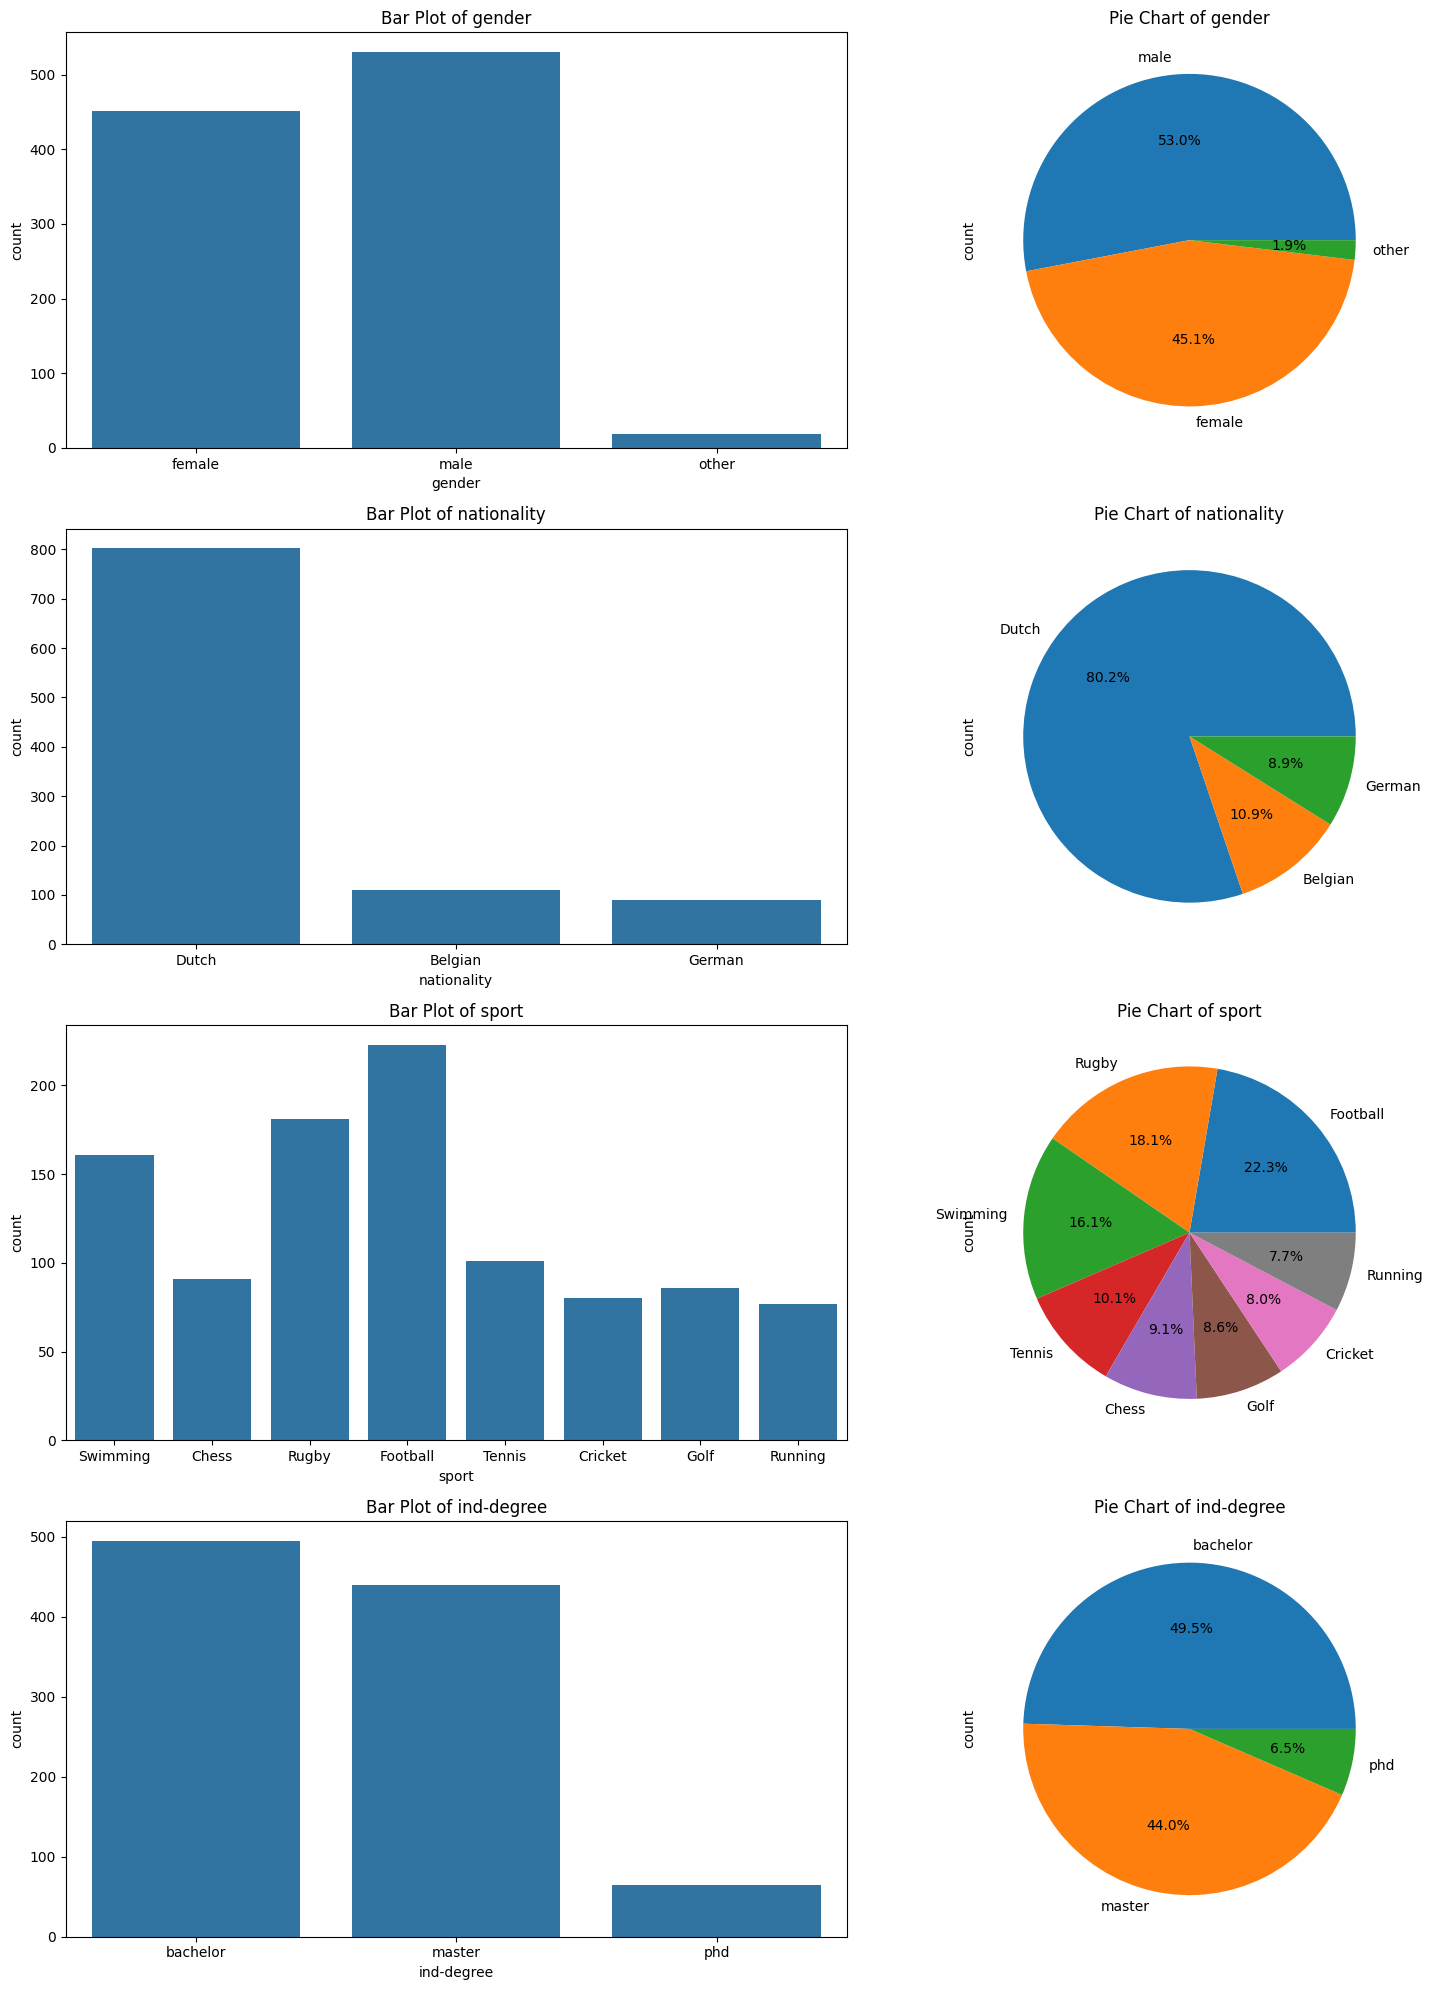

In [36]:
columns = ['gender', 'nationality', 'sport', 'ind-degree']

fig, axes = plt.subplots(len(columns), 2, figsize=(16, 5*len(columns)))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_B, ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar Plot of {col}')
    
    df_B[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 1])
    axes[i, 1].set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)


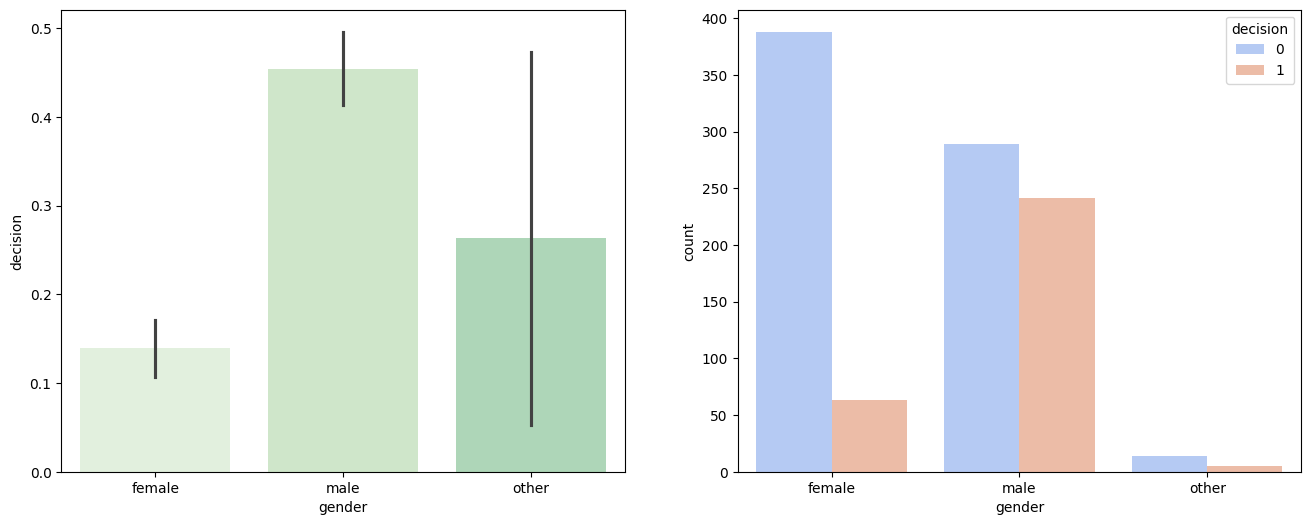

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)


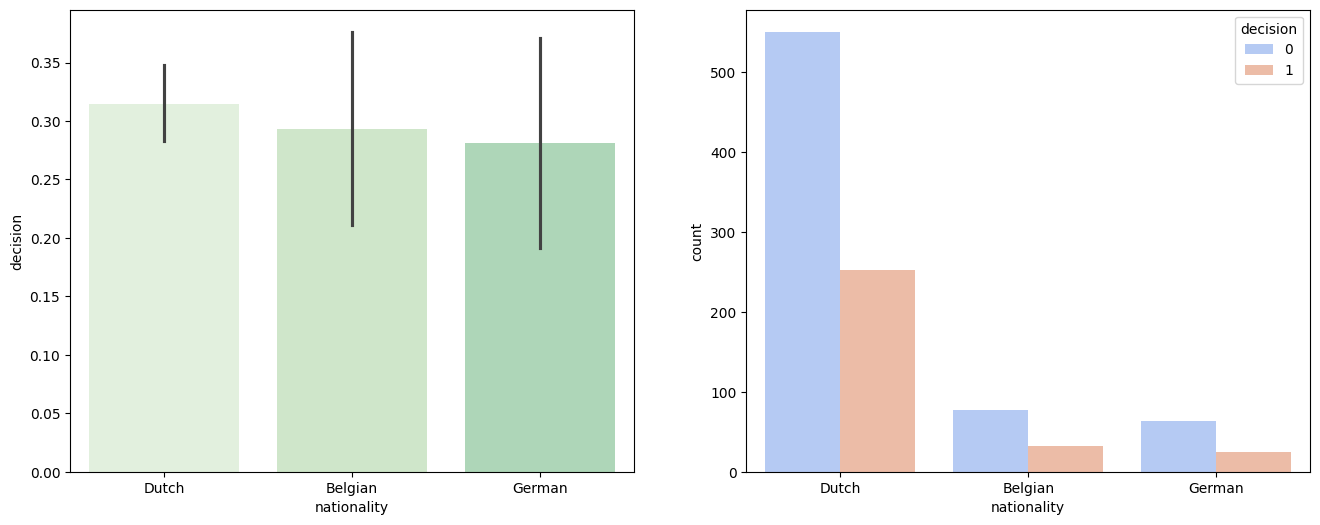

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)


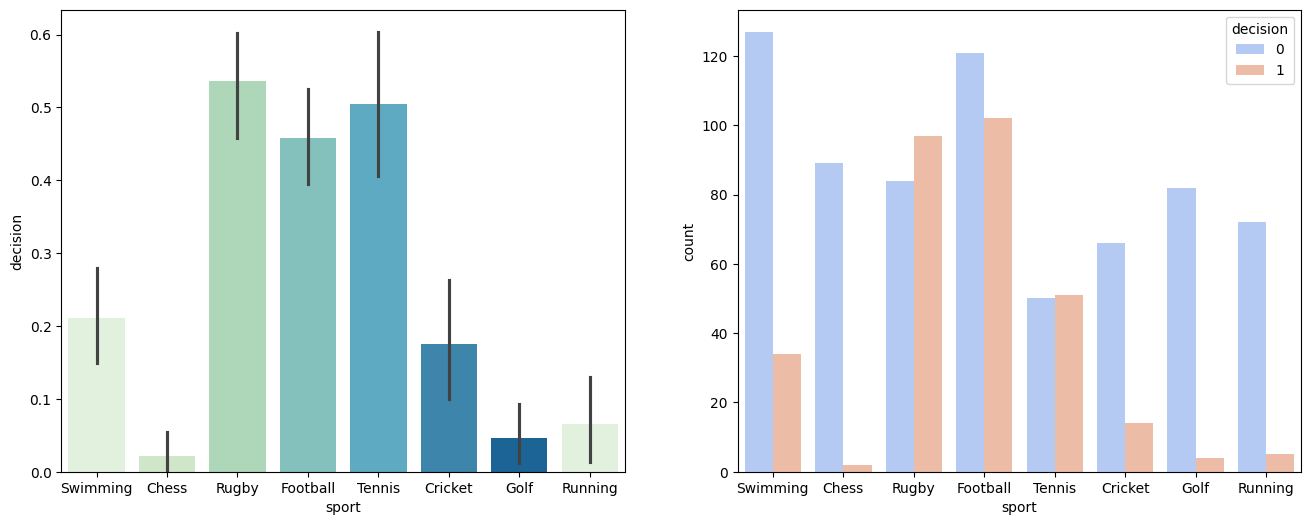

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/921996241.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)


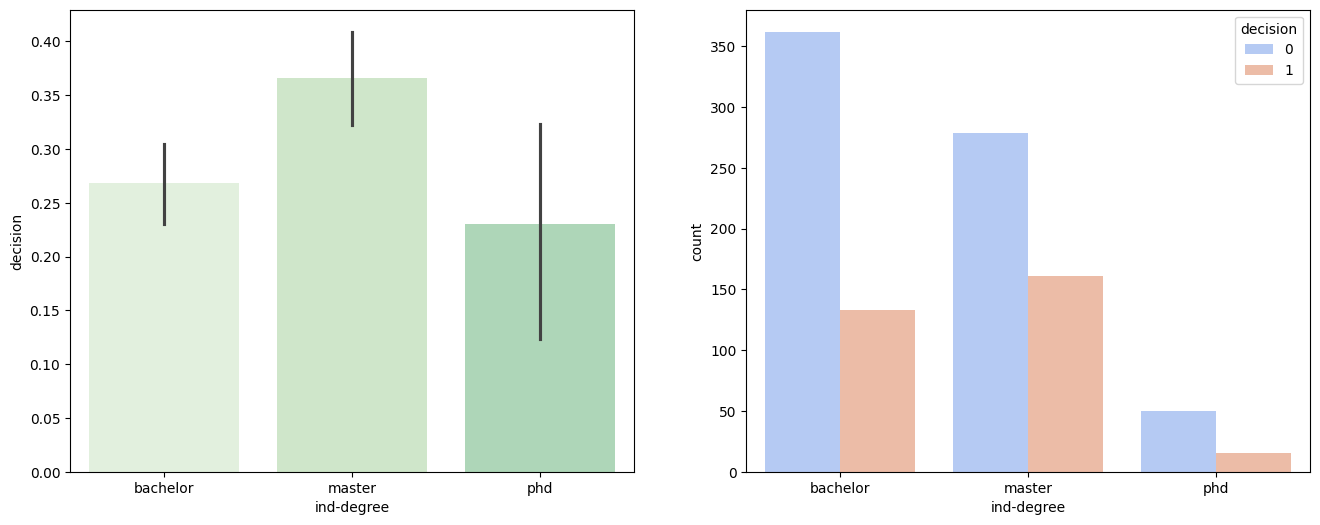

In [37]:
pal_7 = sns.color_palette("GnBu", n_colors=7)

categorical_features = ['gender', 'nationality', 'sport', 'ind-degree']

for col in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x=col, y='decision', data=df_B, ax=axes[0], palette=pal_7)
    st = "No of Hiring in " + col
    sns.countplot(x=col, data=df_B, ax=axes[1], hue='decision', palette='coolwarm')
    plt.show()

In [38]:
def calculate_decision_ratio(df_B, group_column):
    decision_ratios = df_B.groupby(group_column)['decision'].mean()
    return decision_ratios

gender_decision_ratios = calculate_decision_ratio(df_B, 'gender')
print("Decision ratios by gender:\n", gender_decision_ratios)

nationality_decision_ratios = calculate_decision_ratio(df_B, 'nationality')
print("\nDecision ratios by nationality:\n", nationality_decision_ratios)

sport_decision_ratios = calculate_decision_ratio(df_B, 'sport')
print("\nDecision ratios by sport:\n", sport_decision_ratios)

degree_decision_ratios = calculate_decision_ratio(df_B, 'ind-degree')
print("\nDecision ratios by degree:\n", degree_decision_ratios)


Decision ratios by gender:
 gender
female    0.139690
male      0.454717
other     0.263158
Name: decision, dtype: float64

Decision ratios by nationality:
 nationality
Belgian    0.293578
Dutch      0.314214
German     0.280899
Name: decision, dtype: float64

Decision ratios by sport:
 sport
Chess       0.021978
Cricket     0.175000
Football    0.457399
Golf        0.046512
Rugby       0.535912
Running     0.064935
Swimming    0.211180
Tennis      0.504950
Name: decision, dtype: float64

Decision ratios by degree:
 ind-degree
bachelor    0.268687
master      0.365909
phd         0.230769
Name: decision, dtype: float64


Based on the provided data:

- **Gender:** The decision ratios for males (45.47%) are substantially higher compared to females (13.97%) and individuals with other genders (26.32%). This suggests that males have a significantly higher likelihood of being hired compared to females and individuals with other gender identities.

- **Nationality:** The decision ratios for Dutch (31.42%) and Belgian (29.36%) nationals are slightly higher compared to German nationals (28.09%). However, the differences are relatively small, indicating that nationality may not be a major factor in the hiring decision.

- **Sport:** Rugby players (53.59%) and tennis players (50.50%) have notably higher decision ratios compared to individuals involved in other sports. Chess players (2.20%) have the lowest decision ratio among all sports. This suggests that participation in certain sports, particularly rugby and tennis, may positively influence the likelihood of being hired.

- **Degree:** The decision ratios increase from bachelor's (26.87%) to master's (36.59%) and then decrease for Ph.D. holders (23.08%). This indicates that individuals with a master's degree have the highest likelihood of being hired, followed by those with a bachelor's degree, while Ph.D. holders have a lower likelihood of being hired compared to the other two groups.

Overall, gender, sport, and degree level appear to be significant factors influencing hiring decisions. Males, individuals involved in rugby and tennis, and those with a master's degree have higher decision ratios, indicating a greater likelihood of being hired. However, nationality does not seem to have a substantial impact on the hiring decision based on the provided data.

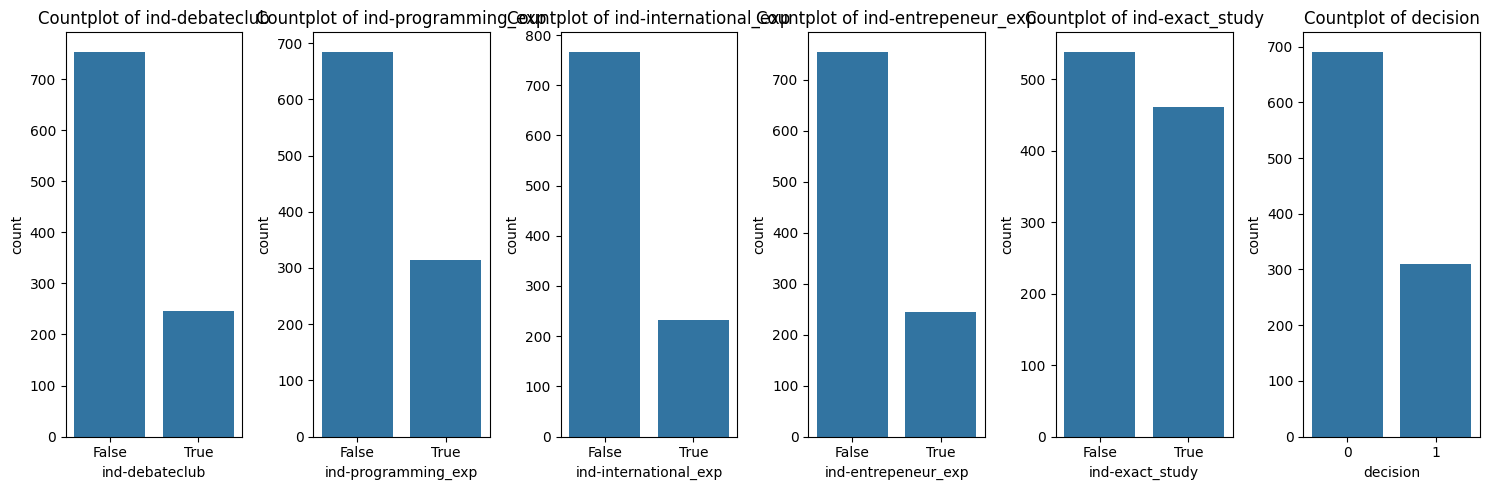

In [39]:
columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study', 'decision']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_B, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

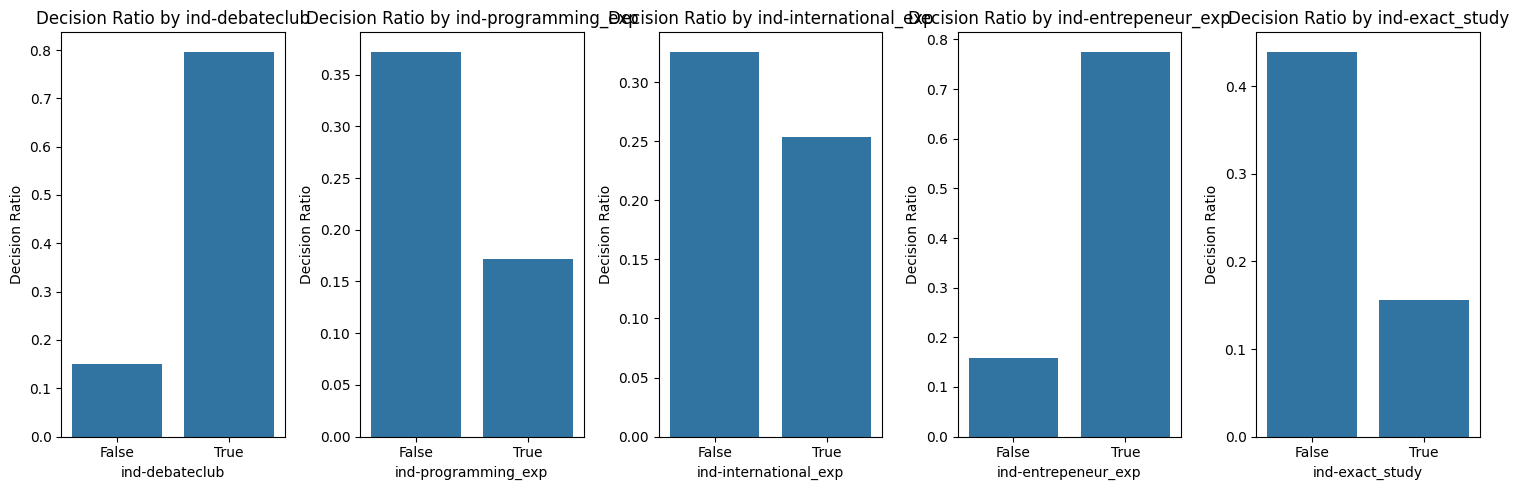

In [40]:
def calculate_decision_ratio(df_B, group_column):
    decision_ratios = df_B.groupby(group_column)['decision'].mean()
    return decision_ratios

columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    decision_ratios = calculate_decision_ratio(df_B, col)
    
    sns.barplot(x=decision_ratios.index, y=decision_ratios.values, ax=axes[i])
    axes[i].set_title(f'Decision Ratio by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Decision Ratio')

plt.tight_layout()
plt.show()


In [41]:
def calculate_decision_ratio(df_B, group_column):
    decision_ratios = df_B.groupby(group_column)['decision'].mean()
    return decision_ratios

ind_debateclub_decision_ratio = calculate_decision_ratio(df_B, 'ind-debateclub')
print("Decision ratio by ind-debateclub:")
print(ind_debateclub_decision_ratio)

ind_programming_exp_decision_ratio = calculate_decision_ratio(df_B, 'ind-programming_exp')
print("\nDecision ratio by ind-programming_exp:")
print(ind_programming_exp_decision_ratio)

ind_international_exp_decision_ratio = calculate_decision_ratio(df_B, 'ind-international_exp')
print("\nDecision ratio by ind-international_exp:")
print(ind_international_exp_decision_ratio)

ind_entrepeneur_exp_decision_ratio = calculate_decision_ratio(df_B, 'ind-entrepeneur_exp')
print("\nDecision ratio by ind-entrepeneur_exp:")
print(ind_entrepeneur_exp_decision_ratio)

ind_exact_study_decision_ratio = calculate_decision_ratio(df_B, 'ind-exact_study')
print("\nDecision ratio by ind-exact_study:")
print(ind_exact_study_decision_ratio)

Decision ratio by ind-debateclub:
ind-debateclub
False    0.149867
True     0.796748
Name: decision, dtype: float64

Decision ratio by ind-programming_exp:
ind-programming_exp
False    0.372263
True     0.171429
Name: decision, dtype: float64

Decision ratio by ind-international_exp:
ind-international_exp
False    0.325945
True     0.253219
Name: decision, dtype: float64

Decision ratio by ind-entrepeneur_exp:
ind-entrepeneur_exp
False    0.157616
True     0.775510
Name: decision, dtype: float64

Decision ratio by ind-exact_study:
ind-exact_study
False    0.439703
True     0.156182
Name: decision, dtype: float64


Based on the provided data:

- **Debate Club Participation:** Individuals who participate in the debate club (79.67%) have a significantly higher decision ratio compared to those who do not participate (14.99%). This suggests that involvement in the debate club positively influences the likelihood of being hired.

- **Programming Experience:** Individuals without programming experience (37.23%) have a higher decision ratio compared to those with programming experience (17.14%). This indicates that programming experience may not be a significant factor in the hiring decision process, and lack of programming experience does not hinder employment opportunities.

- **International Experience:** Individuals without international experience (32.59%) have a slightly higher decision ratio compared to those with international experience (25.32%). While the difference is not substantial, it suggests that international experience may have a modest positive impact on the likelihood of being hired.

- **Entrepreneurial Experience:** Individuals with entrepreneurial experience (77.55%) have a significantly higher decision ratio compared to those without (15.76%). This indicates that entrepreneurial experience is highly valued by employers and significantly increases the likelihood of being hired.

- **Exact Study Background:** Individuals without an exact study background (43.97%) have a higher decision ratio compared to those with an exact study background (15.62%). This suggests that having a background in a field unrelated to the job may be advantageous in the hiring process.

Overall, participation in extracurricular activities like debate clubs and possessing entrepreneurial experience appear to be strong factors positively influencing hiring decisions. On the other hand, programming experience and having an exact study background do not seem to have a significant impact on the likelihood of being hired, based on the provided data.

### MULTIVARIABLE

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/2296337879.py:2: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(x="gender", y="age", data=df_B,hue='decision',palette=pal_2)


<Axes: xlabel='gender', ylabel='age'>

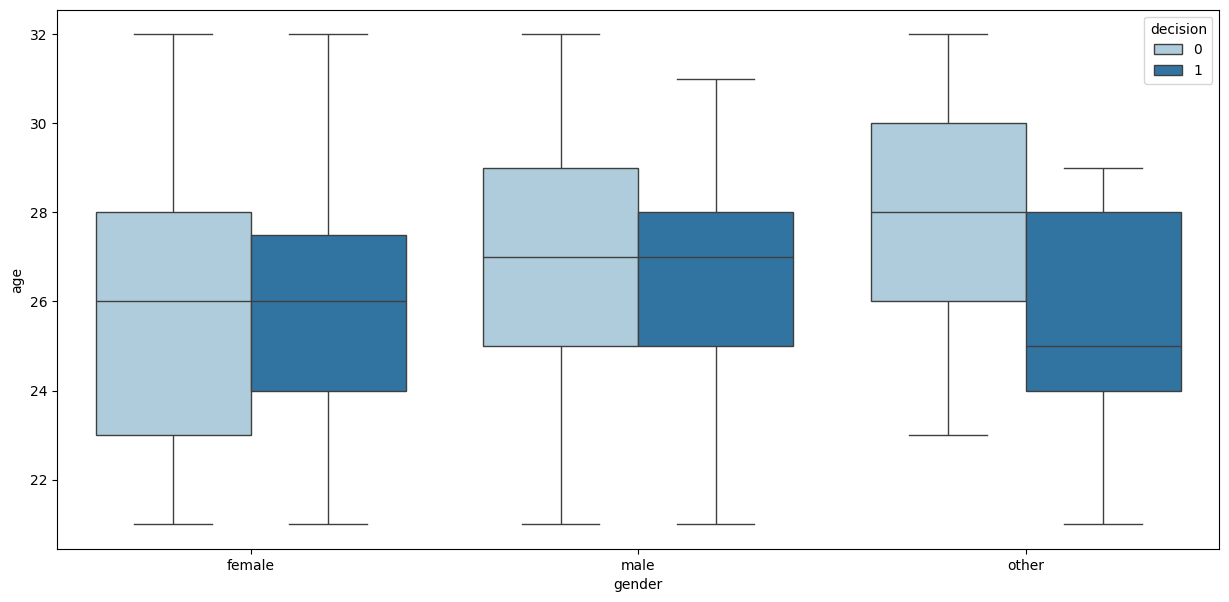

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x="gender", y="age", data=df_B,hue='decision',palette=pal_2)

In [43]:
df_B.groupby('gender')['decision'].mean().to_frame()

,decision
gender,
female,0.139690
male,0.454717
other,0.263158


In [44]:
df_B.groupby(['gender','decision'])['age'].mean().to_frame()

age
gender decision           
female 0         25.608247
       1         25.698413
male   0         27.024221
       1         26.647303
other  0         28.071429
       1         25.400000

In [45]:
df_B.groupby(['gender','decision'])['age'].median().to_frame()

age
gender decision      
female 0         26.0
       1         26.0
male   0         27.0
       1         27.0
other  0         28.0
       1         25.0

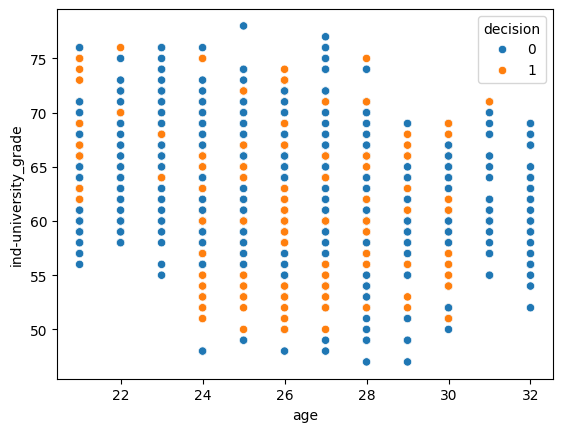

In [46]:
sns.scatterplot(x='age', y='ind-university_grade', data=df_B, hue='decision')
plt.show()


No influence on hiring

In [47]:
df_B.groupby(['age'])['decision'].mean().to_frame()

,decision
age,
21,0.227273
22,0.108696
23,0.115385
24,0.398058
25,0.378151
26,0.352000
27,0.323308
28,0.283688
29,0.445946


In [48]:
df_B.groupby(['decision'])['age'].mean().to_frame()

,age
decision,
0,26.250362
1,26.433657


## COMPANY C

### NUMERIC

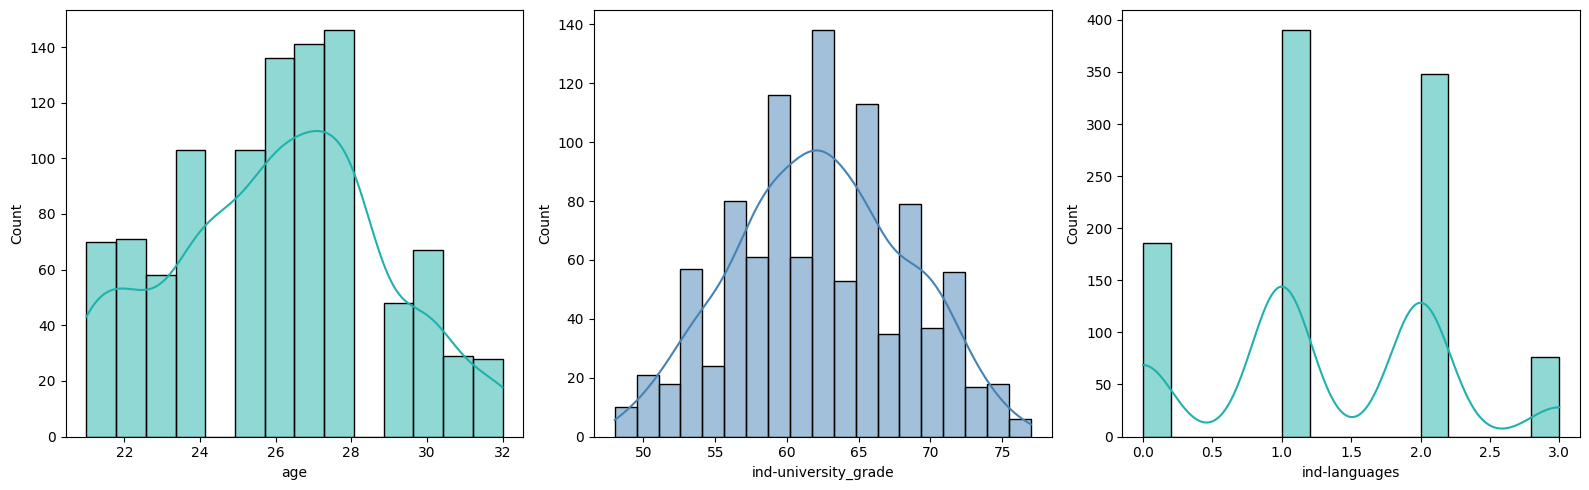

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.histplot(x=df_C['age'], kde=True, color='lightseagreen', ax=axes[0])
sns.histplot(x=df_C['ind-university_grade'], kde=True, color='steelblue', ax=axes[1])
sns.histplot(x=df_C['ind-languages'], kde=True, color='lightseagreen', ax=axes[2])

plt.tight_layout()
plt.show()

### CATEGORIC

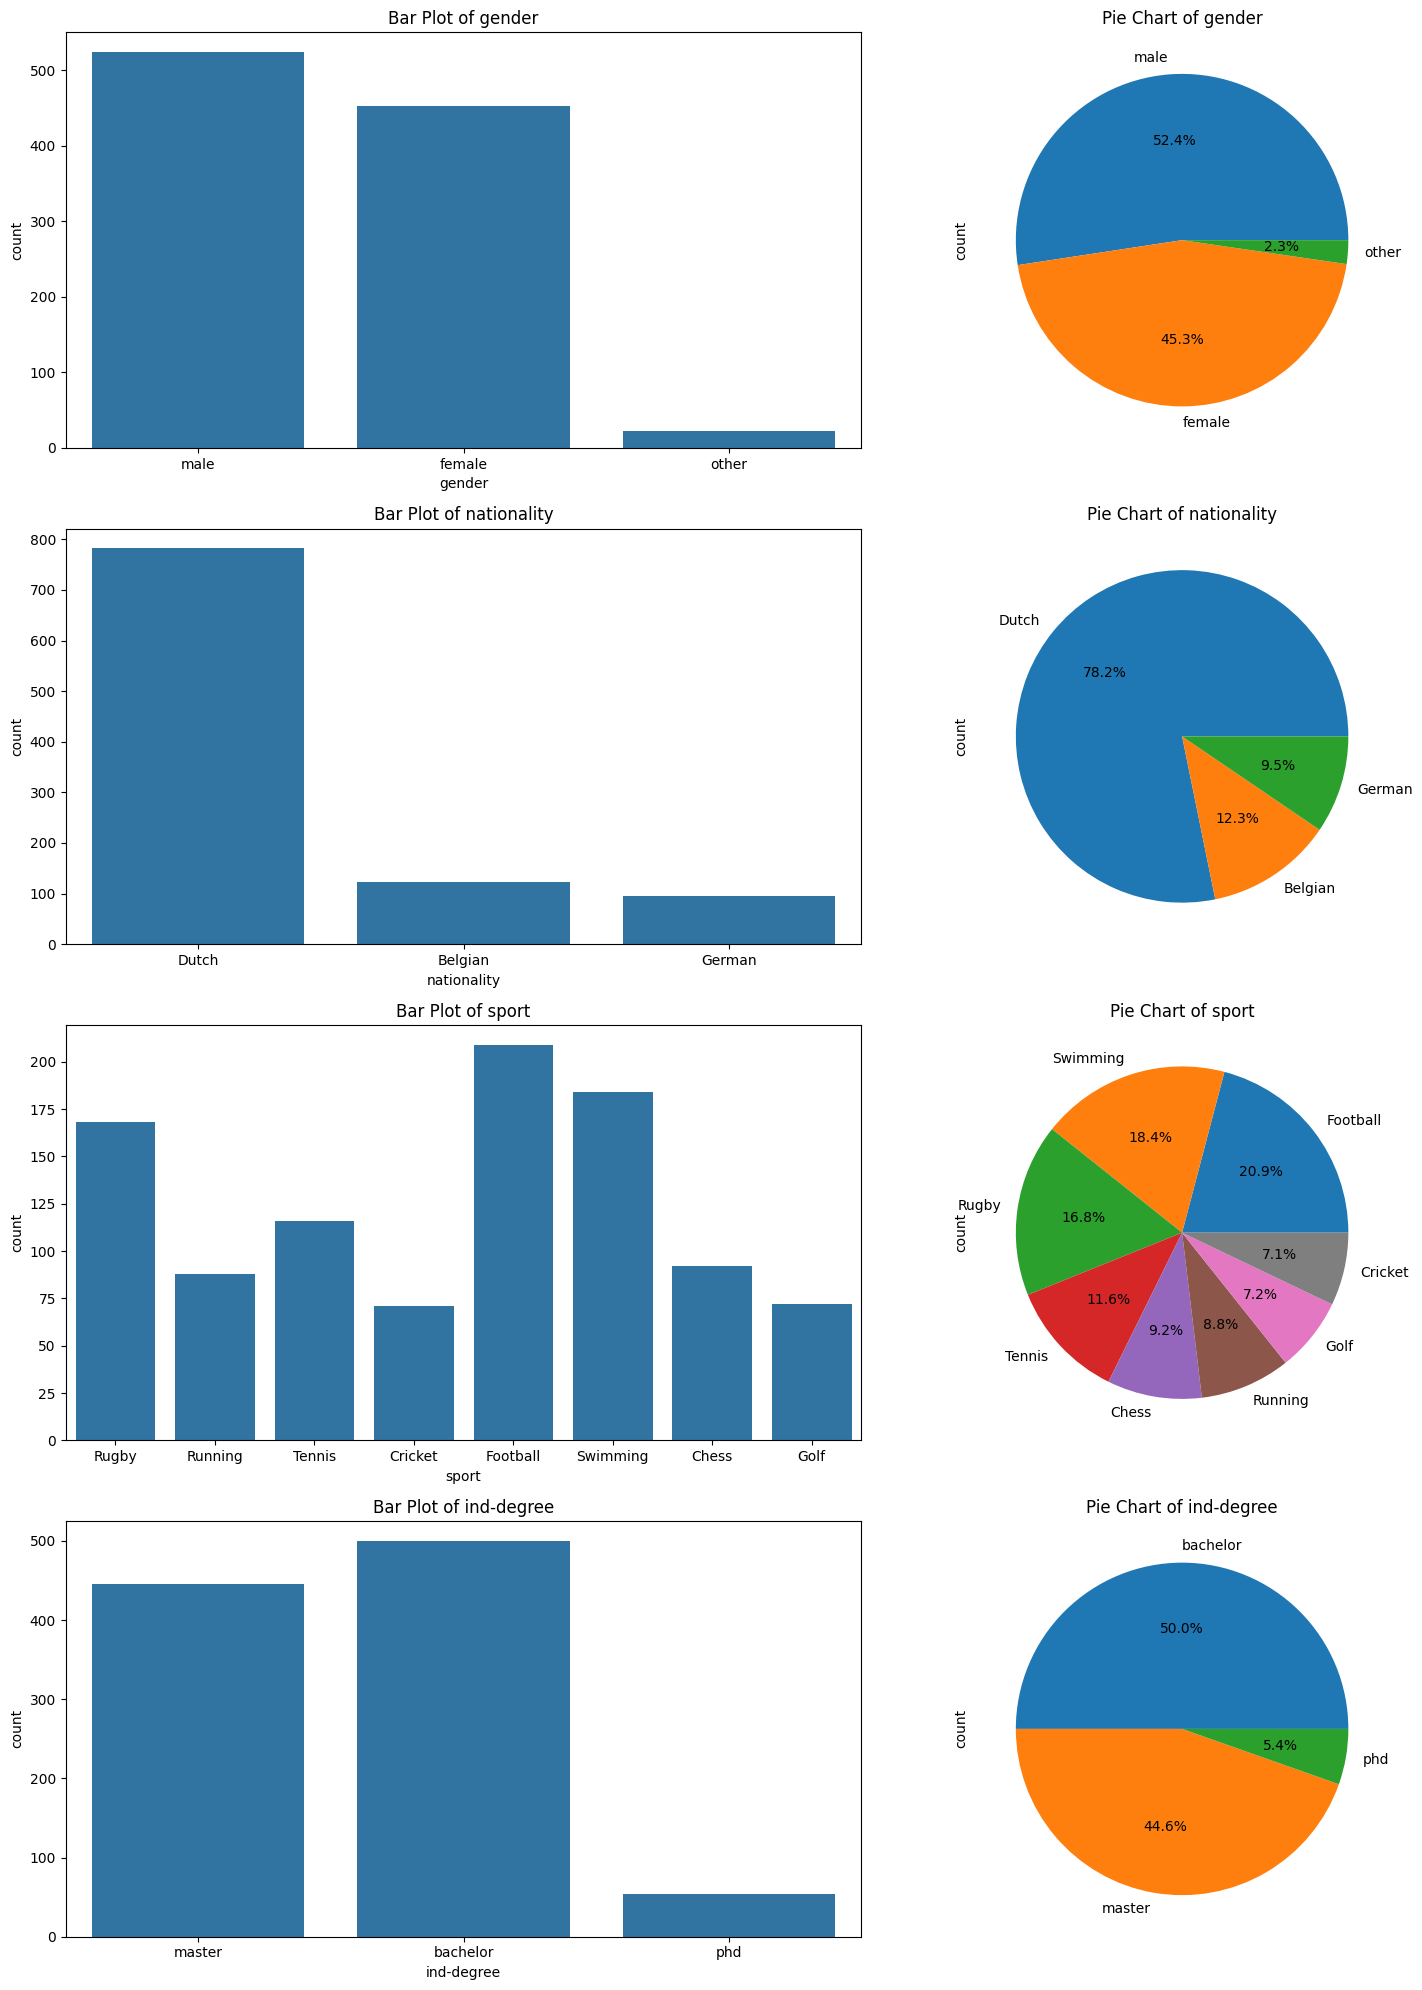

In [50]:
columns = ['gender', 'nationality', 'sport', 'ind-degree']

fig, axes = plt.subplots(len(columns), 2, figsize=(16, 5*len(columns)))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_C, ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar Plot of {col}')
    
    df_C[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 1])
    axes[i, 1].set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)


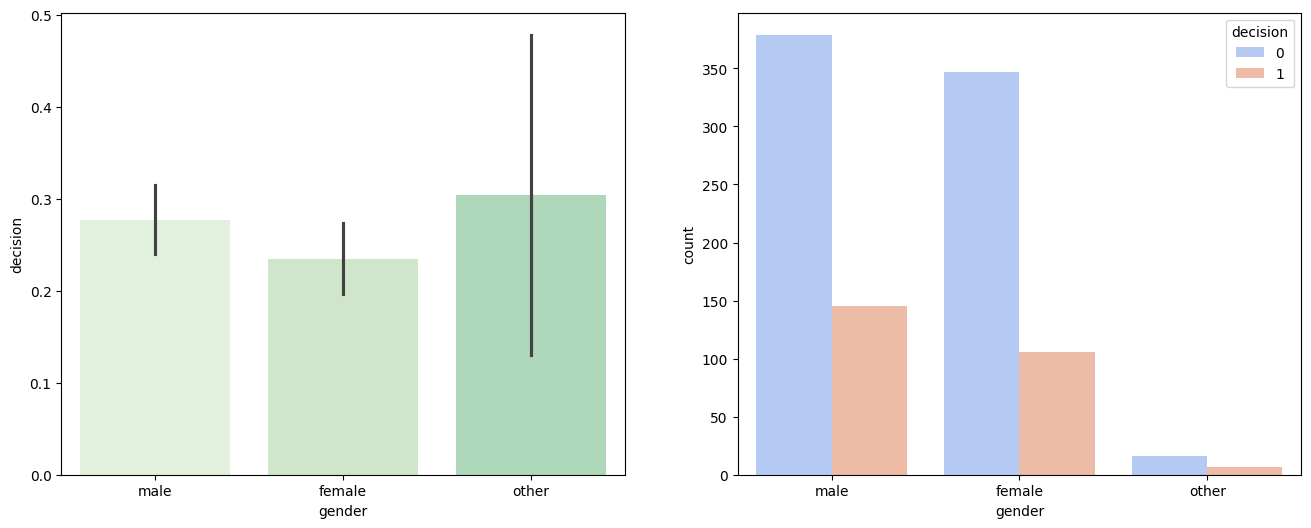

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)


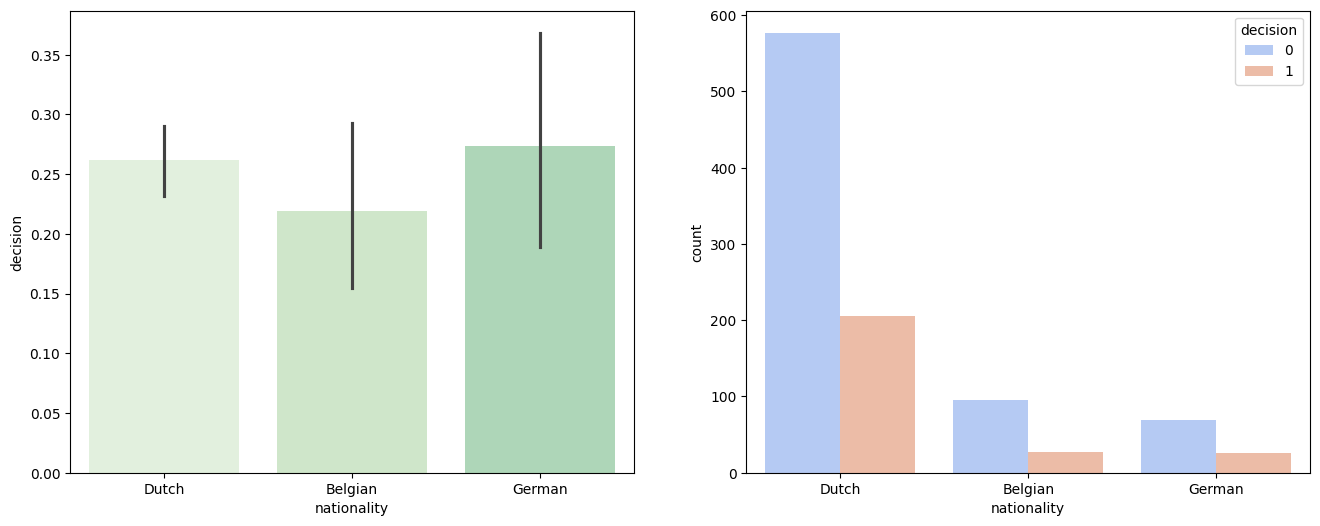

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)


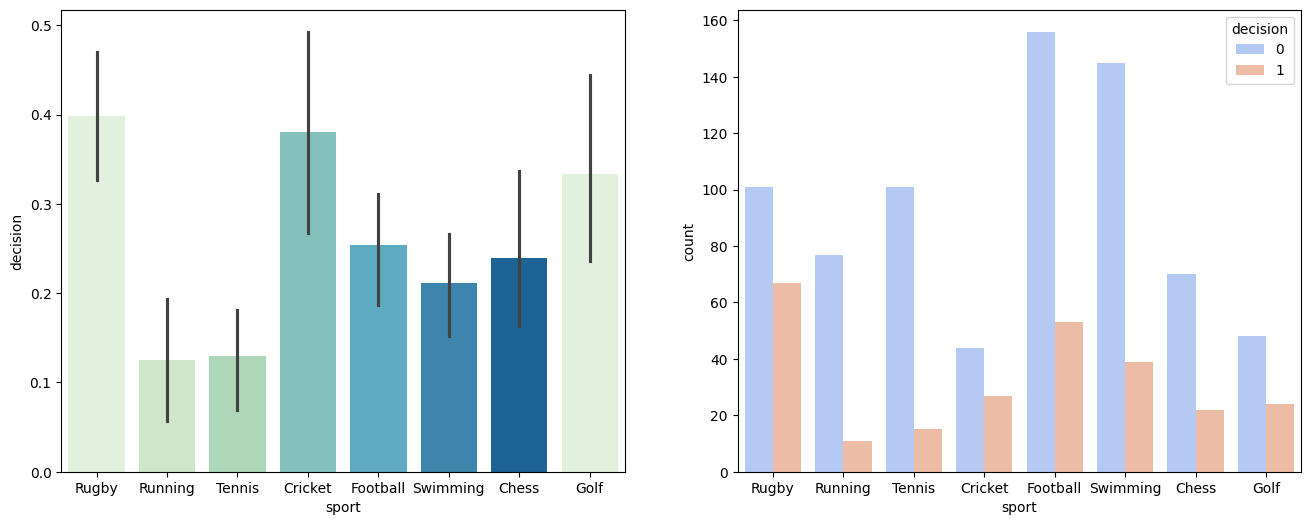

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/257624651.py:7: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)


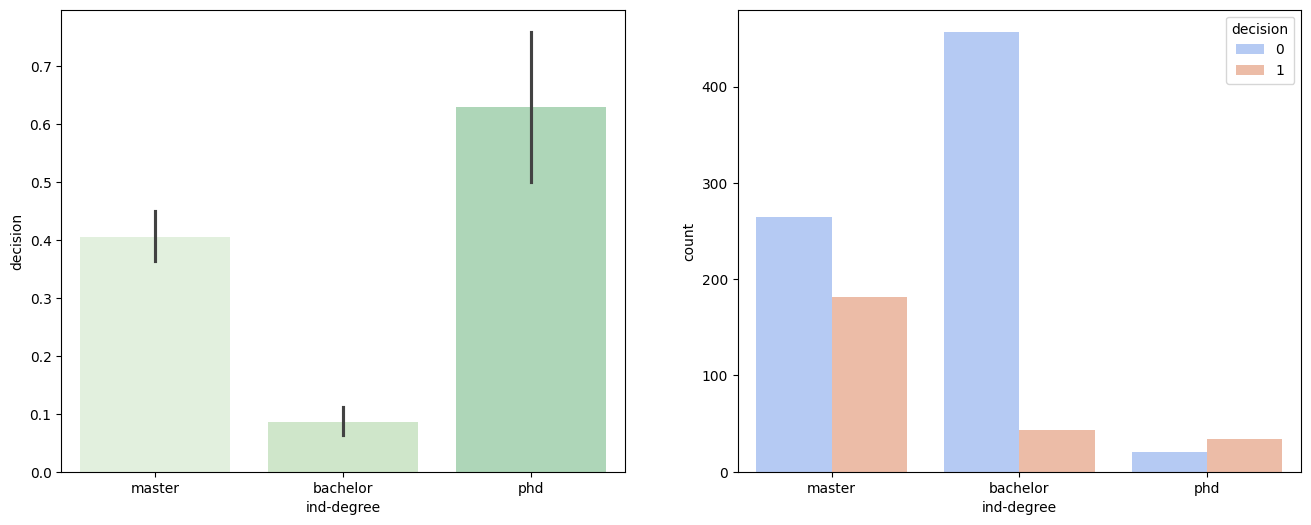

In [51]:
pal_7 = sns.color_palette("GnBu", n_colors=7)

categorical_features = ['gender', 'nationality', 'sport', 'ind-degree']

for col in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x=col, y='decision', data=df_C, ax=axes[0], palette=pal_7)
    st = "No of Hiring in " + col
    sns.countplot(x=col, data=df_C, ax=axes[1], hue='decision', palette='coolwarm')
    plt.show()

In [52]:
def calculate_decision_ratio(df_C, group_column):
    decision_ratios = df_C.groupby(group_column)['decision'].mean()
    return decision_ratios

gender_decision_ratios = calculate_decision_ratio(df_C, 'gender')
print("Decision ratios by gender:\n", gender_decision_ratios)

nationality_decision_ratios = calculate_decision_ratio(df_C, 'nationality')
print("\nDecision ratios by nationality:\n", nationality_decision_ratios)

sport_decision_ratios = calculate_decision_ratio(df_C, 'sport')
print("\nDecision ratios by sport:\n", sport_decision_ratios)

degree_decision_ratios = calculate_decision_ratio(df_C, 'ind-degree')
print("\nDecision ratios by degree:\n", degree_decision_ratios)


Decision ratios by gender:
 gender
female    0.233996
male      0.276718
other     0.304348
Name: decision, dtype: float64

Decision ratios by nationality:
 nationality
Belgian    0.219512
Dutch      0.262148
German     0.273684
Name: decision, dtype: float64

Decision ratios by sport:
 sport
Chess       0.239130
Cricket     0.380282
Football    0.253589
Golf        0.333333
Rugby       0.398810
Running     0.125000
Swimming    0.211957
Tennis      0.129310
Name: decision, dtype: float64

Decision ratios by degree:
 ind-degree
bachelor    0.08600
master      0.40583
phd         0.62963
Name: decision, dtype: float64


Based on the provided data:

- **Gender:** The decision ratios for males (27.67%) are slightly higher compared to females (23.40%) and individuals with other genders (30.43%). However, the differences are relatively small, suggesting that gender may not be a major factor in the hiring decision.

- **Nationality:** The decision ratios for Dutch (26.21%) and German (27.37%) nationals are slightly higher compared to Belgian nationals (21.95%). Again, the differences are not substantial, indicating that nationality may not have a significant impact on the hiring decision.

- **Sport:** Cricket players (38.03%) and rugby players (39.88%) have higher decision ratios compared to individuals involved in other sports. Running (12.50%) has the lowest decision ratio among all sports. This suggests that participation in certain sports, particularly cricket and rugby, may positively influence the likelihood of being hired.

- **Degree:** The decision ratios increase from bachelor's (8.60%) to master's (40.58%) and then significantly for Ph.D. holders (62.96%). This indicates that individuals with a higher level of education, especially Ph.D. holders, have a much higher likelihood of being hired compared to those with lower levels of education.

Overall, while gender and nationality may not have a substantial impact on the hiring decision, participation in certain sports and level of education appear to be significant factors influencing hiring decisions. Specifically, having a higher level of education, such as a master's or Ph.D., greatly increases the likelihood of being hired, while participation in sports like cricket and rugby may also positively influence employment opportunities.

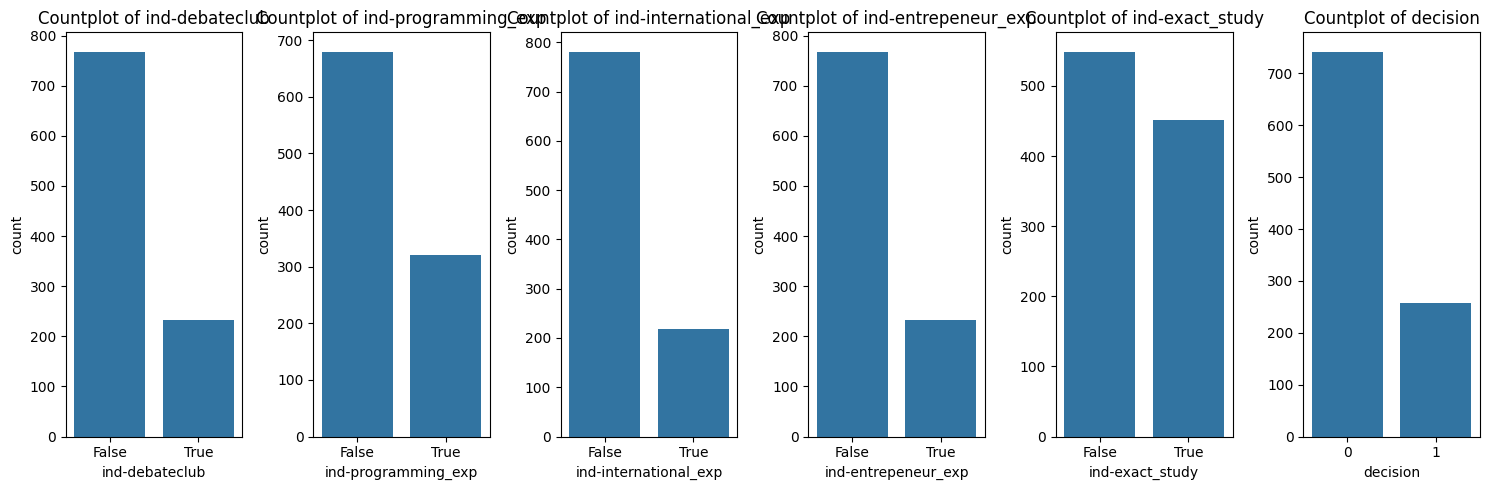

In [53]:
columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study', 'decision']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_C, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

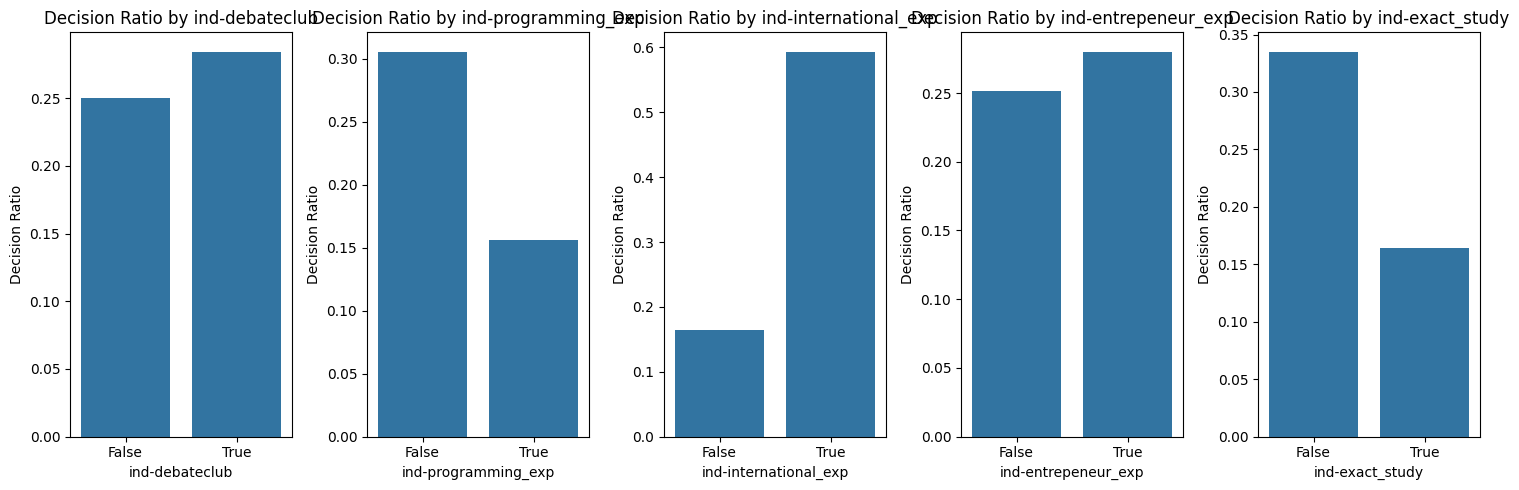

In [54]:
def calculate_decision_ratio(df_C, group_column):
    decision_ratios = df_C.groupby(group_column)['decision'].mean()
    return decision_ratios

columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    decision_ratios = calculate_decision_ratio(df_C, col)
    
    sns.barplot(x=decision_ratios.index, y=decision_ratios.values, ax=axes[i])
    axes[i].set_title(f'Decision Ratio by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Decision Ratio')

plt.tight_layout()
plt.show()


In [55]:
def calculate_decision_ratio(df_C, group_column):
    decision_ratios = df_C.groupby(group_column)['decision'].mean()
    return decision_ratios

ind_debateclub_decision_ratio = calculate_decision_ratio(df_C, 'ind-debateclub')
print("Decision ratio by ind-debateclub:")
print(ind_debateclub_decision_ratio)

ind_programming_exp_decision_ratio = calculate_decision_ratio(df_C, 'ind-programming_exp')
print("\nDecision ratio by ind-programming_exp:")
print(ind_programming_exp_decision_ratio)

ind_international_exp_decision_ratio = calculate_decision_ratio(df_C, 'ind-international_exp')
print("\nDecision ratio by ind-international_exp:")
print(ind_international_exp_decision_ratio)

ind_entrepeneur_exp_decision_ratio = calculate_decision_ratio(df_C, 'ind-entrepeneur_exp')
print("\nDecision ratio by ind-entrepeneur_exp:")
print(ind_entrepeneur_exp_decision_ratio)

ind_exact_study_decision_ratio = calculate_decision_ratio(df_C, 'ind-exact_study')
print("\nDecision ratio by ind-exact_study:")
print(ind_exact_study_decision_ratio)

Decision ratio by ind-debateclub:
ind-debateclub
False    0.250000
True     0.284483
Name: decision, dtype: float64

Decision ratio by ind-programming_exp:
ind-programming_exp
False    0.305882
True     0.156250
Name: decision, dtype: float64

Decision ratio by ind-international_exp:
ind-international_exp
False    0.163892
True     0.593607
Name: decision, dtype: float64

Decision ratio by ind-entrepeneur_exp:
ind-entrepeneur_exp
False    0.251302
True     0.280172
Name: decision, dtype: float64

Decision ratio by ind-exact_study:
ind-exact_study
False    0.335155
True     0.164080
Name: decision, dtype: float64


Based on the provided data:

- **Debate Club Participation:** Individuals who participate in the debate club (28.45%) have a slightly higher decision ratio compared to those who do not participate (25.00%). While the difference is not substantial, it suggests that involvement in the debate club may have a modest positive impact on the likelihood of being hired.

- **Programming Experience:** Individuals without programming experience (30.59%) have a higher decision ratio compared to those with programming experience (15.63%). This indicates that programming experience may not be a significant factor in the hiring decision process, and lack of programming experience does not hinder employment opportunities.

- **International Experience:** Individuals with international experience (59.36%) have a significantly higher decision ratio compared to those without (16.39%). This suggests that international experience is highly valued by employers and significantly increases the likelihood of being hired.

- **Entrepreneurial Experience:** There is a slight difference in decision ratios between individuals with entrepreneurial experience (28.02%) and those without (25.13%). However, the difference is not significant, indicating that entrepreneurial experience may not have a substantial impact on the hiring decision.

- **Exact Study Background:** Individuals without an exact study background (33.52%) have a higher decision ratio compared to those with an exact study background (16.41%). This suggests that having a background in a field unrelated to the job may be advantageous in the hiring process.

Overall, participation in extracurricular activities like debate clubs and possessing international experience appear to be factors positively influencing hiring decisions. On the other hand, programming experience, entrepreneurial experience, and having an exact study background do not seem to have a significant impact on the likelihood of being hired, based on the provided data.

### MULTIVARIABLES

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/2466785040.py:2: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(x="gender", y="age", data=df_C,hue='decision',palette=pal_2)


<Axes: xlabel='gender', ylabel='age'>

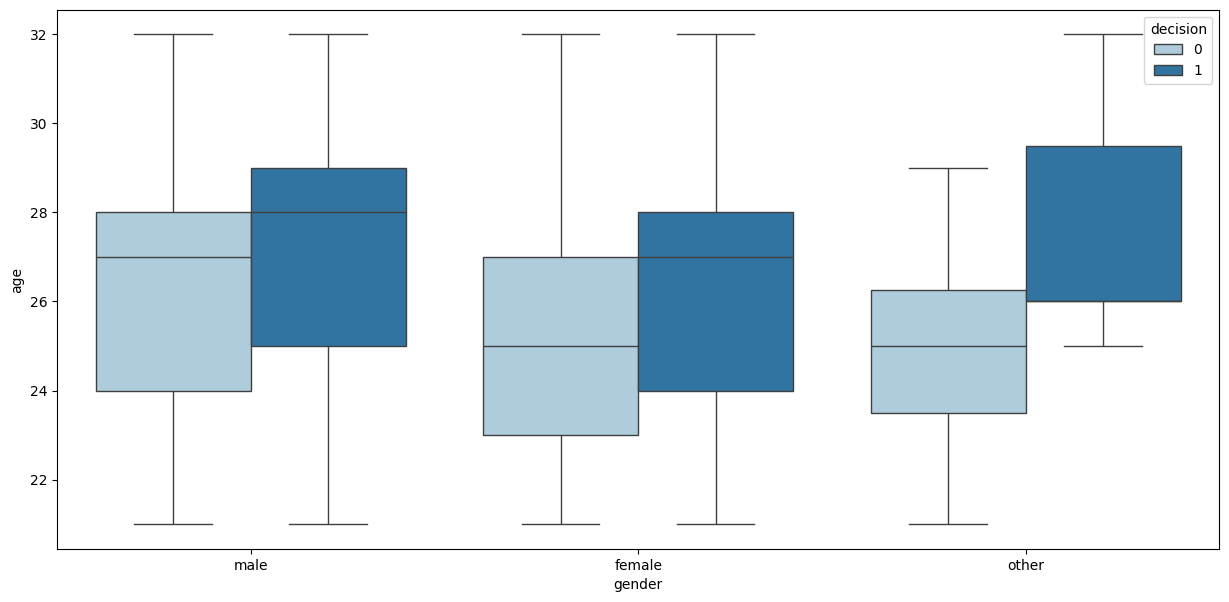

In [56]:
plt.figure(figsize=(15,7))
sns.boxplot(x="gender", y="age", data=df_C,hue='decision',palette=pal_2)

In [57]:
df_C.groupby('gender')['decision'].mean().to_frame()

,decision
gender,
female,0.233996
male,0.276718
other,0.304348


In [58]:
df_C.groupby(['gender','decision'])['age'].mean().to_frame()

age
gender decision           
female 0         25.063401
       1         26.471698
male   0         26.348285
       1         27.289655
other  0         25.062500
       1         27.714286

In [59]:
df_C.groupby(['gender','decision'])['age'].median().to_frame()

age
gender decision      
female 0         25.0
       1         27.0
male   0         27.0
       1         28.0
other  0         25.0
       1         26.0

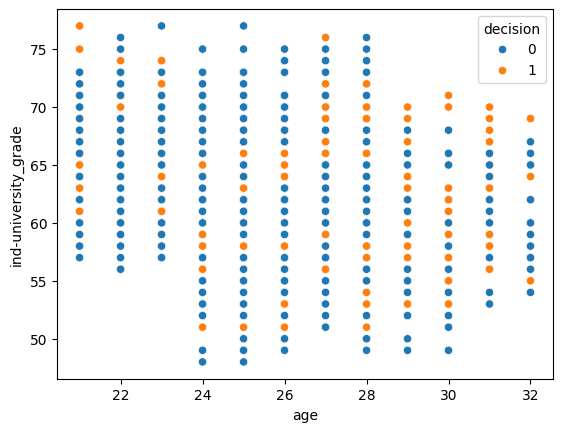

In [60]:
sns.scatterplot(x='age', y='ind-university_grade', data=df_C, hue='decision')
plt.show()


In [61]:
df_C.groupby(['age'])['decision'].mean().to_frame()

,decision
age,
21,0.171429
22,0.070423
23,0.206897
24,0.233010
25,0.194175
26,0.286765
27,0.198582
28,0.273973
29,0.500000


In [62]:
df_C.groupby(['decision'])['age'].mean().to_frame()

,age
decision,
0,25.719677
1,26.965116


## COMPANY D

### NUMERIC

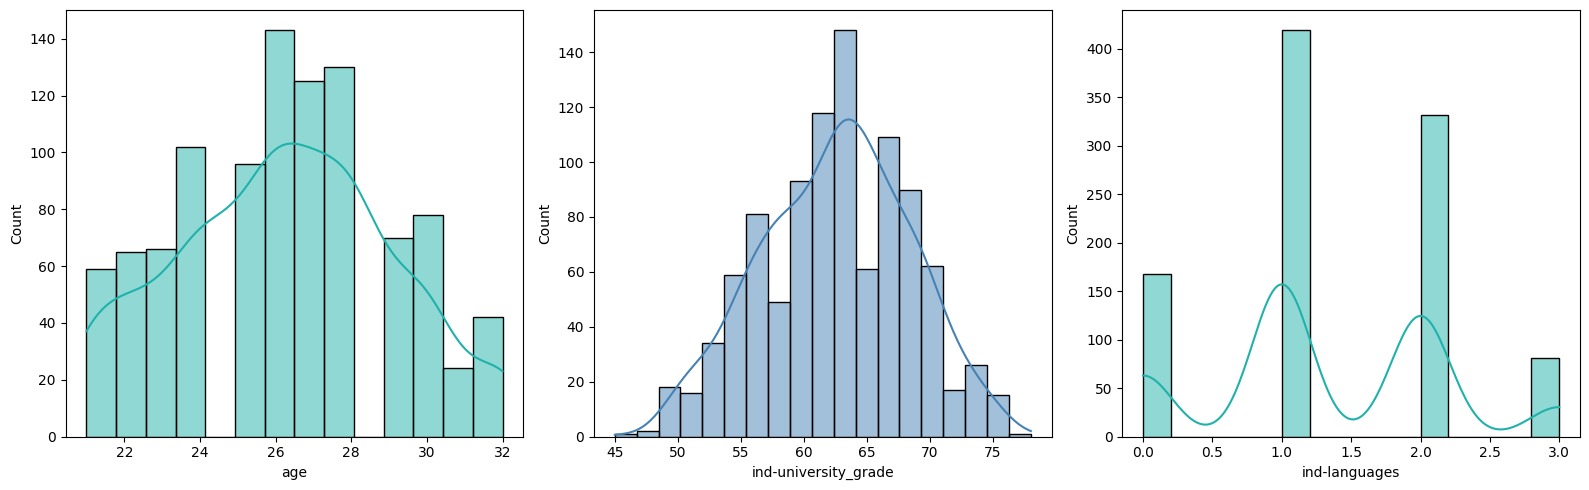

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.histplot(x=df_D['age'], kde=True, color='lightseagreen', ax=axes[0])
sns.histplot(x=df_D['ind-university_grade'], kde=True, color='steelblue', ax=axes[1])
sns.histplot(x=df_D['ind-languages'], kde=True, color='lightseagreen', ax=axes[2])

plt.tight_layout()
plt.show()

### CATEGORIC

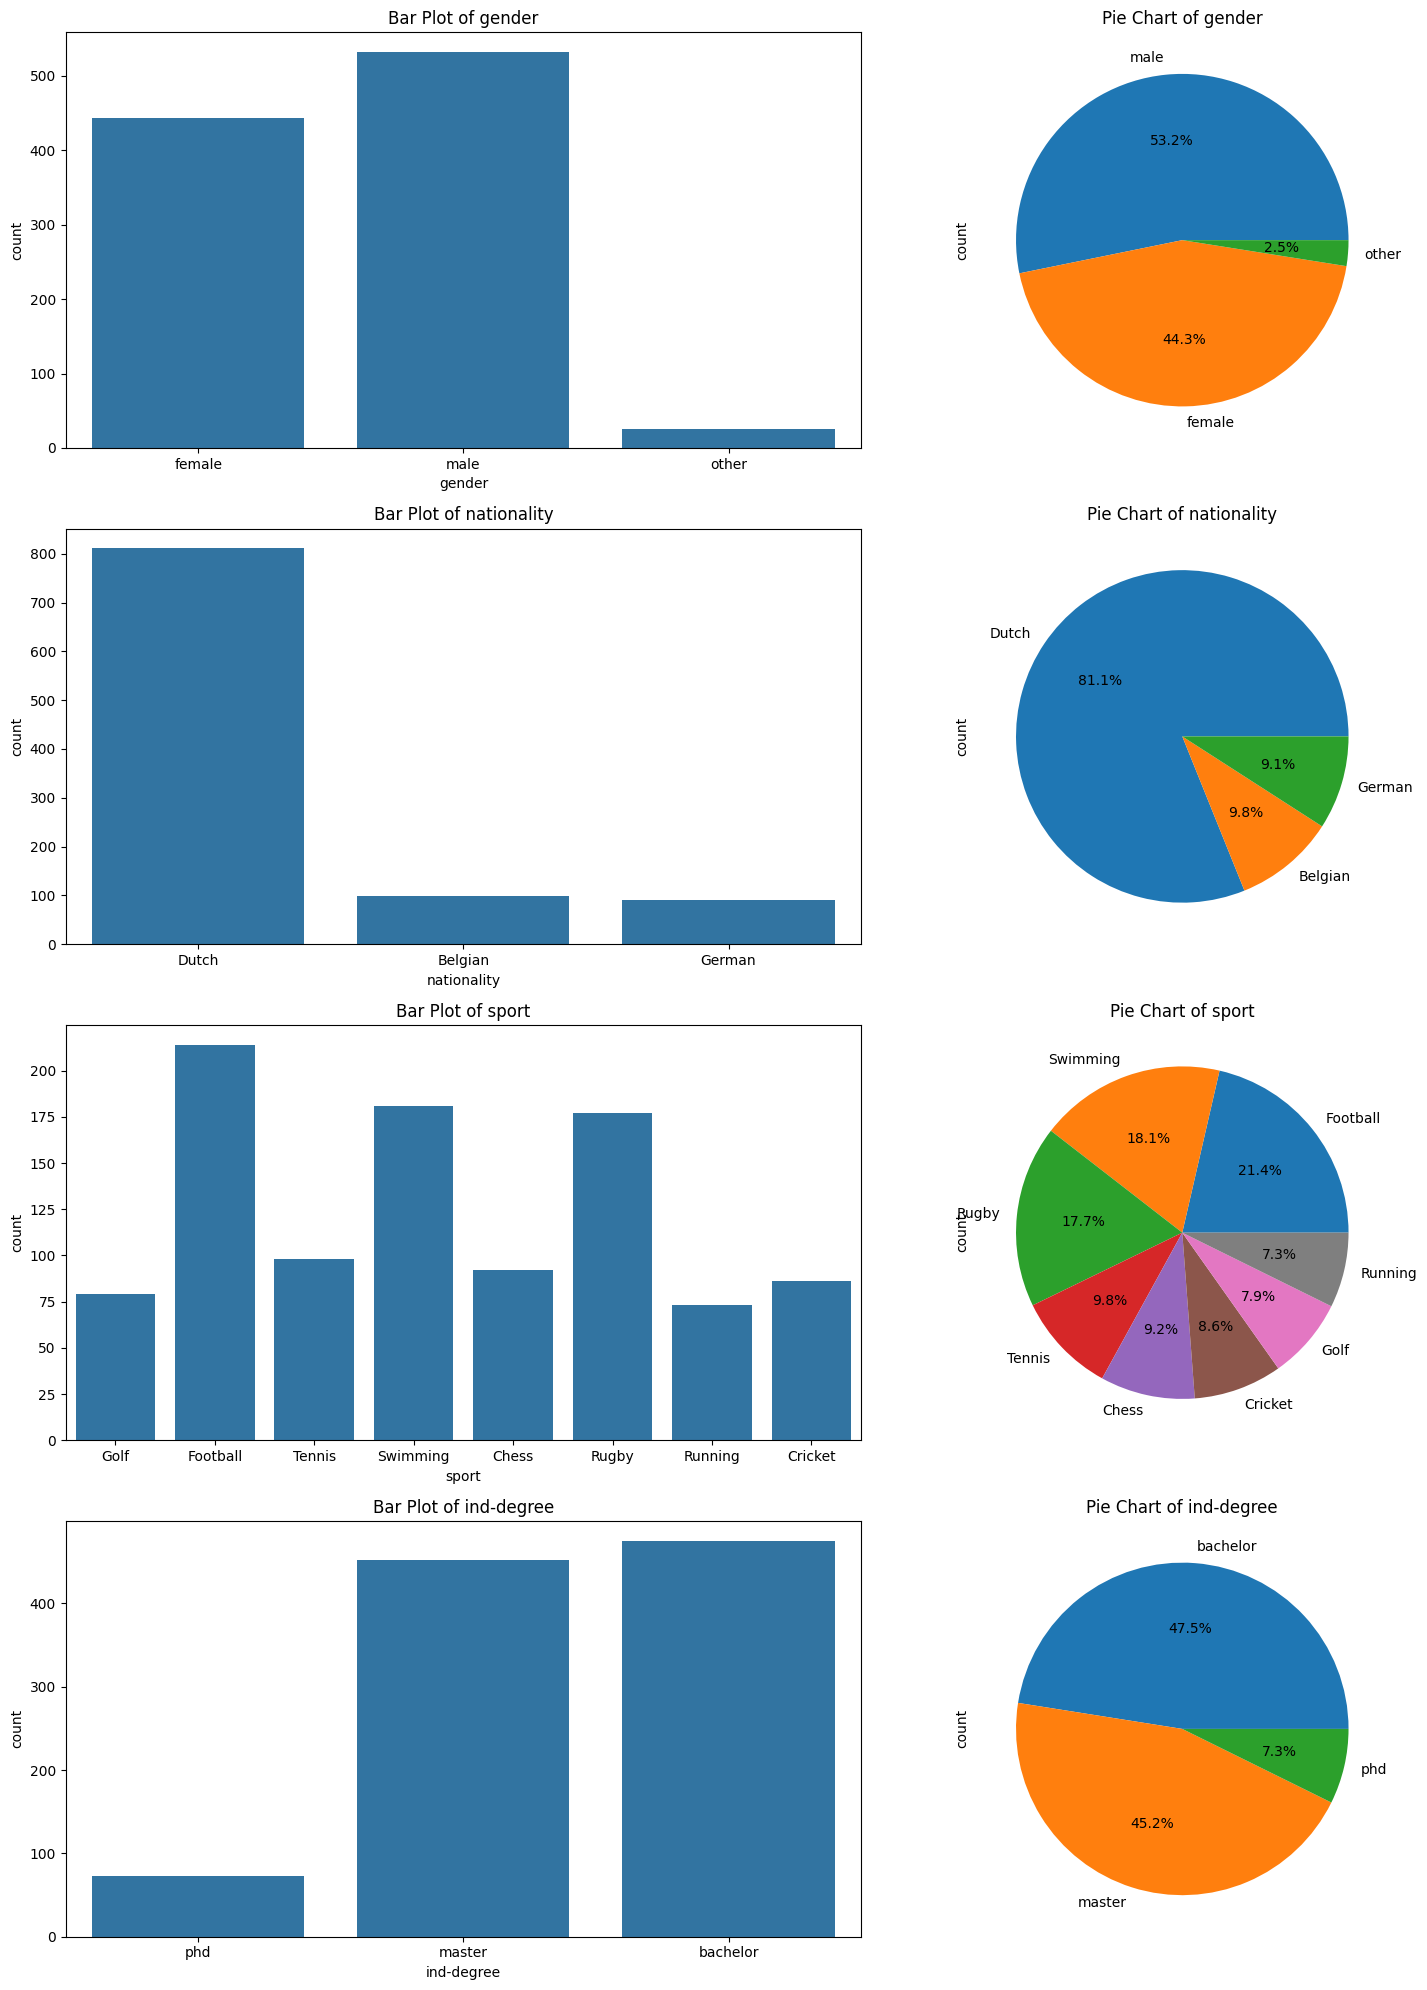

In [64]:
columns = ['gender', 'nationality', 'sport', 'ind-degree']

fig, axes = plt.subplots(len(columns), 2, figsize=(16, 5*len(columns)))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_D, ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar Plot of {col}')
    
    df_D[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i, 1])
    axes[i, 1].set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)


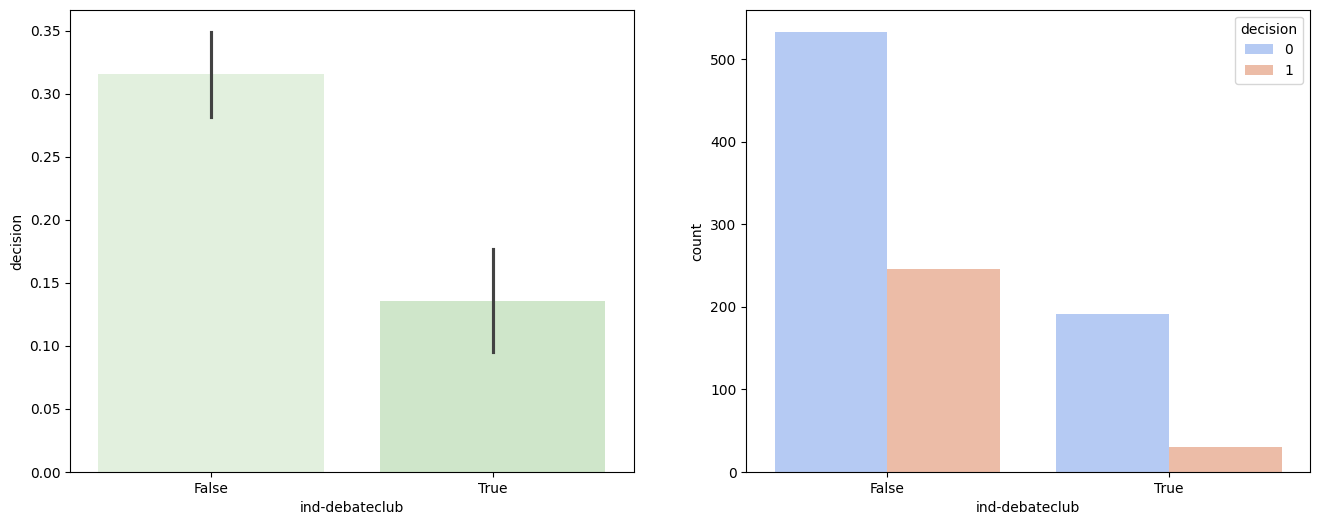

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)


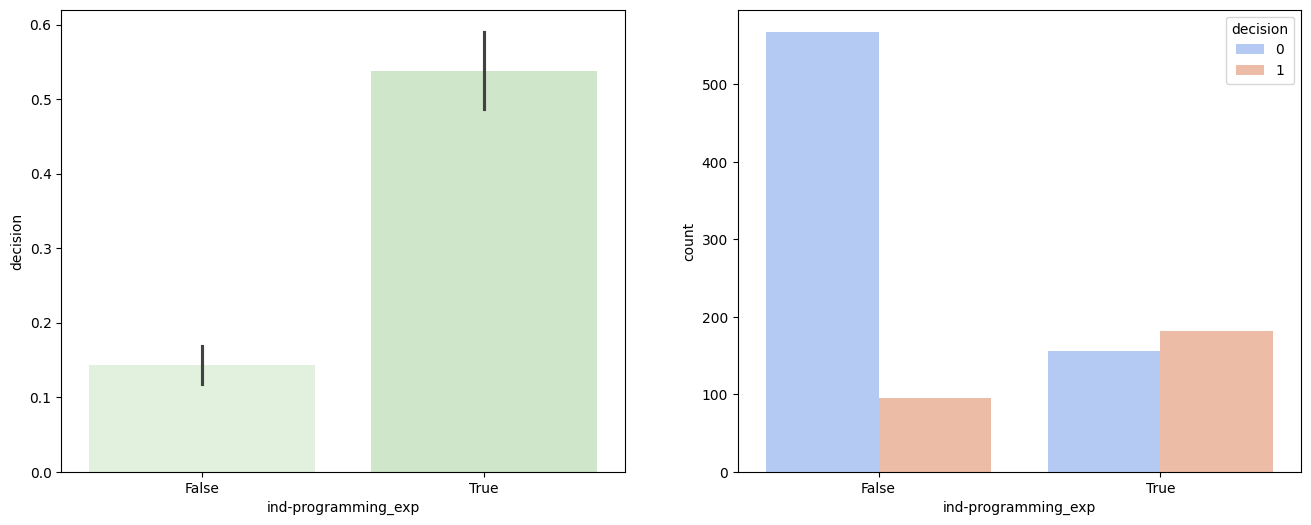

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)


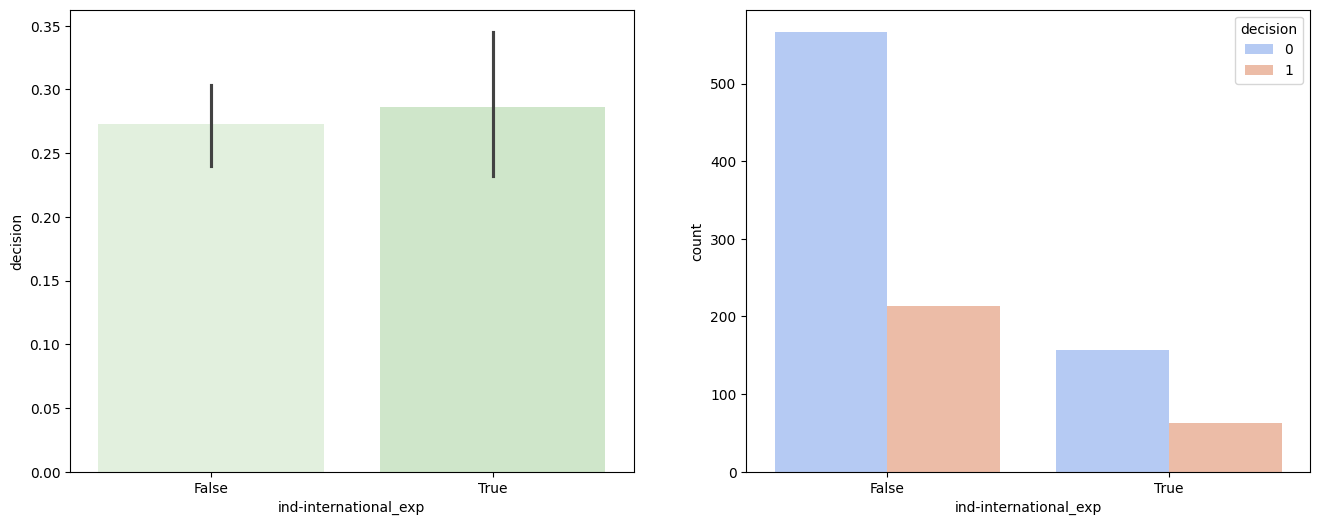

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)


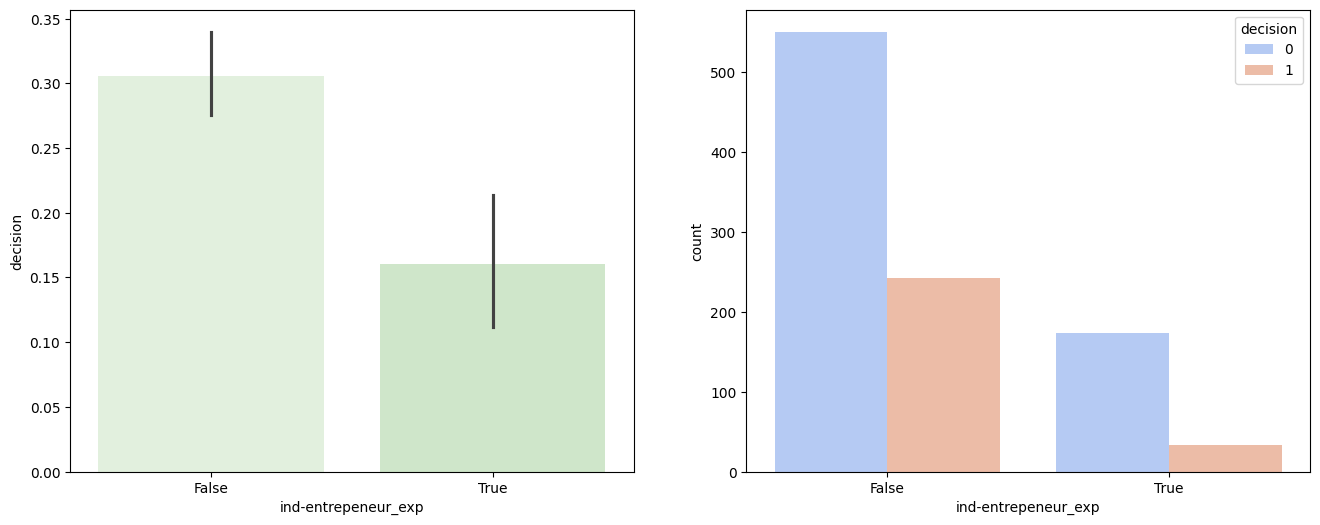

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)


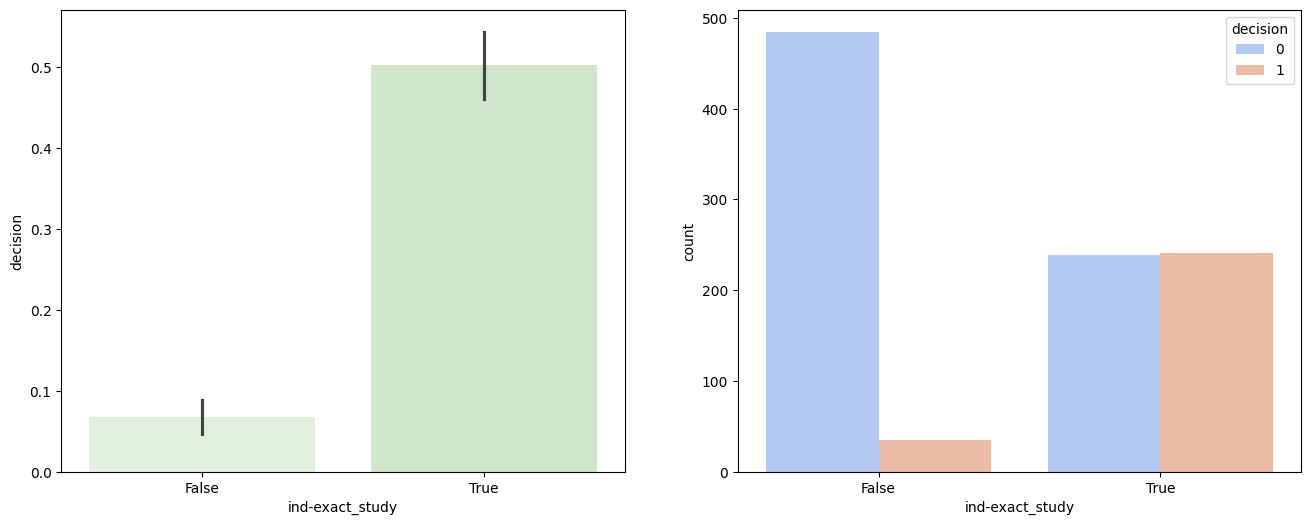

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)
/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/3908153781.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)


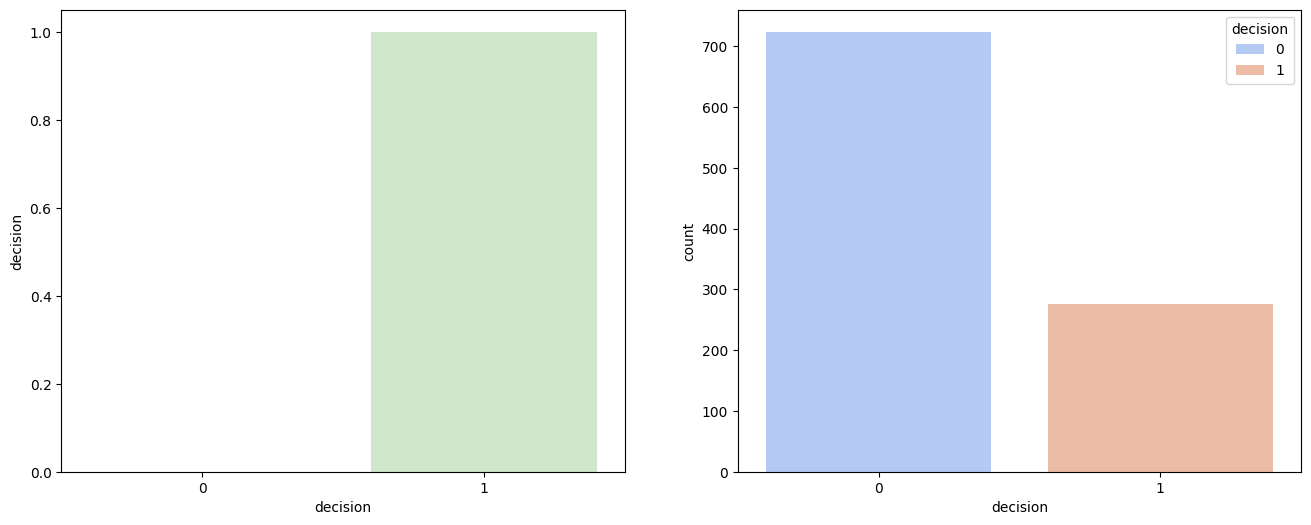

In [65]:
pal_7 = sns.color_palette("GnBu", n_colors=7)

categorical_features = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study', 'decision']


for col in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x=col, y='decision', data=df_D, ax=axes[0], palette=pal_7)
    st = "No of Hiring in " + col
    sns.countplot(x=col, data=df_D, ax=axes[1], hue='decision', palette='coolwarm')
    plt.show()

In [66]:
def calculate_decision_ratio(df_D, group_column):
    decision_ratios = df_D.groupby(group_column)['decision'].mean()
    return decision_ratios

gender_decision_ratios = calculate_decision_ratio(df_D, 'gender')
print("Decision ratios by gender:\n", gender_decision_ratios)

nationality_decision_ratios = calculate_decision_ratio(df_D, 'nationality')
print("\nDecision ratios by nationality:\n", nationality_decision_ratios)

sport_decision_ratios = calculate_decision_ratio(df_D, 'sport')
print("\nDecision ratios by sport:\n", sport_decision_ratios)

degree_decision_ratios = calculate_decision_ratio(df_D, 'ind-degree')
print("\nDecision ratios by degree:\n", degree_decision_ratios)


Decision ratios by gender:
 gender
female    0.343115
male      0.219925
other     0.280000
Name: decision, dtype: float64

Decision ratios by nationality:
 nationality
Belgian    0.316327
Dutch      0.277435
German     0.219780
Name: decision, dtype: float64

Decision ratios by sport:
 sport
Chess       0.413043
Cricket     0.313953
Football    0.219626
Golf        0.329114
Rugby       0.141243
Running     0.397260
Swimming    0.331492
Tennis      0.244898
Name: decision, dtype: float64

Decision ratios by degree:
 ind-degree
bachelor    0.134737
master      0.404867
phd         0.397260
Name: decision, dtype: float64


Based on the provided data:

- **Gender:** The decision ratios for females (34.31%) are higher compared to males (21.99%) and individuals with other genders (28.00%). This suggests that females have a higher likelihood of being hired compared to males and individuals with other gender identities.

- **Nationality:** The decision ratios for Belgian (31.63%) and Dutch (27.74%) nationals are higher compared to German nationals (21.98%). This indicates that individuals from Belgium and the Netherlands have a slightly higher likelihood of being hired compared to those from Germany.

- **Sport:** Chess players (41.30%) and runners (39.73%) have the highest decision ratios among all sports, indicating that participation in these sports may positively influence the likelihood of being hired. Rugby players (14.12%) have the lowest decision ratio among all sports.

- **Degree:** The decision ratios increase from bachelor's (13.47%) to master's (40.49%) and then slightly decrease for Ph.D. holders (39.73%). This suggests that individuals with higher levels of education, especially those with a master's degree, have a higher likelihood of being hired compared to those with lower levels of education.

Overall, gender, nationality, sport, and degree level appear to be significant factors influencing hiring decisions. Females, individuals from Belgium and the Netherlands, participants in chess and running, and those with higher levels of education, especially master's degrees, have higher decision ratios, indicating a greater likelihood of being hired.

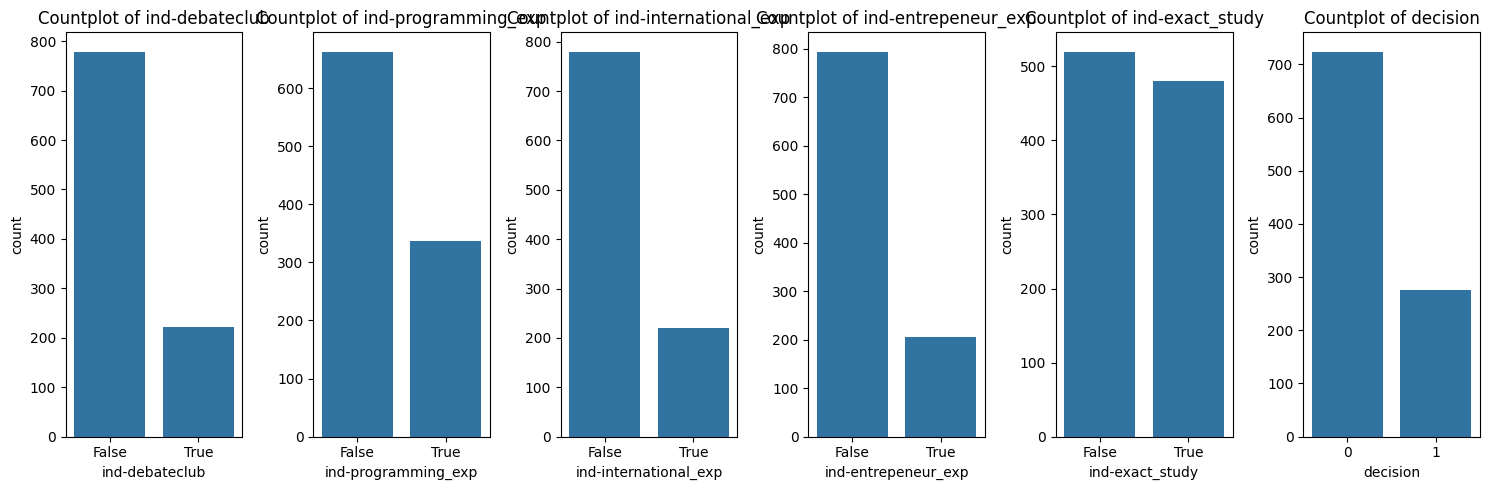

In [67]:
columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study', 'decision']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_D, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


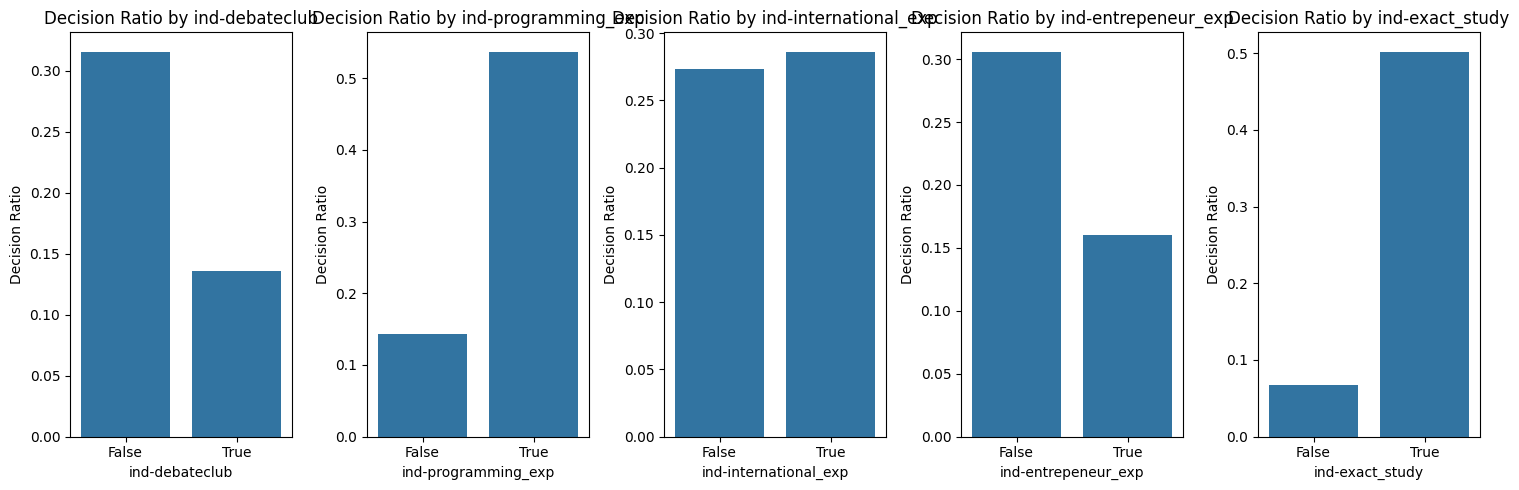

In [68]:
def calculate_decision_ratio(df_D, group_column):
    decision_ratios = df_D.groupby(group_column)['decision'].mean()
    return decision_ratios

columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    decision_ratios = calculate_decision_ratio(df_D, col)
    
    sns.barplot(x=decision_ratios.index, y=decision_ratios.values, ax=axes[i])
    axes[i].set_title(f'Decision Ratio by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Decision Ratio')

plt.tight_layout()
plt.show()


In [69]:
def calculate_decision_ratio(df_D, group_column):
    decision_ratios = df_D.groupby(group_column)['decision'].mean()
    return decision_ratios

ind_debateclub_decision_ratio = calculate_decision_ratio(df_D, 'ind-debateclub')
print("Decision ratio by ind-debateclub:")
print(ind_debateclub_decision_ratio)

ind_programming_exp_decision_ratio = calculate_decision_ratio(df_D, 'ind-programming_exp')
print("\nDecision ratio by ind-programming_exp:")
print(ind_programming_exp_decision_ratio)

ind_international_exp_decision_ratio = calculate_decision_ratio(df_D, 'ind-international_exp')
print("\nDecision ratio by ind-international_exp:")
print(ind_international_exp_decision_ratio)

ind_entrepeneur_exp_decision_ratio = calculate_decision_ratio(df_D, 'ind-entrepeneur_exp')
print("\nDecision ratio by ind-entrepeneur_exp:")
print(ind_entrepeneur_exp_decision_ratio)

ind_exact_study_decision_ratio = calculate_decision_ratio(df_D, 'ind-exact_study')
print("\nDecision ratio by ind-exact_study:")
print(ind_exact_study_decision_ratio)

Decision ratio by ind-debateclub:
ind-debateclub
False    0.315789
True     0.135747
Name: decision, dtype: float64

Decision ratio by ind-programming_exp:
ind-programming_exp
False    0.143288
True     0.537092
Name: decision, dtype: float64

Decision ratio by ind-international_exp:
ind-international_exp
False    0.273077
True     0.286364
Name: decision, dtype: float64

Decision ratio by ind-entrepeneur_exp:
ind-entrepeneur_exp
False    0.306045
True     0.160194
Name: decision, dtype: float64

Decision ratio by ind-exact_study:
ind-exact_study
False    0.067308
True     0.502083
Name: decision, dtype: float64


Based on the provided data:

- **Debate Club Participation:** Individuals who do not participate in the debate club (31.58%) have a higher decision ratio compared to those who do participate (13.57%). This suggests that involvement in the debate club may not significantly impact the likelihood of being hired, and those who do not participate have a higher chance of being hired.

- **Programming Experience:** Individuals with programming experience (53.71%) have a substantially higher decision ratio compared to those without programming experience (14.33%). This indicates that programming experience is a significant factor positively influencing the likelihood of being hired.

- **International Experience:** There is little difference in decision ratios between individuals with international experience (28.64%) and those without (27.31%). This suggests that international experience may not have a significant impact on the likelihood of being hired based on the provided data.

- **Entrepreneurial Experience:** Individuals without entrepreneurial experience (30.60%) have a slightly higher decision ratio compared to those with entrepreneurial experience (16.02%). This indicates that entrepreneurial experience may not have a substantial impact on the likelihood of being hired.

- **Exact Study Background:** Individuals with an exact study background (50.21%) have a substantially higher decision ratio compared to those without (6.73%). This suggests that having an exact study background significantly increases the likelihood of being hired.

Overall, programming experience and having an exact study background appear to be significant factors positively influencing hiring decisions. On the other hand, participation in the debate club, international experience, and entrepreneurial experience do not seem to have a significant impact on the likelihood of being hired based on the provided data.

### MULTIVARIABLES

/var/folders/3h/njsczq892656qjypb8pxx1f00000gn/T/ipykernel_42759/2588357984.py:2: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(x="gender", y="age", data=df_D,hue='decision',palette=pal_2)


<Axes: xlabel='gender', ylabel='age'>

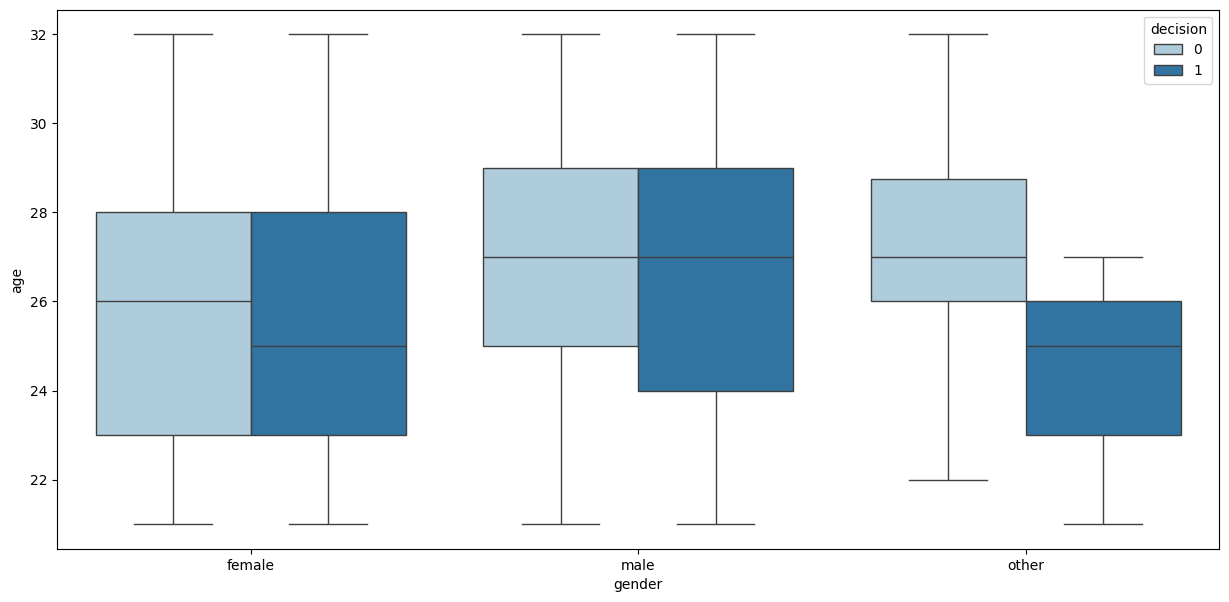

In [70]:
plt.figure(figsize=(15,7))
sns.boxplot(x="gender", y="age", data=df_D,hue='decision',palette=pal_2)

In [71]:
df_D.groupby('gender')['decision'].mean().to_frame()

,decision
gender,
female,0.343115
male,0.219925
other,0.280000


In [72]:
df_D.groupby(['gender','decision'])['age'].mean().to_frame()

age
gender decision           
female 0         25.680412
       1         25.348684
male   0         26.840964
       1         26.512821
other  0         27.111111
       1         24.428571

In [73]:
df_D.groupby(['gender','decision'])['age'].median().to_frame()

age
gender decision      
female 0         26.0
       1         25.0
male   0         27.0
       1         27.0
other  0         27.0
       1         25.0

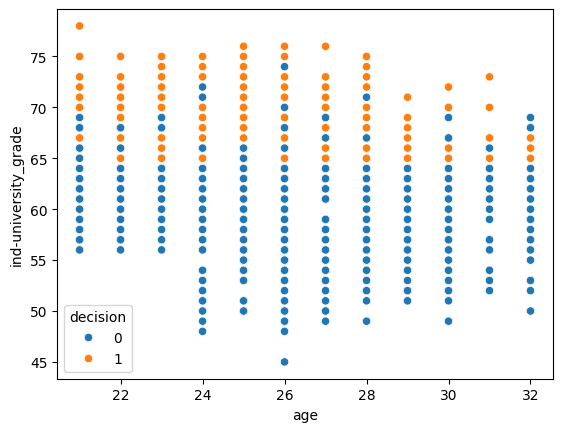

In [74]:
sns.scatterplot(x='age', y='ind-university_grade', data=df_D, hue='decision')
plt.show()


In [75]:
df_D.groupby(['age'])['decision'].mean().to_frame()

,decision
age,
21,0.406780
22,0.400000
23,0.348485
24,0.245098
25,0.239583
26,0.244755
27,0.240000
28,0.315385
29,0.214286


In [76]:
df_D.groupby(['decision'])['age'].mean().to_frame()

,age
decision,
0,26.381215
1,25.818841


In [77]:
from sklearn.preprocessing import LabelEncoder

label_encode_columns = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study','decision']

label_encoder = LabelEncoder()
for column in label_encode_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

df1.head()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,female,24,German,Swimming,70,0,0,0,0,1,1,phd,A,1
1,male,26,German,Golf,67,0,1,0,0,2,1,bachelor,A,0
2,female,23,Dutch,Running,67,0,1,1,0,0,1,master,A,0
3,male,24,Dutch,Cricket,70,0,1,0,0,1,1,master,A,1
4,female,26,German,Golf,59,0,0,0,0,1,0,master,A,1


In [78]:
one_hot_encode_columns = ['gender', 'nationality', 'sport', 'ind-degree', 'company']

df1_encoded = pd.get_dummies(df1, columns=one_hot_encode_columns, drop_first=False)

df1_encoded.head()

,age,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,decision,gender_female,...,sport_Running,sport_Swimming,sport_Tennis,ind-degree_bachelor,ind-degree_master,ind-degree_phd,company_A,company_B,company_C,company_D
0,24,70,0,0,0,0,1,1,1,True,...,False,True,False,False,False,True,True,False,False,False
1,26,67,0,1,0,0,2,1,0,False,...,False,False,False,True,False,False,True,False,False,False
2,23,67,0,1,1,0,0,1,0,True,...,True,False,False,False,True,False,True,False,False,False
3,24,70,0,1,0,0,1,1,1,False,...,False,False,False,False,True,False,True,False,False,False
4,26,59,0,0,0,0,1,0,1,True,...,False,False,False,False,True,False,True,False,False,False


In [79]:
# Diğer boolean sütunları 0 ve 1'e dönüştürme
boolean_columns = ['gender_female', 'gender_male', 'gender_other', 'nationality_Belgian', 'nationality_Dutch', 'nationality_German', 'sport_Chess', 'sport_Cricket', 'sport_Football', 'sport_Golf', 'sport_Rugby', 'sport_Running', 'sport_Swimming', 'sport_Tennis', 'ind-degree_bachelor', 'ind-degree_master', 'ind-degree_phd', 'company_A', 'company_B', 'company_C', 'company_D']
for column in boolean_columns:
    df1_encoded[column] = df1_encoded[column].astype(int)

df1_encoded.head()


,age,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,decision,gender_female,...,sport_Running,sport_Swimming,sport_Tennis,ind-degree_bachelor,ind-degree_master,ind-degree_phd,company_A,company_B,company_C,company_D
0,24,70,0,0,0,0,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
1,26,67,0,1,0,0,2,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,23,67,0,1,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
3,24,70,0,1,0,0,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,26,59,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,1,0,0,0


In [80]:
df1_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    4000 non-null   int64
 1   ind-university_grade   4000 non-null   int64
 2   ind-debateclub         4000 non-null   int64
 3   ind-programming_exp    4000 non-null   int64
 4   ind-international_exp  4000 non-null   int64
 5   ind-entrepeneur_exp    4000 non-null   int64
 6   ind-languages          4000 non-null   int64
 7   ind-exact_study        4000 non-null   int64
 8   decision               4000 non-null   int64
 9   gender_female          4000 non-null   int64
 10  gender_male            4000 non-null   int64
 11  gender_other           4000 non-null   int64
 12  nationality_Belgian    4000 non-null   int64
 13  nationality_Dutch      4000 non-null   int64
 14  nationality_German     4000 non-null   int64
 15  sport_Chess            4000 non-null  

In [81]:
df1_encoded.columns

Index(['age', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',
       'ind-international_exp', 'ind-entrepeneur_exp', 'ind-languages',
       'ind-exact_study', 'decision', 'gender_female', 'gender_male',
       'gender_other', 'nationality_Belgian', 'nationality_Dutch',
       'nationality_German', 'sport_Chess', 'sport_Cricket', 'sport_Football',
       'sport_Golf', 'sport_Rugby', 'sport_Running', 'sport_Swimming',
       'sport_Tennis', 'ind-degree_bachelor', 'ind-degree_master',
       'ind-degree_phd', 'company_A', 'company_B', 'company_C', 'company_D'],
      dtype='object')

In [82]:
classes = df1_encoded['decision'].unique()
class_counts = df1_encoded['decision'].value_counts()
print(class_counts)

decision
0    2733
1    1267
Name: count, dtype: int64


In [83]:
df1_encoded.columns

Index(['age', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',
       'ind-international_exp', 'ind-entrepeneur_exp', 'ind-languages',
       'ind-exact_study', 'decision', 'gender_female', 'gender_male',
       'gender_other', 'nationality_Belgian', 'nationality_Dutch',
       'nationality_German', 'sport_Chess', 'sport_Cricket', 'sport_Football',
       'sport_Golf', 'sport_Rugby', 'sport_Running', 'sport_Swimming',
       'sport_Tennis', 'ind-degree_bachelor', 'ind-degree_master',
       'ind-degree_phd', 'company_A', 'company_B', 'company_C', 'company_D'],
      dtype='object')

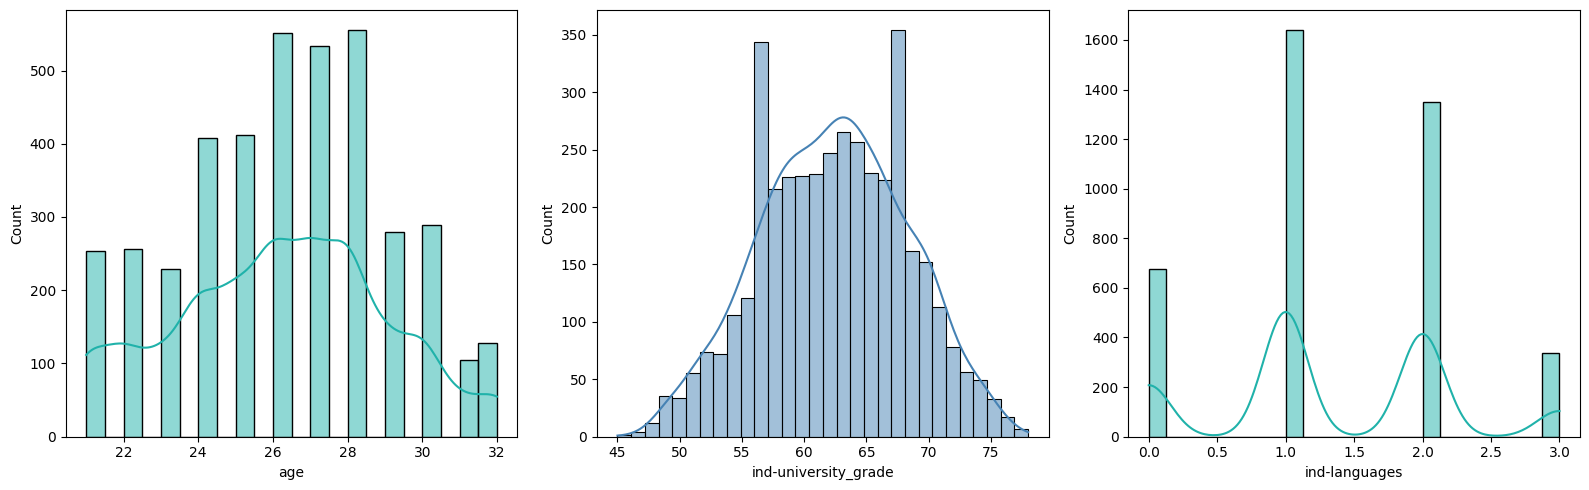

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.histplot(x=df1_encoded['age'], kde=True, color='lightseagreen', ax=axes[0])
sns.histplot(x=df1_encoded['ind-university_grade'], kde=True, color='steelblue', ax=axes[1])
sns.histplot(x=df1_encoded['ind-languages'], kde=True, color='lightseagreen', ax=axes[2])

plt.tight_layout()
plt.show()

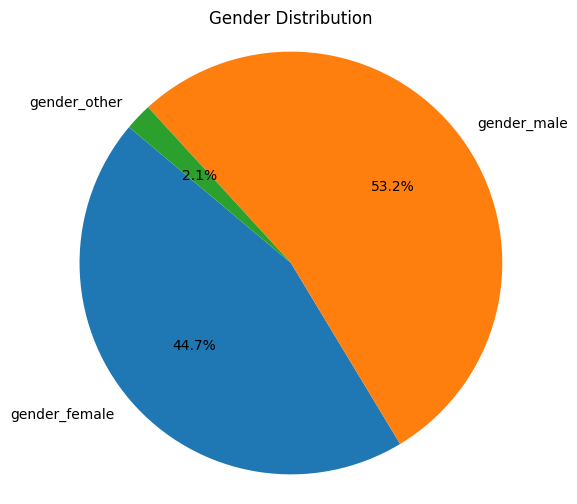

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setinden ilgili sütunları seçme
gender_distribution = df1_encoded[['gender_female', 'gender_male', 'gender_other']].sum()

# Pie chart oluşturma
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)

# Orta kısmın dairenin içine yerleştirilmesi
plt.axis('equal')

# Başlık ekleme
plt.title('Gender Distribution')

# Göster
plt.show()


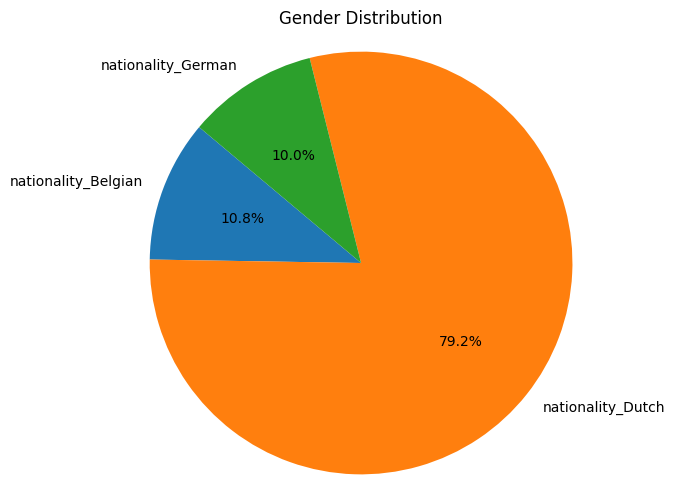

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setinden ilgili sütunları seçme
nationality_distribution = df1_encoded[['nationality_Belgian', 'nationality_Dutch', 'nationality_German']].sum()

# Pie chart oluşturma
plt.figure(figsize=(6, 6))
plt.pie(nationality_distribution, labels=nationality_distribution.index, autopct='%1.1f%%', startangle=140)

# Orta kısmın dairenin içine yerleştirilmesi
plt.axis('equal')

# Başlık ekleme
plt.title('Gender Distribution')

# Göster
plt.show()

# Fairness Analysis on the Dataset: Assessing Fairness using SVM Model

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from fairlearn.metrics import demographic_parity_ratio

In [86]:
X = df1_encoded.drop('decision', axis=1)
y = df1_encoded['decision']

In [87]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
sensitive_features = ['gender_female', 'gender_male', 'gender_other', 'nationality_Belgian', 'nationality_Dutch', 'nationality_German']

X_train_sensitive = X_train[sensitive_features]
X_val_sensitive = X_val[sensitive_features]
X_test_sensitive = X_test[sensitive_features]


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [89]:
scaler_sensitive = StandardScaler()
X_train_sensitive_scaled = scaler_sensitive.fit_transform(X_train_sensitive)
X_val_sensitive_scaled = scaler_sensitive.transform(X_val_sensitive)
X_test_sensitive_scaled = scaler_sensitive.transform(X_test_sensitive)

In [90]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [91]:
y_val_pred = svm_model.predict(X_val)

from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.705


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [92]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_val, y_val_pred,average='weighted')
print("Precision:", precision)

recall = recall_score(y_val, y_val_pred,average='weighted')
print("Recall:", recall)

f1 = f1_score(y_val, y_val_pred,average='weighted')
print("F1 Score:", f1)

tn, fp, fn, tp = conf_matrix.ravel()
recall = tp / (tp + fn)
print("Sensitivity (Recall):", recall)

specificity = tn / (tn + fp)
print("Specificity:", specificity)


Confusion Matrix:
[[423   0]
 [177   0]]
Precision: 0.49702499999999994
Recall: 0.705
F1 Score: 0.5830205278592375
Sensitivity (Recall): 0.0
Specificity: 1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = best_model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
print("Tuned SVM Model Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_val, y_pred,average='weighted')
print("Precision:", precision)

recall = recall_score(y_val, y_pred,average='weighted')
print("Recall:", recall)

f1 = f1_score(y_val, y_pred,average='weighted')
print("F1 Score:", f1)

tn, fp, fn, tp = conf_matrix.ravel()
recall = tp / (tp + fn)
print("Sensitivity (Recall):", recall)

specificity = tn / (tn + fp)
print("Specificity:", specificity)



Best Parameters: {'C': 10, 'class_weight': None, 'gamma': 0.01, 'kernel': 'rbf'}
Tuned SVM Model Accuracy: 0.8333333333333334
Confusion Matrix:
[[363  60]
 [ 40 137]]
Precision: 0.840177098159741
Recall: 0.8333333333333334
F1 Score: 0.8357719050640288
Sensitivity (Recall): 0.7740112994350282
Specificity: 0.8581560283687943


In [94]:
svm_demographic_parity = demographic_parity_ratio(y_val, y_pred, sensitive_features=X_val_sensitive)
print("SVM Model Demographic Parity Ratios:", svm_demographic_parity)

equalized_odds_svm = equalized_odds_difference(y_val, y_pred, sensitive_features=X_val_sensitive)
print("SVM Model Equalized Odds Difference:", equalized_odds_svm)


SVM Model Demographic Parity Ratios: 0.1


NameError: name 'equalized_odds_difference' is not defined

In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

demographic_parity_female = demographic_parity_ratio(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['gender_female'])
demographic_parity_male = demographic_parity_ratio(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['gender_male'])
demographic_parity_other = demographic_parity_ratio(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['gender_other'])

print("Demographic Parity Ratio (Gender Female):", demographic_parity_female)
print("Demographic Parity Ratio (Gender Male):", demographic_parity_male)
print("Demographic Parity Ratio (Gender Other):", demographic_parity_other)

equalized_odds_female = equalized_odds_difference(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['gender_female'])
equalized_odds_male = equalized_odds_difference(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['gender_male'])
equalized_odds_other = equalized_odds_difference(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['gender_other'])

print("Equalized Odds Difference (Gender Female):", equalized_odds_female)
print("Equalized Odds Difference (Gender Male):", equalized_odds_male)
print("Equalized Odds Difference (Gender Other):", equalized_odds_other)


Demographic Parity Ratio (Gender Female): 0.7256863162374974
Demographic Parity Ratio (Gender Male): 0.704
Demographic Parity Ratio (Gender Other): 0.5491841491841492
Equalized Odds Difference (Gender Female): 0.0986895986895987
Equalized Odds Difference (Gender Male): 0.10466988727858284
Equalized Odds Difference (Gender Other): 0.14457831325301204


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

demographic_parity_belgian = demographic_parity_ratio(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['nationality_Belgian'])
demographic_parity_dutch = demographic_parity_ratio(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['nationality_Dutch'])
demographic_parity_german = demographic_parity_ratio(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['nationality_German'])

print("Demographic Parity Ratio (Nationality Belgian):", demographic_parity_belgian)
print("Demographic Parity Ratio (Nationality Dutch):", demographic_parity_dutch)
print("Demographic Parity Ratio (Nationality German):", demographic_parity_german)

equalized_odds_belgian = equalized_odds_difference(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['nationality_Belgian'])
equalized_odds_dutch = equalized_odds_difference(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['nationality_Dutch'])
equalized_odds_german = equalized_odds_difference(y_true=y_val, y_pred=y_pred, sensitive_features=X_val_sensitive['nationality_German'])

print("Equalized Odds Difference (Nationality Belgian):", equalized_odds_belgian)
print("Equalized Odds Difference (Nationality Dutch):", equalized_odds_dutch)
print("Equalized Odds Difference (Nationality German):", equalized_odds_german)


Demographic Parity Ratio (Nationality Belgian): 0.7955801104972375
Demographic Parity Ratio (Nationality Dutch): 0.921678533555522
Demographic Parity Ratio (Nationality German): 0.7222099447513813
Equalized Odds Difference (Nationality Belgian): 0.1046119235095613
Equalized Odds Difference (Nationality Dutch): 0.006131549609810438
Equalized Odds Difference (Nationality German): 0.11821705426356588


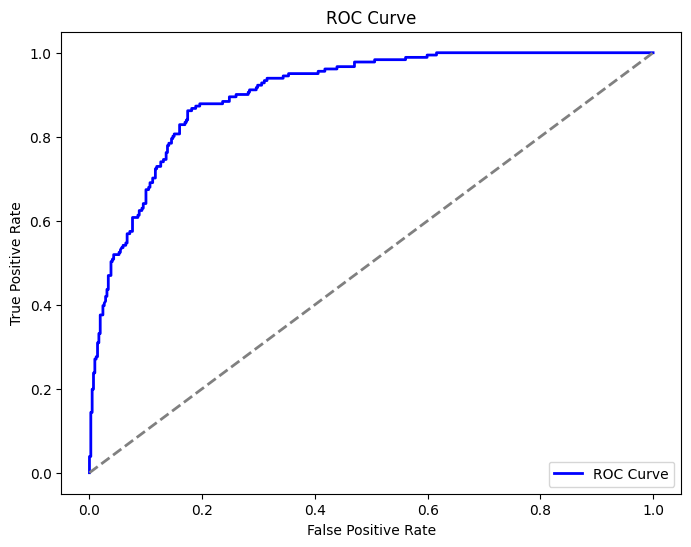

ROC AUC Score: 0.9050620393201387


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# SVM modelinizin tahminlerini alın
y_scores = svm_model.decision_function(X_test_scaled)

# ROC eğrisi için false positive oranı, true positive oranı ve eşik değerlerini alın
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# ROC eğrisini çizin
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# AUC değerini hesaplayın
auc_score = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", auc_score)


In [ ]:
y_test_pred = best_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_conf_matrix)

test_precision = precision_score(y_test, y_test_pred, average='weighted')
print("Test Precision:", test_precision)

test_recall = recall_score(y_test, y_test_pred, average='weighted')
print("Test Recall:", test_recall)

test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Test F1 Score:", test_f1)

tn, fp, fn, tp = conf_matrix.ravel()
test_recall = tp / (tp + fn)
print("Sensitivity (Recall):", recall)

test_specificity = tn / (tn + fp)
print("Specificity:", specificity)

Test Accuracy: 0.8416666666666667
Test Confusion Matrix:
[[377  42]
 [ 53 128]]
Test Precision: 0.8393969448244413
Test Recall: 0.8416666666666667
Test F1 Score: 0.8402113765482434
Sensitivity (Recall): 0.7740112994350282
Specificity: 0.8581560283687943


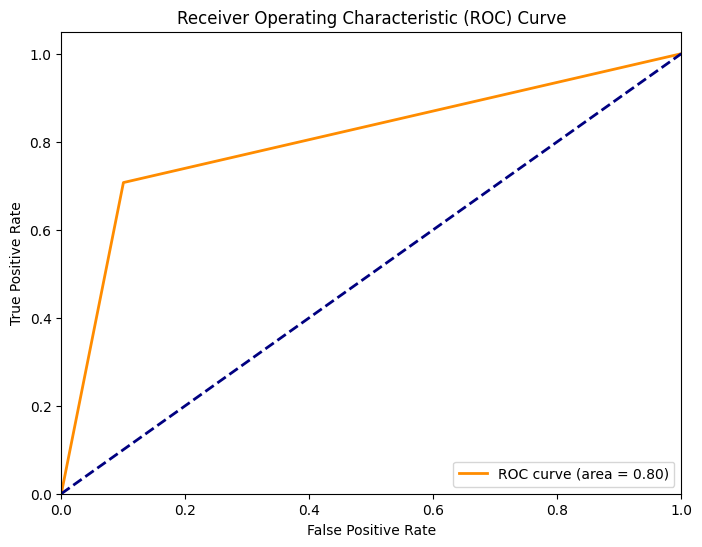

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


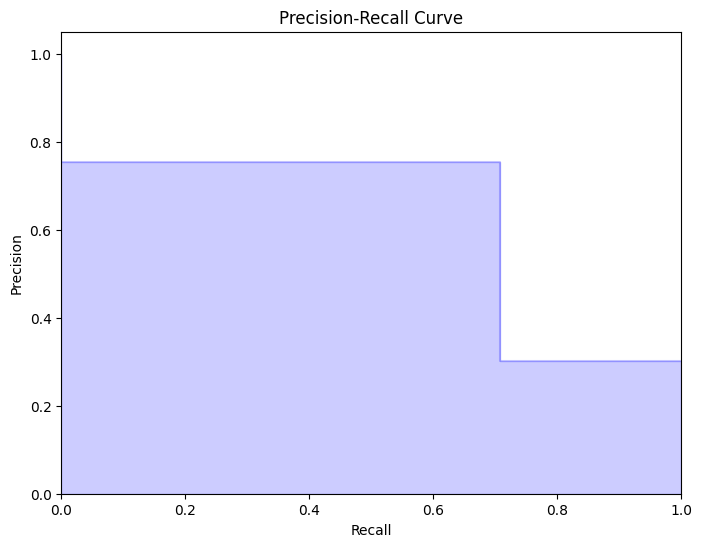

In [ ]:
from sklearn.metrics import precision_recall_curve

# Hassasiyet-duyarlılık eğrisini hesapla
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)

# Hassasiyet-duyarlılık eğrisini çiz
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
svm_demographic_parity_test = demographic_parity_ratio(y_test, y_test_pred, sensitive_features=X_test_sensitive)
print("SVM Model Demographic Parity Ratios (Test):", svm_demographic_parity_test)

equalized_odds_svm_test = equalized_odds_difference(y_test, y_test_pred, sensitive_features=X_test_sensitive)
print("SVM Model Equalized Odds Difference (Test):", equalized_odds_svm_test)


SVM Model Demographic Parity Ratios (Test): 0.13636363636363635
SVM Model Equalized Odds Difference (Test): 0.5


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

# Demografik Parite Oranı
demographic_parity_female_test = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['gender_female'])
demographic_parity_male_test = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['gender_male'])
demographic_parity_other_test = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['gender_other'])

print("Demographic Parity Ratio (Gender Female - Test):", demographic_parity_female_test)
print("Demographic Parity Ratio (Gender Male - Test):", demographic_parity_male_test)
print("Demographic Parity Ratio (Gender Other - Test):", demographic_parity_other_test)

# Eşitlenmiş Olasılık Farkı
equalized_odds_female_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['gender_female'])
equalized_odds_male_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['gender_male'])
equalized_odds_other_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['gender_other'])

print("Equalized Odds Difference (Gender Female - Test):", equalized_odds_female_test)
print("Equalized Odds Difference (Gender Male - Test):", equalized_odds_male_test)
print("Equalized Odds Difference (Gender Other - Test):", equalized_odds_other_test)


Demographic Parity Ratio (Gender Female - Test): 0.6726190476190476
Demographic Parity Ratio (Gender Male - Test): 0.6932767355881145
Demographic Parity Ratio (Gender Other - Test): 0.6571107363687465
Equalized Odds Difference (Gender Female - Test): 0.12713675213675213
Equalized Odds Difference (Gender Male - Test): 0.1114624505928854
Equalized Odds Difference (Gender Other - Test): 0.2960893854748603


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

# Demografik Parite Oranı
demographic_parity_belgian_test = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['nationality_Belgian'])
demographic_parity_dutch_test = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['nationality_Dutch'])
demographic_parity_german_test = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['nationality_German'])

print("Demographic Parity Ratio (Nationality Belgian - Test):", demographic_parity_belgian_test)
print("Demographic Parity Ratio (Nationality Dutch - Test):", demographic_parity_dutch_test)
print("Demographic Parity Ratio (Nationality German - Test):", demographic_parity_german_test)

# Eşitlenmiş Olasılık Farkı
equalized_odds_belgian_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['nationality_Belgian'])
equalized_odds_dutch_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['nationality_Dutch'])
equalized_odds_german_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred, sensitive_features=X_test_sensitive['nationality_German'])

print("Equalized Odds Difference (Nationality Belgian - Test):", equalized_odds_belgian_test)
print("Equalized Odds Difference (Nationality Dutch - Test):", equalized_odds_dutch_test)
print("Equalized Odds Difference (Nationality German - Test):", equalized_odds_german_test)


Demographic Parity Ratio (Nationality Belgian - Test): 0.9323728315201412
Demographic Parity Ratio (Nationality Dutch - Test): 0.9281877297144473
Demographic Parity Ratio (Nationality German - Test): 0.8128342245989304
Equalized Odds Difference (Nationality Belgian - Test): 0.10434782608695659
Equalized Odds Difference (Nationality Dutch - Test): 0.056906450523471805
Equalized Odds Difference (Nationality German - Test): 0.06497369023106842


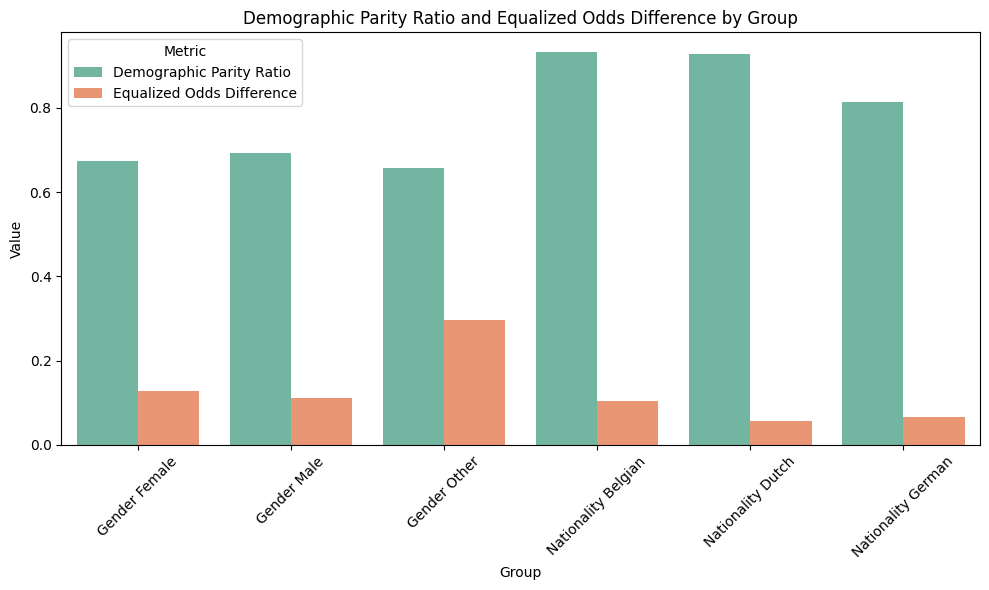

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sensitive_features = ['Gender Female', 'Gender Male', 'Gender Other', 'Nationality Belgian', 'Nationality Dutch', 'Nationality German']

demographic_parity_ratios = [demographic_parity_female_test, demographic_parity_male_test, demographic_parity_other_test,
                             demographic_parity_belgian_test, demographic_parity_dutch_test, demographic_parity_german_test]
equalized_odds_differences = [equalized_odds_female_test, equalized_odds_male_test, equalized_odds_other_test,
                              equalized_odds_belgian_test, equalized_odds_dutch_test, equalized_odds_german_test]

import pandas as pd
df = pd.DataFrame({
    'Group': sensitive_features * 2,
    'Metric': ['Demographic Parity Ratio'] * len(sensitive_features) + ['Equalized Odds Difference'] * len(sensitive_features),
    'Value': demographic_parity_ratios + equalized_odds_differences
})

# Seaborn ile çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Group', y='Value', hue='Metric', palette='Set2')
plt.xticks(rotation=45)
plt.title('Demographic Parity Ratio and Equalized Odds Difference by Group')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
import pprint

# GridSearchCV sonuçlarını yazdır
cv_results = grid_search.cv_results_
pprint.pprint(cv_results.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_class_weight', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


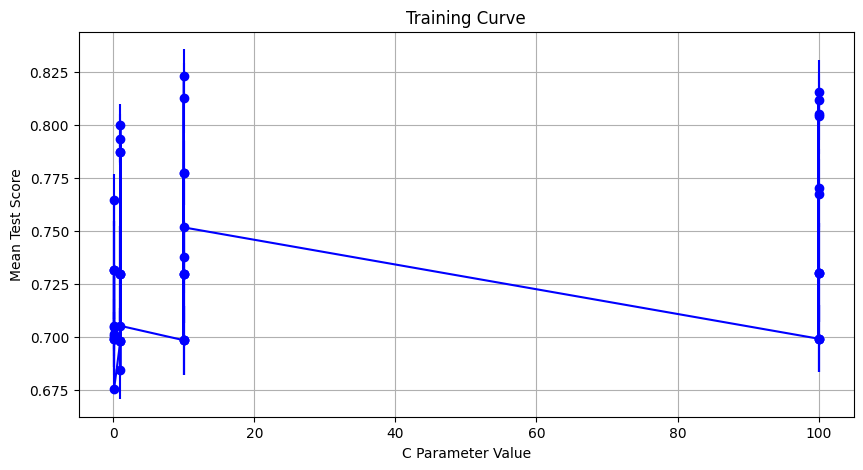

In [ ]:
import matplotlib.pyplot as plt

def plot_training_curve(cv_results):
    # Hiperparametre değerleri
    param_C_values = cv_results['param_C']
    mean_test_scores = cv_results['mean_test_score']
    std_test_scores = cv_results['std_test_score']

    # Eğitim eğrisi grafiği
    plt.figure(figsize=(10, 5))
    plt.errorbar(param_C_values, mean_test_scores, yerr=std_test_scores, fmt='o-', color='b')
    plt.title('Training Curve')
    plt.xlabel('C Parameter Value')
    plt.ylabel('Mean Test Score')
    plt.grid(True)
    plt.show()

plot_training_curve(cv_results)


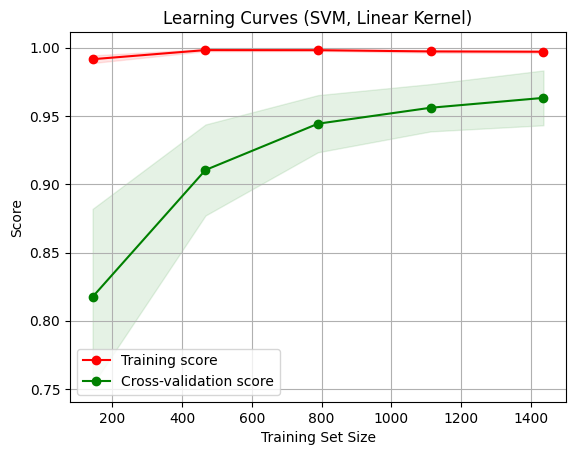

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Load the digits dataset
digits = load_digits()

train_sizes, train_scores, test_scores = learning_curve(
    svm_model, digits.data, digits.target, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of cross-validation scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curves (SVM, Linear Kernel)")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, "o-", color="r", label="Training score")

# Plot the cross-validation scores
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_mean, "o-", color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Fairness Analysis on the Dataset: Assessing Fairness using Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_base_model = RandomForestClassifier(random_state=42)
rf_base_model.fit(X_train_scaled, y_train)
y_pred_rf_base = rf_base_model.predict(X_val_scaled)

accuracy_rf_base = accuracy_score(y_val, y_pred_rf_base)
print("Random Forest Model Accuracy (Base):", accuracy_rf_base)

conf_matrix = confusion_matrix(y_val, y_pred_rf_base)
print("Confusion Matrix:")
print(conf_matrix)

tn, fp, fn, tp = conf_matrix.ravel()
recall = tp / (tp + fn)
print("Sensitivity (Recall):", recall)

specificity = tn / (tn + fp)
print("Specificity:", specificity)

classification_rep_rf_base = classification_report(y_val, y_pred_rf_base)
print("Classification Report for Random Forest Model (Base):")
print(classification_rep_rf_base)


Random Forest Model Accuracy (Base): 0.865
Confusion Matrix:
[[383  40]
 [ 41 136]]
Sensitivity (Recall): 0.768361581920904
Specificity: 0.9054373522458629
Classification Report for Random Forest Model (Base):
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       423
           1       0.77      0.77      0.77       177

    accuracy                           0.86       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.86      0.86      0.86       600



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [5, 10],
    'class_weight': ['balanced', None],
    'bootstrap': [True],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 4],
    'max_leaf_nodes': [None, 10],
    'criterion': ['entropy']
}


grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

y_pred_rf_tuned = best_model_rf.predict(X_val)

accuracy_rf_tuned = accuracy_score(y_val, y_pred_rf_tuned)
print("Tuned Random Forest Model Accuracy:", accuracy_rf_tuned)

classification_rep_rf_tuned = classification_report(y_val, y_pred_rf_tuned)
print("Classification Report for Tuned Random Forest Model:")
print(classification_rep_rf_tuned)


Best Parameters for Random Forest: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Model Accuracy: 0.8733333333333333
Classification Report for Tuned Random Forest Model:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       423
           1       0.74      0.88      0.80       177

    accuracy                           0.87       600
   macro avg       0.84      0.87      0.85       600
weighted avg       0.88      0.87      0.88       600



In [ ]:
demographic_parity_rf = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive)
equalized_odds_rf = equalized_odds_difference(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive)

print("Random Forest Model Demographic Parity Ratios:", demographic_parity_rf)
print("Random Forest Model Equalized Odds Difference:", equalized_odds_rf)

Random Forest Model Demographic Parity Ratios: 0.1
Random Forest Model Equalized Odds Difference: 0.5


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

demographic_parity_female_rf = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['gender_female'])
demographic_parity_male_rf = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['gender_male'])
demographic_parity_other_rf = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['gender_other'])

print("Demographic Parity Ratio (Gender Female):", demographic_parity_female_rf)
print("Demographic Parity Ratio (Gender Male):", demographic_parity_male_rf)
print("Demographic Parity Ratio (Gender Other):", demographic_parity_other_rf)

# Eşitlenmiş Olasılık Farkı
equalized_odds_female_rf = equalized_odds_difference(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['gender_female'])
equalized_odds_male_rf = equalized_odds_difference(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['gender_male'])
equalized_odds_other_rf = equalized_odds_difference(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['gender_other'])

print("Equalized Odds Difference (Gender Female):", equalized_odds_female_rf)
print("Equalized Odds Difference (Gender Male):", equalized_odds_male_rf)
print("Equalized Odds Difference (Gender Other):", equalized_odds_other_rf)

Demographic Parity Ratio (Gender Female): 0.6983716635890549
Demographic Parity Ratio (Gender Male): 0.6814159292035399
Demographic Parity Ratio (Gender Other): 0.6154649947753396
Equalized Odds Difference (Gender Female): 0.08968058968058967
Equalized Odds Difference (Gender Male): 0.09541062801932365
Equalized Odds Difference (Gender Other): 0.10344827586206895


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

# Demografik Parite Oranı
demographic_parity_belgian_rf = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['nationality_Belgian'])
demographic_parity_dutch_rf = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['nationality_Dutch'])
demographic_parity_german_rf = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['nationality_German'])

print("Demographic Parity Ratio (Nationality Belgian):", demographic_parity_belgian_rf)
print("Demographic Parity Ratio (Nationality Dutch):", demographic_parity_dutch_rf)
print("Demographic Parity Ratio (Nationality German):", demographic_parity_german_rf)

# Eşitlenmiş Olasılık Farkı
equalized_odds_belgian_rf = equalized_odds_difference(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['nationality_Belgian'])
equalized_odds_dutch_rf = equalized_odds_difference(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['nationality_Dutch'])
equalized_odds_german_rf = equalized_odds_difference(y_true=y_val, y_pred=y_pred_rf_base, sensitive_features=X_val_sensitive['nationality_German'])

print("Equalized Odds Difference (Nationality Belgian):", equalized_odds_belgian_rf)
print("Equalized Odds Difference (Nationality Dutch):", equalized_odds_dutch_rf)
print("Equalized Odds Difference (Nationality German):", equalized_odds_german_rf)

Demographic Parity Ratio (Nationality Belgian): 0.8385093167701863
Demographic Parity Ratio (Nationality Dutch): 0.9420289855072463
Demographic Parity Ratio (Nationality German): 0.774796106287819
Equalized Odds Difference (Nationality Belgian): 0.07855268091488564
Equalized Odds Difference (Nationality Dutch): 0.021627647714604237
Equalized Odds Difference (Nationality German): 0.04844961240310078


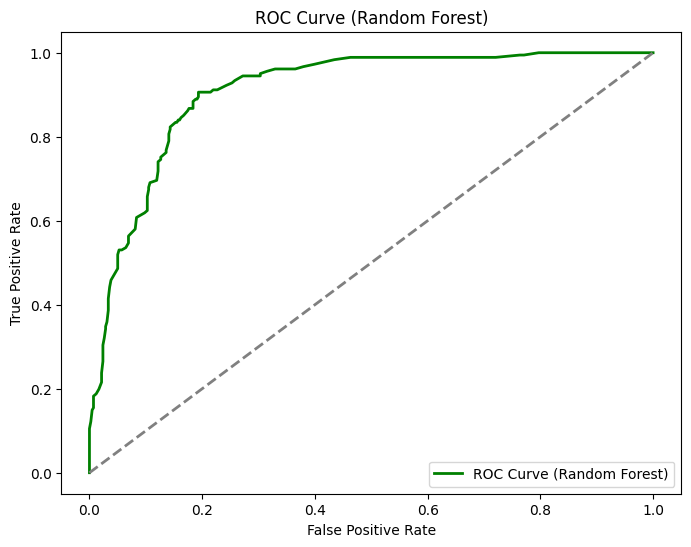

Random Forest ROC AUC Score: 0.9084507970832949


In [ ]:
# Random Forest modelinizin tahminlerini alın
y_scores_rf = rf_base_model.predict_proba(X_test_scaled)[:, 1]

# ROC eğrisi için false positive oranı, true positive oranı ve eşik değerlerini alın
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)

# ROC eğrisini çizin
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC Curve (Random Forest)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# AUC değerini hesaplayın
auc_score_rf = roc_auc_score(y_test, y_scores_rf)
print("Random Forest ROC AUC Score:", auc_score_rf)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test seti üzerinde tahmin yapma
y_test_pred_rf = best_model_rf.predict(X_test_scaled)

# Test seti üzerinde doğruluk hesaplama
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Test seti üzerinde confusion matrix hesaplama
test_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Test Confusion Matrix (Random Forest):")
print(test_conf_matrix_rf)

# Test seti üzerinde precision hesaplama
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
print("Test Precision (Random Forest):", test_precision_rf)

# Test seti üzerinde recall hesaplama
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
print("Test Recall (Random Forest):", test_recall_rf)

# Test seti üzerinde F1 score hesaplama
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')
print("Test F1 Score (Random Forest):", test_f1_rf)

# Test seti üzerinde sensitivity (recall) ve specificity hesaplama
tn_rf, fp_rf, fn_rf, tp_rf = test_conf_matrix_rf.ravel()
test_recall_rf = tp_rf / (tp_rf + fn_rf)
print("Sensitivity (Recall) (Random Forest):", test_recall_rf)

test_specificity_rf = tn_rf / (tn_rf + fp_rf)
print("Specificity (Random Forest):", test_specificity_rf)


Test Accuracy (Random Forest): 0.735
Test Confusion Matrix (Random Forest):
[[413   6]
 [153  28]]
Test Precision (Random Forest): 0.7579926210766992
Test Recall (Random Forest): 0.735
Test F1 Score (Random Forest): 0.664181088419313
Sensitivity (Recall) (Random Forest): 0.15469613259668508
Specificity (Random Forest): 0.9856801909307876


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


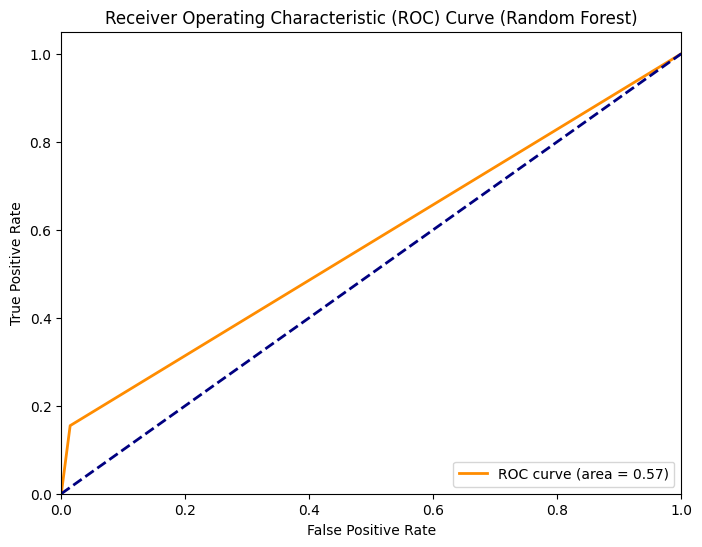

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC eğrisini hesapla
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()


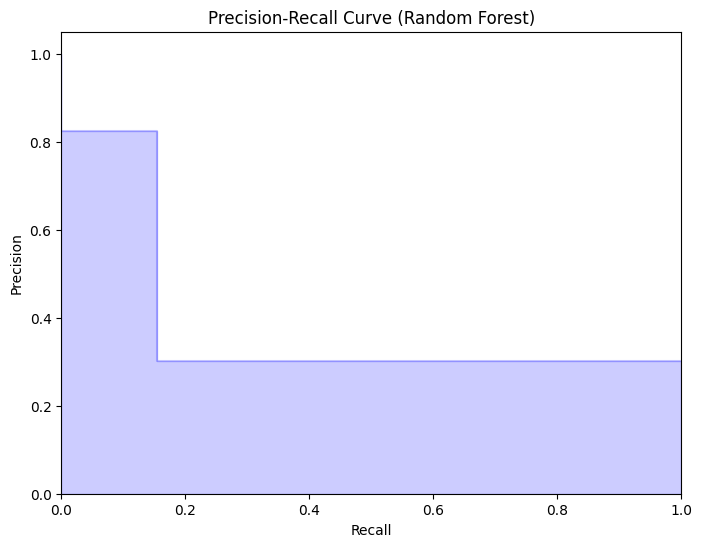

In [ ]:
from sklearn.metrics import precision_recall_curve

# Hassasiyet-duyarlılık eğrisini hesapla
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_pred_rf)

# Hassasiyet-duyarlılık eğrisini çiz
plt.figure(figsize=(8, 6))
plt.step(recall_rf, precision_rf, color='b', alpha=0.2, where='post')
plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (Random Forest)')
plt.show()


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

# Demografik Parite Oranı (Test)
demographic_parity_test_rf = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive)
print("Random Forest Model Demographic Parity Ratios (Test):", demographic_parity_test_rf)

# Eşitlenmiş Olasılık Farkı (Test)
equalized_odds_rf_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive)
print("Random Forest Model Equalized Odds Difference (Test):", equalized_odds_rf_test)

# Demografik Parite Oranı - Gender (Test)
demographic_parity_female_test_rf = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['gender_female'])
demographic_parity_male_test_rf = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['gender_male'])
demographic_parity_other_test_rf = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['gender_other'])

print("Demographic Parity Ratio (Gender Female - Test - Random Forest):", demographic_parity_female_test_rf)
print("Demographic Parity Ratio (Gender Male - Test - Random Forest):", demographic_parity_male_test_rf)
print("Demographic Parity Ratio (Gender Other - Test - Random Forest):", demographic_parity_other_test_rf)

# Eşitlenmiş Olasılık Farkı - Gender (Test)
equalized_odds_female_test_rf = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['gender_female'])
equalized_odds_male_test_rf = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['gender_male'])
equalized_odds_other_test_rf = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['gender_other'])

print("Equalized Odds Difference (Gender Female - Test - Random Forest):", equalized_odds_female_test_rf)
print("Equalized Odds Difference (Gender Male - Test - Random Forest):", equalized_odds_male_test_rf)
print("Equalized Odds Difference (Gender Other - Test - Random Forest):", equalized_odds_other_test_rf)

# Demografik Parite Oranı - Nationality (Test)
demographic_parity_belgian_test_rf = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['nationality_Belgian'])
demographic_parity_dutch_test_rf = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['nationality_Dutch'])
demographic_parity_german_test_rf = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['nationality_German'])

print("Demographic Parity Ratio (Nationality Belgian - Test - Random Forest):", demographic_parity_belgian_test_rf)
print("Demographic Parity Ratio (Nationality Dutch - Test - Random Forest):", demographic_parity_dutch_test_rf)
print("Demographic Parity Ratio (Nationality German - Test - Random Forest):", demographic_parity_german_test_rf)

# Eşitlenmiş Olasılık Farkı - Nationality (Test)
equalized_odds_belgian_test_rf = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['nationality_Belgian'])
equalized_odds_dutch_test_rf = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['nationality_Dutch'])
equalized_odds_german_test_rf = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_rf, sensitive_features=X_test_sensitive['nationality_German'])

print("Equalized Odds Difference (Nationality Belgian - Test - Random Forest):", equalized_odds_belgian_test_rf)
print("Equalized Odds Difference (Nationality Dutch - Test - Random Forest):", equalized_odds_dutch_test_rf)
print("Equalized Odds Difference (Nationality German - Test - Random Forest):", equalized_odds_german_test_rf)


Random Forest Model Demographic Parity Ratios (Test): 0.0
Random Forest Model Equalized Odds Difference (Test): 1.0
Demographic Parity Ratio (Gender Female - Test - Random Forest): 0.27832512315270935
Demographic Parity Ratio (Gender Male - Test - Random Forest): 0.32117191818684354
Demographic Parity Ratio (Gender Other - Test - Random Forest): 0.3895446880269815
Equalized Odds Difference (Gender Female - Test - Random Forest): 0.11845619658119658
Equalized Odds Difference (Gender Male - Test - Random Forest): 0.10039525691699605
Equalized Odds Difference (Gender Other - Test - Random Forest): 0.34916201117318435
Demographic Parity Ratio (Nationality Belgian - Test - Random Forest): 0.6804469273743017
Demographic Parity Ratio (Nationality Dutch - Test - Random Forest): 0.670362473347548
Demographic Parity Ratio (Nationality German - Test - Random Forest): 0.7413533834586465
Equalized Odds Difference (Nationality Belgian - Test - Random Forest): 0.05093167701863355
Equalized Odds Diffe

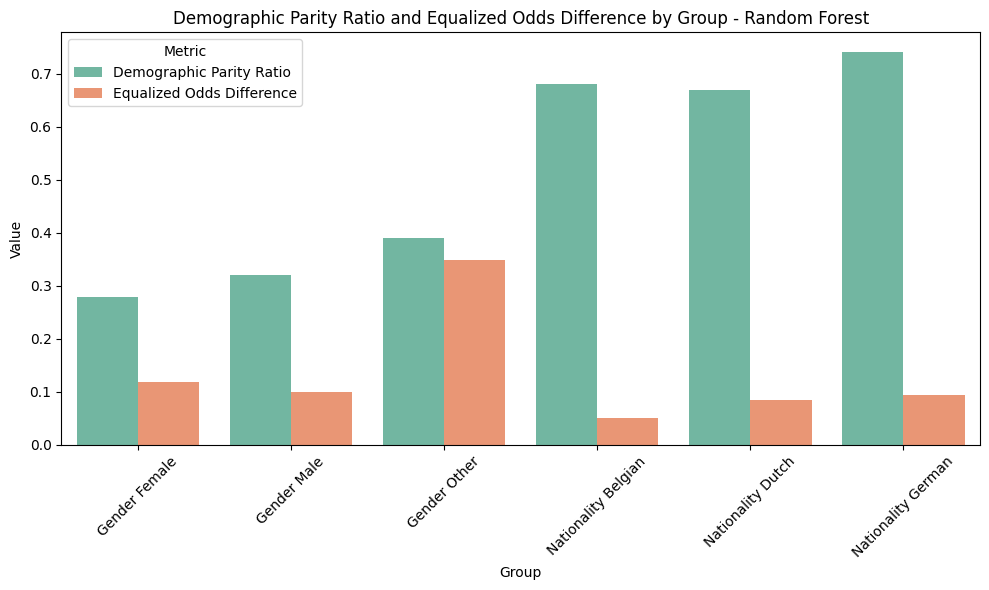

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sensitive_features = ['Gender Female', 'Gender Male', 'Gender Other', 'Nationality Belgian', 'Nationality Dutch', 'Nationality German']

demographic_parity_ratios_rf = [demographic_parity_female_test_rf, demographic_parity_male_test_rf, demographic_parity_other_test_rf,
                             demographic_parity_belgian_test_rf, demographic_parity_dutch_test_rf, demographic_parity_german_test_rf]
equalized_odds_differences_rf = [equalized_odds_female_test_rf, equalized_odds_male_test_rf, equalized_odds_other_test_rf,
                              equalized_odds_belgian_test_rf, equalized_odds_dutch_test_rf, equalized_odds_german_test_rf]

import pandas as pd
df_rf = pd.DataFrame({
    'Group': sensitive_features * 2,
    'Metric': ['Demographic Parity Ratio'] * len(sensitive_features) + ['Equalized Odds Difference'] * len(sensitive_features),
    'Value': demographic_parity_ratios_rf + equalized_odds_differences_rf
})

# Seaborn ile çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(data=df_rf, x='Group', y='Value', hue='Metric', palette='Set2')
plt.xticks(rotation=45)
plt.title('Demographic Parity Ratio and Equalized Odds Difference by Group - Random Forest')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [ ]:
import pprint

cv_results_rf = grid_search_rf.cv_results_
params = cv_results['params']
pprint.pprint(list(params[0].keys()))


['C', 'class_weight', 'gamma', 'kernel']


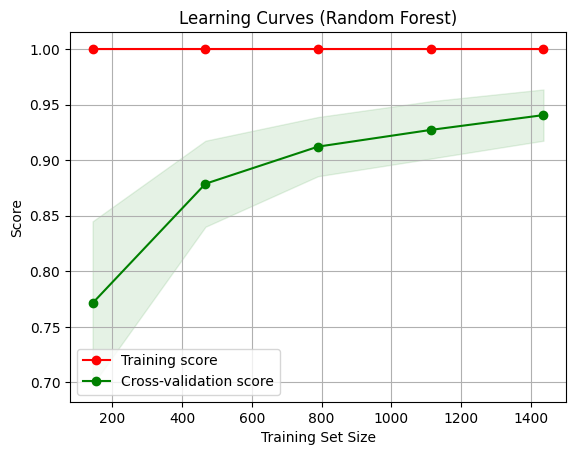

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Load the digits dataset
digits_rf = load_digits()


# Learning curve hesaplama
train_sizes, train_scores, test_scores = learning_curve(
    rf_base_model, digits_rf.data, digits_rf.target, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

# Eğitim seti skorlarının ortalaması ve standart sapması
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Doğrulama seti skorlarının ortalaması ve standart sapması
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Öğrenme eğrisini çizme
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

# Eğitim skorlarını çizme
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, "o-", color="r", label="Training score")

# Doğrulama skorlarını çizme
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_mean, "o-", color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


# Fairness Analysis on the Dataset: Assessing Fairness using MLP Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, batch_size=32, epochs=10):
        self.model = model
        self.batch_size = batch_size
        self.epochs = epochs
    
    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

mlp_base_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation=LeakyReLU()),  # LeakyReLU aktivasyonu kullanıldı
    Dropout(0.5),  # Dropout katmanı eklendi
    Dense(128, activation=LeakyReLU()),  # 128 nöronlu bir gizli katman eklendi
    Dropout(0.5),  # Dropout katmanı eklendi
    Dense(64, activation=LeakyReLU()),  # LeakyReLU aktivasyonu kullanıldı
    Dense(1, activation='sigmoid')
])

mlp_base_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

mlp_base_model_wrapper = KerasClassifierWrapper(mlp_base_model)

param_grid_mlp = {
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

grid_search_mlp = GridSearchCV(mlp_base_model_wrapper, param_grid_mlp, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train_scaled, y_train)

best_model_mlp = grid_search_mlp.best_estimator_
best_params_mlp = grid_search_mlp.best_params_
print("Best Parameters for MLP:", best_params_mlp)

y_pred_mlp_tuned = best_model_mlp.predict(X_val_scaled)

accuracy_mlp_tuned = accuracy_score(y_val, y_pred_mlp_tuned)
print("MLP Model Accuracy (Tuned):", accuracy_mlp_tuned)

classification_rep_mlp_tuned = classification_report(y_val, y_pred_mlp_tuned)
print("Classification Report for MLP Model (Tuned):")
print(classification_rep_mlp_tuned)


18/18 [==============================] - 0s 2ms/step


18/18 [==============================] - 0s 2ms/step


18/18 [==============================] - 0s 727us/step


18/18 [==============================] - 0s 458us/step
Best Parameters for MLP: {'batch_size': 64, 'epochs': 10}
19/19 [==============================] - 0s 521us/step
MLP Model Accuracy (Tuned): 0.8533333333333334
Classification Report for MLP Model (Tuned):
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       423
           1       0.73      0.79      0.76       177

    accuracy                           0.85       600
   macro avg       0.82      0.84      0.83       600
weighted avg       0.86      0.85      0.85       600



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

# Aktivasyon fonksiyonlarını tanımlama
activation_functions = ['relu', 'sigmoid', 'tanh', LeakyReLU()]

# En iyi aktivasyon fonksiyonunu saklayacak değişkenler
best_activation_function = None
best_accuracy = 0.0

# Her bir aktivasyon fonksiyonunu deneme
for activation_function in activation_functions:
    # Modelin tanımlanması
    mlp_base_model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation=activation_function),  
        Dropout(0.5),  
        Dense(128, activation=activation_function),  
        Dropout(0.5),  
        Dense(64, activation=activation_function),  
        Dense(1, activation='sigmoid')
    ])

    # Modelin derlenmesi
    mlp_base_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    # Modelin eğitilmesi
    mlp_base_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

    # Modelin değerlendirilmesi
    y_pred = (mlp_base_model.predict(X_val_scaled) > 0.5).astype("int32")
    accuracy = accuracy_score(y_val, y_pred)
    
    # En iyi sonucu saklama
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_activation_function = activation_function

print("Best Activation Function:", best_activation_function)
print("Best Accuracy:", best_accuracy)


19/19 [==============================] - 0s 805us/step


19/19 [==============================] - 0s 462us/step


19/19 [==============================] - 0s 503us/step


19/19 [==============================] - 0s 452us/step
Best Activation Function: relu
Best Accuracy: 0.8566666666666667


In [ ]:
print("Best Parameters for MLP:", best_params_mlp)

Best Parameters for MLP: {'batch_size': 64, 'epochs': 10}


In [ ]:
conf_matrix_mlp_tuned = confusion_matrix(y_val, y_pred_mlp_tuned)
print("Confusion Matrix for MLP Model (Tuned):")
print(conf_matrix_mlp_tuned)

tn_mlp, fp_mlp, fn_mlp, tp_mlp = conf_matrix_mlp_tuned.ravel()
recall_mlp = tp_mlp / (tp_mlp + fn_mlp)
print("Sensitivity (Recall) for MLP Model (Tuned):", recall_mlp)

specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
print("Specificity for MLP Model (Tuned):", specificity_mlp)

Confusion Matrix for MLP Model (Tuned):
[[372  51]
 [ 37 140]]
Sensitivity (Recall) for MLP Model (Tuned): 0.7909604519774012
Specificity for MLP Model (Tuned): 0.8794326241134752


In [ ]:
from fairlearn.metrics import demographic_parity_ratio

def calculate_demographic_parity(model, X, y, sensitive_features):
    # Modelin tahminlerini yap
    y_pred = model.predict(X)
    
    # Hassas niteliklere göre demografik pariteyi hesapla
    demographic_parity_ratios = {}
    for feature in sensitive_features:
        ratio = demographic_parity_ratio(y_true=y, y_pred=y_pred, sensitive_features=X[feature])
        demographic_parity_ratios[feature] = ratio
    
    return demographic_parity_ratios


In [ ]:
y_pred_mlp_base = mlp_base_model.predict(X_val_scaled)

19/19 [==============================] - 0s 514us/step


In [ ]:
X_val_sensitive_binary = X_val_sensitive.copy()
X_val_sensitive_binary['gender_female'] = (X_val_sensitive_binary['gender_female'] == 1).astype(int)
X_val_sensitive_binary['gender_male'] = (X_val_sensitive_binary['gender_male'] == 1).astype(int)
X_val_sensitive_binary['gender_other'] = (X_val_sensitive_binary['gender_other'] == 1).astype(int)

demographic_parity_female_mlp = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['gender_female'])
demographic_parity_male_mlp = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['gender_male'])
demographic_parity_other_mlp = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['gender_other'])

print("Demographic Parity Ratio (Gender Female):", demographic_parity_female_mlp)
print("Demographic Parity Ratio (Gender Male):", demographic_parity_male_mlp)
print("Demographic Parity Ratio (Gender Other):", demographic_parity_other_mlp)

Demographic Parity Ratio (Gender Female): 0.7616707616707616
Demographic Parity Ratio (Gender Male): 0.7394957983193278
Demographic Parity Ratio (Gender Other): 0.5666185666185667


In [ ]:
X_val_sensitive_binary = X_val_sensitive.copy()
X_val_sensitive_binary['gender_female'] = (X_val_sensitive_binary['gender_female'] == 1).astype(int)
X_val_sensitive_binary['gender_male'] = (X_val_sensitive_binary['gender_male'] == 1).astype(int)
X_val_sensitive_binary['gender_other'] = (X_val_sensitive_binary['gender_other'] == 1).astype(int)

demographic_parity_belgian_mlp = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['nationality_Belgian'])
demographic_parity_dutch_mlp = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['nationality_Dutch'])
demographic_parity_german_mlp = demographic_parity_ratio(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['nationality_German'])

print("Demographic Parity Ratio (Nationality Belgian):", demographic_parity_belgian_mlp)
print("Demographic Parity Ratio (Nationality Dutch):", demographic_parity_dutch_mlp)
print("Demographic Parity Ratio (Nationality German):", demographic_parity_german_mlp)


Demographic Parity Ratio (Nationality Belgian): 0.9941860465116278
Demographic Parity Ratio (Nationality Dutch): 0.8337425971399681
Demographic Parity Ratio (Nationality German): 0.7304327808471455


In [ ]:
X_val_sensitive_binary = X_val_sensitive.copy()
X_val_sensitive_binary['gender_female'] = (X_val_sensitive_binary['gender_female'] == 1).astype(int)
X_val_sensitive_binary['gender_male'] = (X_val_sensitive_binary['gender_male'] == 1).astype(int)
X_val_sensitive_binary['gender_other'] = (X_val_sensitive_binary['gender_other'] == 1).astype(int)

equalized_odds_female_mlp = equalized_odds_difference(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['gender_female'])
equalized_odds_male_mlp = equalized_odds_difference(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['gender_male'])
equalized_odds_other_mlp = equalized_odds_difference(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['gender_other'])

print("Equalized Odds Difference (Gender Female):", equalized_odds_female_mlp)
print("Equalized Odds Difference (Gender Male):", equalized_odds_male_mlp)
print("Equalized Odds Difference (Gender Other):", equalized_odds_other_mlp)


Equalized Odds Difference (Gender Female): 0.040684838927686415
Equalized Odds Difference (Gender Male): 0.04961678096006454
Equalized Odds Difference (Gender Other): 0.12643678160919547


In [ ]:
X_val_sensitive_binary = X_val_sensitive.copy()
X_val_sensitive_binary['nationality_Belgian'] = (X_val_sensitive_binary['nationality_Belgian'] == 1).astype(int)
X_val_sensitive_binary['nationality_Dutch'] = (X_val_sensitive_binary['nationality_Dutch'] == 1).astype(int)
X_val_sensitive_binary['nationality_German'] = (X_val_sensitive_binary['nationality_German'] == 1).astype(int)

equalized_odds_Belgian_mlp = equalized_odds_difference(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['nationality_Belgian'])
equalized_odds_Dutch_mlp = equalized_odds_difference(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['nationality_Dutch'])
equalized_odds_German_mlp = equalized_odds_difference(y_true=y_val, y_pred=y_pred_mlp_tuned, sensitive_features=X_val_sensitive_binary['gender_other'])

print("Equalized Odds Difference (Belgian):", equalized_odds_Belgian_mlp)
print("Equalized Odds Difference (Dutch):", equalized_odds_Dutch_mlp)
print("Equalized Odds Difference (German):", equalized_odds_German_mlp)

Equalized Odds Difference (Belgian): 0.170859538784067
Equalized Odds Difference (Dutch): 0.04080267558528429
Equalized Odds Difference (German): 0.12643678160919547


19/19 [==============================] - 0s 508us/step


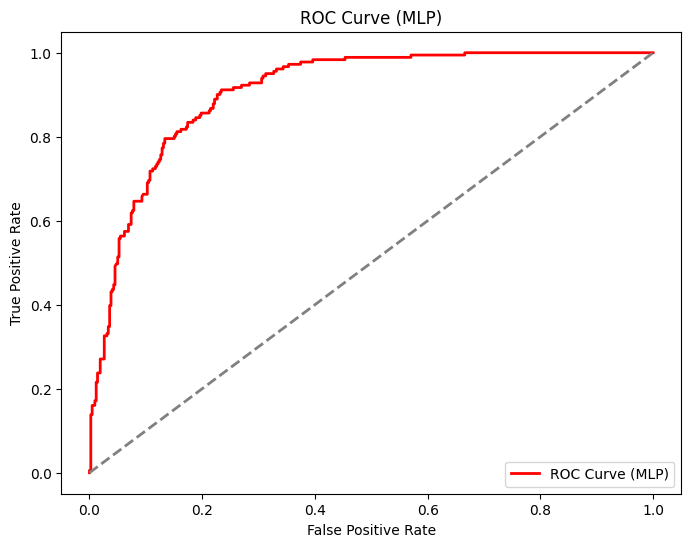

MLP ROC AUC Score: 0.9080288505913844


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# MLP modelinizin sınıf tahminlerini alın
y_pred_mlp = mlp_base_model.predict(X_test_scaled)

# Sınıf tahminlerini olasılık değerlerine dönüştürün
y_scores_mlp = y_pred_mlp

# ROC eğrisi için false positive oranı, true positive oranı ve eşik değerlerini alın
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_scores_mlp)

# ROC eğrisini çizin
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label='ROC Curve (MLP)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (MLP)')
plt.legend(loc='lower right')
plt.show()

# AUC değerini hesaplayın
auc_score_mlp = roc_auc_score(y_test, y_scores_mlp)
print("MLP ROC AUC Score:", auc_score_mlp)



In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(mlp_base_model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
print(mlp_base_model.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 64)                1920      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 128)               8320      
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18561 (72.50 KB)
Trainable params: 1856

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test seti üzerinde tahmin yapma
y_test_pred_mlp = best_model_mlp.predict(X_test_scaled)

# Test seti üzerinde doğruluk hesaplama
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
print("Test Accuracy (MLP):", test_accuracy_mlp)

# Test seti üzerinde confusion matrix hesaplama
test_conf_matrix_mlp = confusion_matrix(y_test, y_test_pred_mlp)
print("Test Confusion Matrix (MLP):")
print(test_conf_matrix_mlp)

# Test seti üzerinde precision hesaplama
test_precision_mlp = precision_score(y_test, y_test_pred_mlp, average='weighted')
print("Test Precision (MLP):", test_precision_mlp)

# Test seti üzerinde recall hesaplama
test_recall_mlp = recall_score(y_test, y_test_pred_mlp, average='weighted')
print("Test Recall (MLP):", test_recall_mlp)

# Test seti üzerinde F1 score hesaplama
test_f1_mlp = f1_score(y_test, y_test_pred_mlp, average='weighted')
print("Test F1 Score (MLP):", test_f1_mlp)

# Test seti üzerinde sensitivity (recall) ve specificity hesaplama
tn_mlp, fp_mlp, fn_mlp, tp_mlp = test_conf_matrix_mlp.ravel()
test_recall_mlp = tp_mlp / (tp_mlp + fn_mlp)
print("Sensitivity (Recall) (MLP):", test_recall_mlp)

test_specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)
print("Specificity (MLP):", test_specificity_mlp)


19/19 [==============================] - 0s 3ms/step
Test Accuracy (MLP): 0.8416666666666667
Test Confusion Matrix (MLP):
[[365  54]
 [ 41 140]]
Test Precision (MLP): 0.8455095813654291
Test Recall (MLP): 0.8416666666666667
Test F1 Score (MLP): 0.8431636363636363
Sensitivity (Recall) (MLP): 0.7734806629834254
Specificity (MLP): 0.8711217183770883


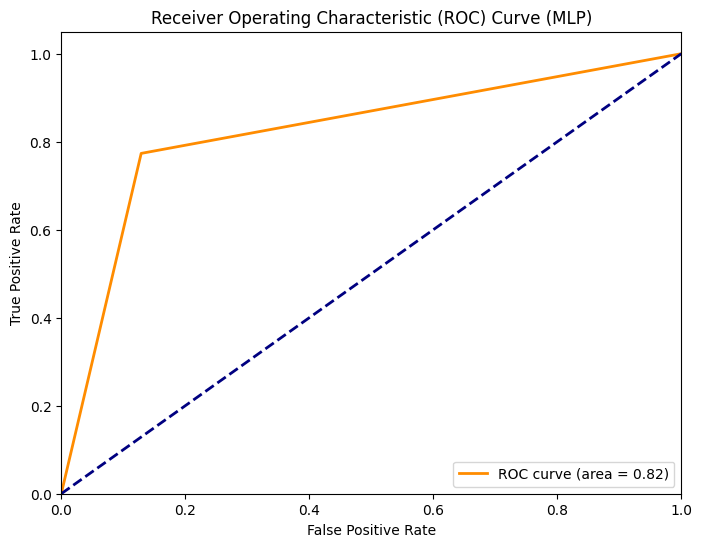

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC eğrisini hesapla
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_test_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (MLP)')
plt.legend(loc="lower right")
plt.show()


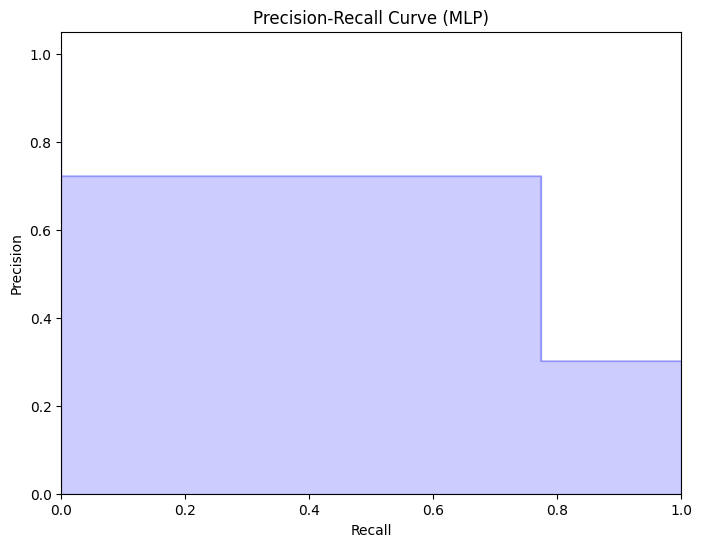

In [ ]:
from sklearn.metrics import precision_recall_curve

# Hassasiyet-duyarlılık eğrisini hesapla
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_test_pred_mlp)

# Hassasiyet-duyarlılık eğrisini çiz
plt.figure(figsize=(8, 6))
plt.step(recall_mlp, precision_mlp, color='b', alpha=0.2, where='post')
plt.fill_between(recall_mlp, precision_mlp, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (MLP)')
plt.show()


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_difference

# Demografik Parite Oranı (Test)
demographic_parity_test_mlp = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive)
print("MLP Model Demographic Parity Ratios (Test):", demographic_parity_test_mlp)

# Eşitlenmiş Olasılık Farkı (Test)
equalized_odds_mlp_test = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive)
print("MLP Model Equalized Odds Difference (Test):", equalized_odds_mlp_test)

# Demografik Parite Oranı - Gender (Test)
demographic_parity_female_test_mlp = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['gender_female'])
demographic_parity_male_test_mlp = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['gender_male'])
demographic_parity_other_test_mlp = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['gender_other'])

print("Demographic Parity Ratio (Gender Female - Test - MLP):", demographic_parity_female_test_mlp)
print("Demographic Parity Ratio (Gender Male - Test - MLP):", demographic_parity_male_test_mlp)
print("Demographic Parity Ratio (Gender Other - Test - MLP):", demographic_parity_other_test_mlp)

# Eşitlenmiş Olasılık Farkı - Gender (Test)
equalized_odds_female_test_mlp = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['gender_female'])
equalized_odds_male_test_mlp = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['gender_male'])
equalized_odds_other_test_mlp = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['gender_other'])

print("Equalized Odds Difference (Gender Female - Test - MLP):", equalized_odds_female_test_mlp)
print("Equalized Odds Difference (Gender Male - Test - MLP):", equalized_odds_male_test_mlp)
print("Equalized Odds Difference (Gender Other - Test - MLP):", equalized_odds_other_test_mlp)

# Demografik Parite Oranı - Nationality (Test)
demographic_parity_belgian_test_mlp = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['nationality_Belgian'])
demographic_parity_dutch_test_mlp = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['nationality_Dutch'])
demographic_parity_german_test_mlp = demographic_parity_ratio(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['nationality_German'])

print("Demographic Parity Ratio (Nationality Belgian - Test - MLP):", demographic_parity_belgian_test_mlp)
print("Demographic Parity Ratio (Nationality Dutch - Test - MLP):", demographic_parity_dutch_test_mlp)
print("Demographic Parity Ratio (Nationality German - Test - MLP):", demographic_parity_german_test_mlp)

# Eşitlenmiş Olasılık Farkı - Nationality (Test)
equalized_odds_belgian_test_mlp = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['nationality_Belgian'])
equalized_odds_dutch_test_mlp = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['nationality_Dutch'])
equalized_odds_german_test_mlp = equalized_odds_difference(y_true=y_test, y_pred=y_test_pred_mlp, sensitive_features=X_test_sensitive['nationality_German'])

print("Equalized Odds Difference (Nationality Belgian - Test - MLP):", equalized_odds_belgian_test_mlp)
print("Equalized Odds Difference (Nationality Dutch - Test - MLP):", equalized_odds_dutch_test_mlp)
print("Equalized Odds Difference (Nationality German - Test - MLP):", equalized_odds_german_test_mlp)


MLP Model Demographic Parity Ratios (Test): 0.13636363636363635
MLP Model Equalized Odds Difference (Test): 0.5
Demographic Parity Ratio (Gender Female - Test - MLP): 0.7009669768290457
Demographic Parity Ratio (Gender Male - Test - MLP): 0.7150831209804634
Demographic Parity Ratio (Gender Other - Test - MLP): 0.7515458122540754
Equalized Odds Difference (Gender Female - Test - MLP): 0.08466880341880345
Equalized Odds Difference (Gender Male - Test - MLP): 0.07272727272727275
Equalized Odds Difference (Gender Other - Test - MLP): 0.22905027932960897
Demographic Parity Ratio (Nationality Belgian - Test - MLP): 0.9797482211275315
Demographic Parity Ratio (Nationality Dutch - Test - MLP): 0.9299097848716169
Demographic Parity Ratio (Nationality German - Test - MLP): 0.8992562542258282
Equalized Odds Difference (Nationality Belgian - Test - MLP): 0.026397515527950333
Equalized Odds Difference (Nationality Dutch - Test - MLP): 0.050928740290442406
Equalized Odds Difference (Nationality Germ

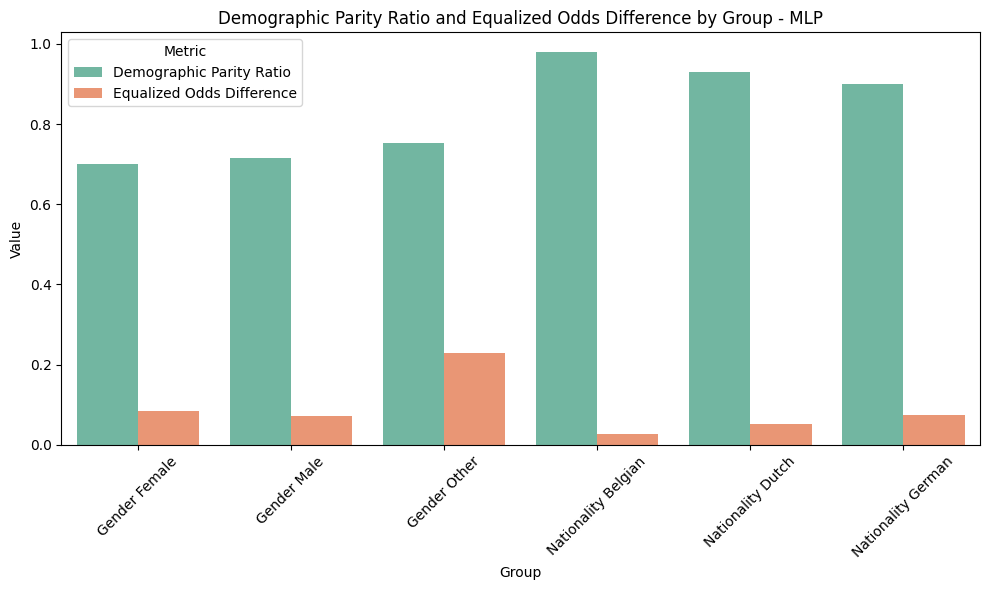

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# MLP modelinizin sonuçlarını ve duyarlı özellikler listesini tanımlayın
sensitive_features = ['Gender Female', 'Gender Male', 'Gender Other', 'Nationality Belgian', 'Nationality Dutch', 'Nationality German']

demographic_parity_ratios_mlp = [demographic_parity_female_test_mlp, demographic_parity_male_test_mlp, demographic_parity_other_test_mlp,
                             demographic_parity_belgian_test_mlp, demographic_parity_dutch_test_mlp, demographic_parity_german_test_mlp]
equalized_odds_differences_mlp = [equalized_odds_female_test_mlp, equalized_odds_male_test_mlp, equalized_odds_other_test_mlp,
                              equalized_odds_belgian_test_mlp, equalized_odds_dutch_test_mlp, equalized_odds_german_test_mlp]

# Veri çerçevesini oluşturun
df_mlp = pd.DataFrame({
    'Group': sensitive_features * 2,
    'Metric': ['Demographic Parity Ratio'] * len(sensitive_features) + ['Equalized Odds Difference'] * len(sensitive_features),
    'Value': demographic_parity_ratios_mlp + equalized_odds_differences_mlp
})

# Seaborn ile çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(data=df_mlp, x='Group', y='Value', hue='Metric', palette='Set2')
plt.xticks(rotation=45)
plt.title('Demographic Parity Ratio and Equalized Odds Difference by Group - MLP')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


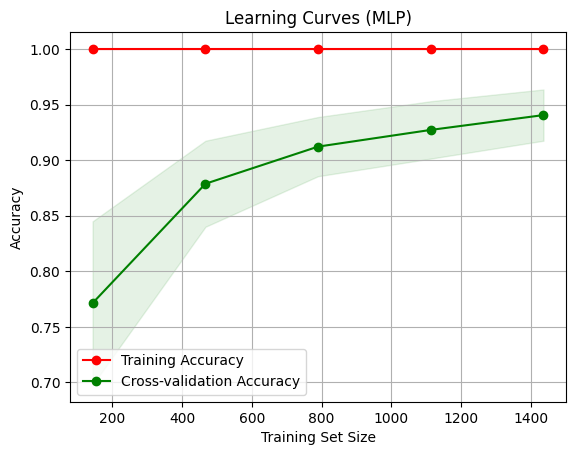

In [ ]:
# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curves (MLP)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_mean, "o-", color="r", label="Training Accuracy")
plt.plot(train_sizes, test_mean, "o-", color="g", label="Cross-validation Accuracy")

plt.legend(loc="best")
plt.show()